In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt

# Update matplotlib's rcParams to set a publication-quality style.
mpl.rcParams.update({
    # Figure dimensions (in inches) and resolution.
    'figure.figsize': (8, 6),       # Overall figure size; adjust based on your manuscript requirements.
    'figure.dpi': 300,              # High resolution (300 dpi) for printing and publication.
    
    # Font configuration
    'font.size': 20,                # Base font size for all text.
    'font.family': 'serif',         # Use serif fonts for a formal appearance.
    'font.serif': ['Times New Roman'],  # Commonly accepted academic font.
    'text.usetex': True,            # Use LaTeX for all text rendering (optional: set to False if LaTeX is not installed).

    # Axes properties.
    'axes.linewidth': 2,            # Thicker axis lines for a bold appearance.
    'axes.labelsize': 20,           # Larger axis labels.
    'axes.titlesize': 18,           # Larger and bolder title size.
    'axes.grid': True,              # Enable grid lines by default.
    
    # Tick settings for both axes.
    'xtick.labelsize': 14,          # Bigger x-tick labels.
    'ytick.labelsize': 14,          # Bigger y-tick labels.
    'xtick.major.width': 2,         # Thicker major tick lines along x-axis.
    'ytick.major.width': 2,         # Thicker major tick lines along y-axis.
    'xtick.direction': 'in',        # Ticks inside the plot area.
    'ytick.direction': 'in',
    
    # Line styles: for plotted lines.
    'lines.linewidth': 2,           # Thicker plot lines.
    
    # Legend styling.
    'legend.fontsize': 12,          # Set legend font size.
    'legend.frameon': False,        # No frame around the legend.

    # Grid styling.
    'grid.linestyle': '',         # Dashed grid lines.
    'grid.linewidth': 1,            # Moderately thick grid lines.
    'grid.alpha': 0.5,              # Semi-transparent grid lines.
    
    # Savefig options: ensures the saved figure tightly fits its contents.
    'savefig.bbox': 'tight',
})

# (Optional) Show the updated settings for verification.
print("Updated matplotlib settings for publication-quality plotting:")
for key in [
    'figure.figsize', 'figure.dpi',
    'font.size', 'font.family', 'font.serif', 'text.usetex',
    'axes.linewidth', 'axes.labelsize', 'axes.titlesize',
    'xtick.labelsize', 'ytick.labelsize', 'xtick.major.width', 'ytick.major.width',
    'lines.linewidth', 'legend.fontsize', 'grid.linestyle', 'grid.linewidth', 'grid.alpha'
]:
    print(f"{key}: {mpl.rcParams[key]}")


Updated matplotlib settings for publication-quality plotting:
figure.figsize: [8.0, 6.0]
figure.dpi: 300.0
font.size: 20.0
font.family: ['serif']
font.serif: ['Times New Roman']
text.usetex: True
axes.linewidth: 2.0
axes.labelsize: 20.0
axes.titlesize: 18.0
xtick.labelsize: 14.0
ytick.labelsize: 14.0
xtick.major.width: 2.0
ytick.major.width: 2.0
lines.linewidth: 2.0
legend.fontsize: 12.0
grid.linestyle: 
grid.linewidth: 1.0
grid.alpha: 0.5


In [17]:
#  No need now
#  Update matplotlib settings for publication-quality figures without LaTeX (to avoid errors)
mpl.rcParams.update({
    'text.usetex': False,         # Disable LaTeX to avoid needing a full installation
    'font.family': 'serif',
    'font.size': 30,
    'axes.linewidth': 2.5,
    'xtick.direction': 'in',
    'ytick.direction': 'in',
    'xtick.major.size': 12,
    'ytick.major.size': 12,
    'xtick.major.width': 2.5,
    'ytick.major.width': 2.5,
    'lines.linewidth': 2.5,
    'lines.markersize': 12,
    'legend.frameon': True,
    'legend.edgecolor': 'black',
    'legend.fontsize': 30,
})

plt.rcParams['xtick.labelsize'] = 24  # Change x-axis numbers to size 18
plt.rcParams['ytick.labelsize'] = 24  # Change y-axis numbers to size 18


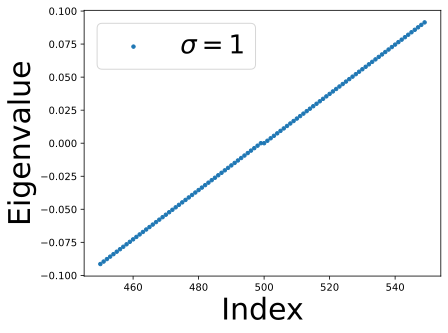

C:\Users\lenovo\AppData\Local\Temp\ipykernel_21844\787173603.py:130: ComplexWarning: Casting complex values to real discards the imaginary part
  v[i]  = v1[2*i,2*i]+v1[2*i+1,2*i+1]+v2[2*i,2*i]+v2[2*i+1,2*i+1]


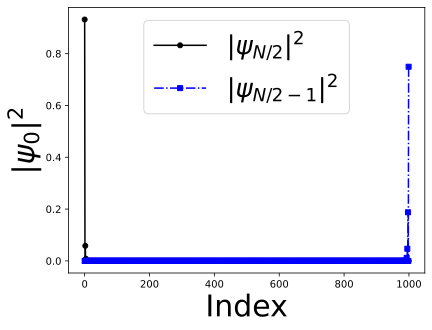

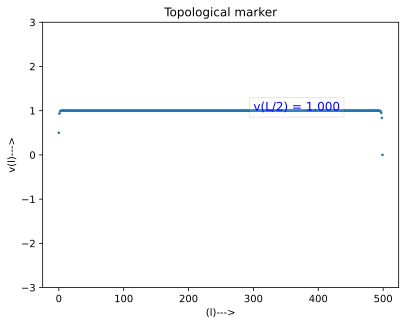

-250.0
0.7494984099608885
0.9318083916224484
topological marker in bulk(sigma=1)) 1.0000000000000013


In [ ]:
%config InlineBackend.figure_format = 'svg'

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import Patch


# Parameters
L = 1000
sigma =1         # wrapping of space-time
w = 1
v_val = 0.5         # hopping amplitude

# Construct SSH Hamiltonian (L x L complex matrix)
SHH = np.zeros((L, L), dtype=complex)
for i in range(L - 1):
    v_i = v_val * ((i + 1) / (L - 1)) ** sigma
    w_i = w * ((i + 1) / (L - 1)) ** sigma
    if i % 2 == 0:
        SHH[i + 1, i] = -v_i
        SHH[i, i + 1] = -v_i
    else:
        SHH[i + 1, i] = -w_i
        SHH[i, i + 1] = -w_i

# Diagonalize the Hamiltonian
eigenvalues, eigenvectors = np.linalg.eigh(SHH)
#plt.scatter(np.arange(len(eigenvalues)), eigenvalues, s=2)


#-----------------------------------------------------------------------------------

# # Filter the eigenvalues and corresponding x-range (indices) to plot only for x = 450 to 550
x_min=450
x_max=550
x_range = np.arange(x_min, x_max)  # x indices from 450 to 550
filtered_eigenvalues = eigenvalues[x_min:x_max]

# # # Plot the filtered data
plt.scatter(x_range, filtered_eigenvalues, s=12, label=f'$\\sigma = {sigma}$')  

plt.xlabel('Index', fontsize= 30)
plt.ylabel('Eigenvalue',fontsize= 30)
plt.legend(fontsize= 26)
#plt.title(f'Topologically nontrivial SSH: v={v_val}, w={w}, ',fontsize= 18)
plt.show()

#--------------------------------------------------------------------------------------------------


# ------------------------------
# Plot probability density for zero energy states:
# Use eigenvectors corresponding to indices L//2 and L//2 - 1.
prob_density  = np.abs(eigenvectors[:, L // 2]) ** 2
prob_density2 = np.abs(eigenvectors[:, L // 2 - 1]) ** 2

plt.figure()
#plt.title("Probability density for zero energy states", fontsize=18)
# plt.plot(np.arange(len(eigenvalues)), prob_density, label=r'$|\psi_{N/2}|^2$')
# plt.plot(np.arange(len(eigenvalues)), prob_density2, label=r'$|\psi_{N/2-1}|^2$')

plt.plot(np.arange(len(eigenvalues)), prob_density2, 
         linestyle='-', marker='o', markersize=5, color='black', 
         label=r'$|\psi_{{N/2}}|^2$')
plt.plot(np.arange(len(eigenvalues)), prob_density, 
         linestyle='-.', marker='s', markersize=5, color='blue', 
         label=r'$|\psi_{{N/2-1}}|^2 $')
plt.xlabel('Index', fontsize= 30)
plt.ylabel(r'$|\psi_{0}|^2 $',fontsize= 30)
#plt.xlim(0,10)
plt.legend(loc='upper center',fontsize=26)


# ------------------------------


#------------------------------------------------------------------------------------------------------------




# Number of eigenvectors
num_eigenvectors = len(eigenvalues)

# Number of eigenvectors to include in each matrix (half in each case)
num_eigenvectors_half = num_eigenvectors // 2

# matrix from the first half of the eigenvectors
Um= np.column_stack(eigenvectors[:, :num_eigenvectors_half])

# matrix from the remaining half of the eigenvectors
Up= np.column_stack(eigenvectors[:, num_eigenvectors_half:])

trans_Um = np.transpose(Um)
trans_Up= np.transpose(Up)

Pp= trans_Up@Up
Pm=trans_Um@Um
Q=Pp-Pm
GA=np.zeros((L,L))
GB=np.zeros((L,L))
for i in range(len(eigenvalues)):
    if i % 2 == 0:
      GA[i,i]=1
for i in range(len(eigenvalues)):
    if i % 2 != 0:
      GB[i,i]=1

Qab= GA@Q@GB
Qba= GB@Q@GA
l=np.arange(-abs(L/4), abs(L/4) , 1 )
X= np.zeros((L,L))
X[0,0]=-L/4
for i in range(len(eigenvalues)):
        if i % 2 == 0:
         X[i,i]=-L/4+i/2
         X[i+1,i+1]=X[i,i]
#print(np.shape(GA))
#print(X)

v1=1/2*(Qba@(X@Qab-Qab@X))
v2=1/2*(Qab@(Qba@X-X@Qba))
#print(v1)
#--------------------------------------------
v=np.zeros(int(L/2))
#--------------------------------------- 
for i in range(int(L/2)-1):
    v[i]  = v1[2*i,2*i]+v1[2*i+1,2*i+1]+v2[2*i,2*i]+v2[2*i+1,2*i+1]
#print(v)
plt.figure()
plt.title("Topological marker")
plt.xlabel("(l)--->")
plt.ylabel("v(l)--->")
plt.scatter(np.arange(len(v)),v,s=3)

# Limit the y-axis from -3 to 3
plt.ylim(-3, 3)

# Determine the middle value (v at L/2)
v_middle = v[len(v)//2]  # This is equivalent to v[250] when L = 1000

# Annotate the graph with the v(L/2) value.
# Adjust the x and y coordinates in plt.text as needed.
plt.text(0.6 * len(v), v_middle, f"v(L/2) = {v_middle:.3f}", 
         fontsize=12, color='blue', 
         bbox=dict(facecolor='white', alpha=0.1))

plt.show()
print(X[0,0])
print(max(prob_density))
print(max(prob_density2))
print(f"topological marker in bulk(sigma={sigma}))",v[250])


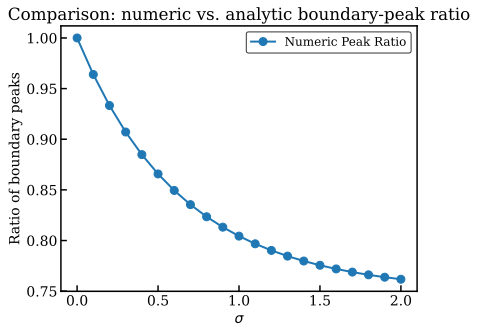

In [155]:
#PEAK RATIO OF ZERO ENERGY STATES

import numpy as np
import matplotlib.pyplot as plt

def build_ssh_hamiltonian(L, sigma, v_val, w_val):
    """
    Constructs the LxL SSH Hamiltonian with site-dependent hopping:
    even bonds -> -v_i
    odd bonds  -> -w_i
    where v_i, w_i ~ ( (i+1)/(L-1) )^sigma
    """
    H = np.zeros((L, L), dtype=complex)
    for i in range(L - 1):
        # Define site-dependent hoppings
        v_i = v_val * ((i + 1) / (L - 1))**sigma
        w_i = w_val * ((i + 1) / (L - 1))**sigma
        if i % 2 == 0:
            # Even bond
            H[i, i+1] = -v_i
            H[i+1, i] = -v_i
        else:
            # Odd bond
            H[i, i+1] = -w_i
            H[i+1, i] = -w_i
    return H

def zero_energy_peak_ratio(L, sigma, v_val, w_val):
    """
    Builds the Hamiltonian for given (L, sigma, v_val, w_val),
    diagonalizes it, and returns the ratio of the two zero-energy
    states' maximum probability densities. The larger peak is
    always placed in the denominator so that 0 <= ratio <= 1.
    """
    # Build Hamiltonian
    H = build_ssh_hamiltonian(L, sigma, v_val, w_val)
    
    # Diagonalize
    eigenvals, eigenvecs = np.linalg.eigh(H)
    
    # The two zero-energy states should be in the middle of the sorted spectrum.
    # Typically they appear at indices L//2 and L//2 - 1 if the spectrum is symmetric about 0.
    # You may wish to verify by checking which eigenvalues are actually closest to zero.
    idx1 = L // 2
    idx2 = L // 2 - 1
    
    # Probability densities of each zero-energy state
    psi1 = np.abs(eigenvecs[:, idx1])**2
    psi2 = np.abs(eigenvecs[:, idx2])**2
    
    # Peak (maximum) probability density for each
    peak1 = np.max(psi1)
    peak2 = np.max(psi2)
    
    # Ratio with the bigger peak in the denominator
    if peak1 >= peak2:
        ratio = peak2 / peak1
    else:
        ratio = peak1 / peak2
    
    return ratio

def analytic_ratio_amplitudes(L, sigma, t1, t2, compare_sublattice='B'):
    """
    Computes an analytic amplitude ratio from the recurrence relations.
    
    If compare_sublattice='B', for instance, this returns
       ratio_B = |psi_{B,1} / psi_{B,N}|
    from the formula:
       psi_{B,1} = (-t1/t2)^(N-1) * prod_{m=2..N} [ (2m - 1) / (2(m-1)) ]^sigma * psi_{B,N}.
    So ratio_B = (t1/t2)^(N-1) * product( ... )^sigma.
    
    If you need *probability* ratios instead of amplitude ratios,
    you can square this result to compare with the squared wavefunction peaks.
    """
    # We take L = N in your notation
    # The factor (-t1/t2)^(N-1) in magnitude is just (|t1|/|t2|)^(N-1).
    N = L
    base = (abs(t1) / abs(t2))**(N - 1)
    
    # The product from m=2..N for sublattice B:
    #   prod_{m=2..N} [ (2m - 1) / 2(m-1) ]^sigma
    # For sublattice A, it might differ by indexing, but below is the B version:
    prod_factor = 1.0
    for m in range(2, N + 1):
        # factor = (2m - 1) / (2*(m-1))
        prod_factor *= ((2*m - 1) / (2.0*(m-1)))**sigma
    
    ratio_B = base * prod_factor
    
    # If you want the sublattice A version, use:
    #   ratio_A = (|t1|/|t2|)^(N-1) * prod_{m=1..(N-1)} [ (2m-1)/(2m) ]^sigma
    # The code below is an example. You could pick based on `compare_sublattice`.
    if compare_sublattice.upper() == 'A':
        prod_a = 1.0
        for m in range(1, N):
            prod_a *= ((2*m - 1) / (2.0*m))**sigma
        ratio_A = (abs(t1) / abs(t2))**(N - 1) * prod_a
        return ratio_A
    
    return ratio_B


# -------------------------
# Main script
# -------------------------
L = 1000
v_val = 0.5   # t1
w_val = 1.0   # t2

sigma_values = np.arange(0, 2.1, 0.1)  # from 0 to 2 in steps of 0.1

numeric_ratios = []
analytic_ratios = []

for sig in sigma_values:
    # Numerical ratio
    ratio_num = zero_energy_peak_ratio(L, sig, v_val, w_val)
    numeric_ratios.append(ratio_num)
    
    # Analytic ratio of amplitudes (e.g. sublattice B version).
    # If you actually want the amplitude ratio for sublattice A's boundary wavefunction,
    # set compare_sublattice='A' in the call below.
    ratio_ana = analytic_ratio_amplitudes(L, sig, t1=v_val, t2=w_val, compare_sublattice='B')
    
    # Optionally compare probability densities by squaring:
    # ratio_ana = ratio_ana**2
    
    # If you also want to ensure ratio < 1 by placing the larger amplitude in the denominator:
    if ratio_ana > 1.0:
        ratio_ana = 1.0 / ratio_ana
    
    analytic_ratios.append(ratio_ana)

# -------------------------
# Plot results
# -------------------------
plt.figure()
plt.plot(sigma_values, numeric_ratios, 'o-', label='Numeric Peak Ratio')
#plt.plot(sigma_values, analytic_ratios, 's-', label='Analytic Ratio')
plt.xlabel(r'$\sigma$', fontsize=14)
plt.ylabel('Ratio of boundary peaks', fontsize=14)
plt.legend(fontsize=12)
plt.title('Comparison: numeric vs. analytic boundary-peak ratio')
plt.show()


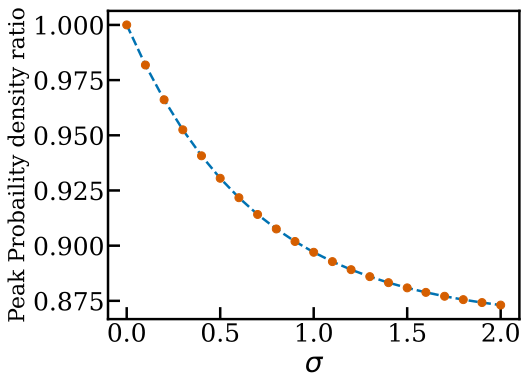

In [23]:
import numpy as np
import matplotlib.pyplot as plt

def ssh_hamiltonian_position_dependent(N, t1_0, t2_0, sigma):
    """
    Constructs the (2N x 2N) Hamiltonian for the SSH model with position-dependent hoppings.
    The basis ordering is: [a1, b1, a2, b2, ..., aN, bN].
    
    t1(n) = t1_0 * ((2n - 1)/(N - 1))^sigma      (intra-cell, connects a_n <-> b_n)
    t2(n) = t2_0 * ((2n)/(N - 1))^sigma          (inter-cell, connects b_n <-> a_{n+1})
    """
    L = 2 * N
    H = np.zeros((L, L), dtype=float)  # real matrix, though can also be float

    # Intra-cell hoppings (a_n <-> b_n):
    for n in range(1, N + 1):
        t1 = t1_0 * (((2*n - 1)/(N - 1))**sigma)
        i_a = 2*(n - 1)     # index of a_n in 0-based
        i_b = 2*(n - 1) + 1 # index of b_n in 0-based
        H[i_a, i_b] = t1
        H[i_b, i_a] = t1

    # Inter-cell hoppings (b_n <-> a_{n+1}):
    for n in range(1, N):
        t2 = t2_0 * (((2*n)/(N - 1))**sigma)
        i_b = 2*(n - 1) + 1
        i_a_next = 2*n
        H[i_b, i_a_next] = t2
        H[i_a_next, i_b] = t2

    return H

def analytic_left_edge_state(N, t1_0, t2_0, sigma):
    """
    Computes the analytical amplitude on the A sublattice for the left-edge zero mode.
    Recurrence: 
       psi_A(1) = 1 (unnormalized), 
       psi_A(n) = psi_A(n-1)*[-(t1_0/t2_0)*((2n-1)/(2n))^sigma].
    Returns a length-N array with normalized amplitudes on sublattice A.
    """
    psi = np.zeros(N, dtype=float)
    psi[0] = 1.0  # start with amplitude 1 at the leftmost site
    for n in range(1, N):
        factor = - (t1_0 / t2_0) * (((2*n - 1)/(2*n))**sigma)
        psi[n] = psi[n-1] * factor

    # Normalize
    norm = np.sqrt(np.sum(np.abs(psi)**2))
    psi /= norm
    return psi

def analytic_right_edge_state(N, t1_0, t2_0, sigma):
    """
    Computes the analytical amplitude on the B sublattice for the right-edge zero mode.
    Recurrence:
       psi_B(N) = 1 (unnormalized),
       psi_B(n) = psi_B(n+1)*[-(t1_0/t2_0)*(((2(n+1)+1)/(2(n+1)))^sigma)] for n=N-1,...,1.
    Returns a length-N array with normalized amplitudes on sublattice B.
    """
    psi = np.zeros(N, dtype=float)
    psi[-1] = 1.0  # amplitude 1 at the rightmost site
    for n in range(N - 2, -1, -1):  # from N-2 down to 0
        factor = - (t1_0 / t2_0) * ( ((2*(n+1) + 1)/(2*(n+1)))**sigma )
        psi[n] = psi[n + 1] * factor

    # Normalize
    norm = np.sqrt(np.sum(np.abs(psi)**2))
    psi /= norm
    return psi

def numerical_edge_states(N, t1_0, t2_0, sigma, tol=1e-4):
    """
    Diagonalizes the full Hamiltonian and identifies the two eigenstates
    with eigenvalues closest to zero. Then, by comparing the weight on the
    A vs. B sublattice, it assigns one state as the left-edge mode (A) and
    the other as the right-edge mode (B).

    Returns:
      psi_left: amplitude on the A sublattice (length N) of the left-edge state
      psi_right: amplitude on the B sublattice (length N) of the right-edge state
      (E_left, E_right): the corresponding eigenvalues
    """
    H = ssh_hamiltonian_position_dependent(N, t1_0, t2_0, sigma)
    eigvals, eigvecs = np.linalg.eigh(H)

    # Identify states whose |E| < tol (i.e. near zero)
    idxs = np.where(np.abs(eigvals) < tol)[0]
    if idxs.size < 2:
        # Not enough zero modes found
        print(f"Warning: fewer than 2 zero modes found for sigma={sigma} (found {idxs.size}).")
        return None, None, None

    # For each zero mode found, compute weight on A vs. B
    modes = []
    for idx in idxs:
        psi_full = eigvecs[:, idx]
        # Sub-lattice A = even indices, B = odd indices
        psi_A = psi_full[0::2]
        psi_B = psi_full[1::2]
        weight_A = np.sum(np.abs(psi_A)**2)
        weight_B = np.sum(np.abs(psi_B)**2)
        modes.append((idx, weight_A, weight_B, psi_A, psi_B))

    # The left-edge mode is the one predominantly on A; right-edge predominantly on B
    left_mode = max(modes, key=lambda x: x[1])   # largest weight_A
    right_mode = max(modes, key=lambda x: x[2])  # largest weight_B

    # Normalize the sublattice pieces
    psi_left = left_mode[3] / np.sqrt(np.sum(np.abs(left_mode[3])**2))
    psi_right = right_mode[4] / np.sqrt(np.sum(np.abs(right_mode[4])**2))

    E_left = eigvals[left_mode[0]]
    E_right = eigvals[right_mode[0]]

    return psi_left, psi_right, (E_left, E_right)

if __name__ == "__main__":
    # Model parameters
    N = 1000          # number of unit cells
    t1_0 = 0.5       # base intra-cell hopping
    t2_0 = 1       # base inter-cell hopping
    # We'll examine sigma from 0 to 2 in steps of 0.1
    sigma_list = np.arange(0.0, 2.1, 0.1)

    # Store results here
    analytic_ratios = []
    numeric_ratios = []

    for sigma in sigma_list:
        # ---------------------------------------------------------
        # 1) Analytical left- and right-edge states
        # ---------------------------------------------------------
        psi_left_ana = analytic_left_edge_state(N, t1_0, t2_0, sigma)
        psi_right_ana = analytic_right_edge_state(N, t1_0, t2_0, sigma)

        # Get peak amplitudes on each edge
        peak_left_ana = np.max(np.abs(psi_left_ana))
        peak_right_ana = np.max(np.abs(psi_right_ana))

        # Ratio = smaller / larger so that ratio is <= 1
        bigger_ana = max(peak_left_ana, peak_right_ana)
        smaller_ana = min(peak_left_ana, peak_right_ana)
        ratio_ana = smaller_ana / bigger_ana
        analytic_ratios.append(ratio_ana)

        # ---------------------------------------------------------
        # 2) Numerical edge states
        # ---------------------------------------------------------
        psi_left_num, psi_right_num, energies = numerical_edge_states(N, t1_0, t2_0, sigma)
        if energies is None:
            # If no zero modes found, store NaN
            numeric_ratios.append(np.nan)
            continue
        
        peak_left_num = np.max(np.abs(psi_left_num))
        peak_right_num = np.max(np.abs(psi_right_num))

        bigger_num = max(peak_left_num, peak_right_num)
        smaller_num = min(peak_left_num, peak_right_num)
        ratio_num = smaller_num / bigger_num
        numeric_ratios.append(ratio_num)

    # ---------------------------------------------------------
    # 3) Plot ratio vs. sigma
    # ---------------------------------------------------------
    plt.figure(figsize=(8,6))
    plt.plot(sigma_list, analytic_ratios, "--", color="#0072B2", linewidth=2.5)
         #label="Analytical Peak Ratio")
    plt.plot(sigma_list, numeric_ratios, "o", color="#D55E00", markersize=8)
         #label="Numerical Peak Ratio")

    plt.xlabel(r"$\sigma$", fontsize=28)
    plt.ylabel("Peak Probaility density ratio", fontsize=22)
    #plt.title("Comparison of Edge-State Peak Ratio vs. $\sigma$", fontsize=15)
    #plt.legend(fontsize=22)
    #plt.grid(True)
    plt.tight_layout()
    plt.show()


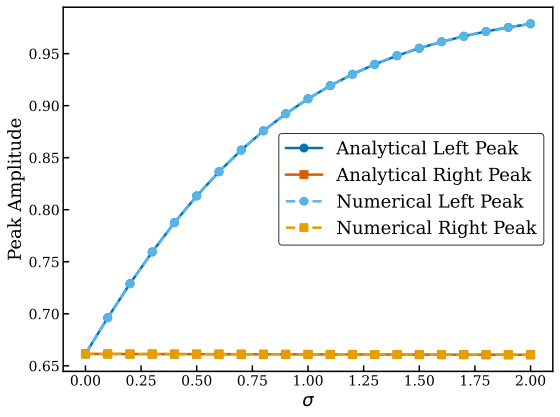

In [172]:
import numpy as np
import matplotlib.pyplot as plt

def ssh_hamiltonian_position_dependent(N, t1_0, t2_0, sigma):
    """
    Constructs the (2N x 2N) SSH Hamiltonian with position-dependent hoppings.
    Basis: [a1, b1, a2, b2, ..., aN, bN].

    Intra-cell hopping:
      t1(n) = t1_0 * ((2n - 1)/(N - 1))^sigma   for n = 1,...,N (a_n <-> b_n)
    Inter-cell hopping:
      t2(n) = t2_0 * ((2n)/(N - 1))^sigma       for n = 1,...,N-1 (b_n <-> a_{n+1})
    """
    L = 2 * N
    H = np.zeros((L, L), dtype=float)
    
    # Intra-cell hoppings (a_n <-> b_n)
    for n in range(1, N + 1):
        t1 = t1_0 * (((2*n - 1)/(N - 1))**sigma)
        i_a = 2*(n - 1)
        i_b = 2*(n - 1) + 1
        H[i_a, i_b] = t1
        H[i_b, i_a] = t1
    
    # Inter-cell hoppings (b_n <-> a_{n+1})
    for n in range(1, N):
        t2 = t2_0 * (((2*n)/(N - 1))**sigma)
        i_b = 2*(n - 1) + 1
        i_a_next = 2*n
        H[i_b, i_a_next] = t2
        H[i_a_next, i_b] = t2
    
    return H

def analytic_left_edge_state(N, t1_0, t2_0, sigma):
    """
    Computes the analytical left-edge state (on sublattice A) via the recurrence:
      ψ_A(1) = 1 (unnormalized)
      ψ_A(n) = ψ_A(n-1) * [ - (t1_0/t2_0) * ((2n-1)/(2n))^sigma ],  n>=2.
    Returns a normalized array of length N (one amplitude per cell on sublattice A).
    """
    psi = np.zeros(N, dtype=float)
    psi[0] = 1.0
    for n in range(1, N):
        factor = - (t1_0 / t2_0) * (((2*n - 1)/(2*n))**sigma)
        psi[n] = psi[n-1] * factor
    norm = np.sqrt(np.sum(np.abs(psi)**2))
    psi /= norm
    return psi

def analytic_right_edge_state(N, t1_0, t2_0, sigma):
    """
    Computes the analytical right-edge state (on sublattice B) via the recurrence:
      ψ_B(N) = 1 (unnormalized)
      ψ_B(n) = ψ_B(n+1) * [ - (t1_0/t2_0) * (((2(n+1)+1)/(2(n+1)))^sigma ],  n = N-1,...,1.
    Returns a normalized array of length N (one amplitude per cell on sublattice B).
    """
    psi = np.zeros(N, dtype=float)
    psi[-1] = 1.0
    for n in range(N - 2, -1, -1):
        factor = - (t1_0 / t2_0) * ( ((2*(n+1) + 1)/(2*(n+1)))**sigma )
        psi[n] = psi[n+1] * factor
    norm = np.sqrt(np.sum(np.abs(psi)**2))
    psi /= norm
    return psi

def numerical_edge_states(N, t1_0, t2_0, sigma, tol=1e-4):
    """
    Diagonalizes the full SSH Hamiltonian and identifies the two eigenstates with energies
    closest to zero. It then splits each eigenvector into sublattices (even indices for A, odd for B)
    and assigns:
      - the state with larger weight on A as the left-edge state,
      - the state with larger weight on B as the right-edge state.
    Returns:
      psi_left: normalized amplitude (length N) on sublattice A.
      psi_right: normalized amplitude (length N) on sublattice B.
      (E_left, E_right): corresponding eigenvalues.
    """
    H = ssh_hamiltonian_position_dependent(N, t1_0, t2_0, sigma)
    eigvals, eigvecs = np.linalg.eigh(H)
    
    idxs = np.where(np.abs(eigvals) < tol)[0]
    if idxs.size < 2:
        print(f"Warning: fewer than 2 zero modes found for sigma={sigma} (found {idxs.size}).")
        return None, None, None
    
    modes = []
    for idx in idxs:
        psi_full = eigvecs[:, idx]
        psi_A = psi_full[0::2]  # even indices for A sublattice
        psi_B = psi_full[1::2]  # odd indices for B sublattice
        weight_A = np.sum(np.abs(psi_A)**2)
        weight_B = np.sum(np.abs(psi_B)**2)
        modes.append((idx, weight_A, weight_B, psi_A, psi_B))
    
    left_mode = max(modes, key=lambda x: x[1])   # largest A weight
    right_mode = max(modes, key=lambda x: x[2])  # largest B weight
    
    psi_left = left_mode[3] / np.sqrt(np.sum(np.abs(left_mode[3])**2))
    psi_right = right_mode[4] / np.sqrt(np.sum(np.abs(right_mode[4])**2))
    E_left = eigvals[left_mode[0]]
    E_right = eigvals[right_mode[0]]
    
    return psi_left, psi_right, (E_left, E_right)

# Main script: compute and plot the peak amplitudes for left and right edge states vs. sigma.
if __name__ == "__main__":
    # Model parameters
    N = 1000          # number of unit cells
    t1_0 = 0.75       # base intra-cell hopping
    t2_0 = 1       # base inter-cell hopping
    sigma_list = np.arange(0.0, 2.1, 0.1)  # sigma values from 0 to 2
    
    # Lists to store peak amplitudes
    analytic_left_peaks = []
    analytic_right_peaks = []
    numeric_left_peaks  = []
    numeric_right_peaks = []
    
    for sigma in sigma_list:
        # Analytical states on each edge:
        psi_left_ana  = analytic_left_edge_state(N, t1_0, t2_0, sigma)
        psi_right_ana = analytic_right_edge_state(N, t1_0, t2_0, sigma)
        
        peak_left_ana  = np.max(np.abs(psi_left_ana))
        peak_right_ana = np.max(np.abs(psi_right_ana))
        analytic_left_peaks.append(peak_left_ana)
        analytic_right_peaks.append(peak_right_ana)
        
        # Numerical edge states:
        psi_left_num, psi_right_num, energies = numerical_edge_states(N, t1_0, t2_0, sigma)
        if psi_left_num is None or psi_right_num is None:
            numeric_left_peaks.append(np.nan)
            numeric_right_peaks.append(np.nan)
        else:
            peak_left_num  = np.max(np.abs(psi_left_num))
            peak_right_num = np.max(np.abs(psi_right_num))
            numeric_left_peaks.append(peak_left_num)
            numeric_right_peaks.append(peak_right_num)
    
    # Plotting the peak amplitudes vs. sigma.
    plt.figure(figsize=(8,6))
    
    # Use Physical Review B friendly colors:
    # Analytic: deep blue for left, vermillion for right.
    # Numerical: lighter blue for left, lighter vermillion/orange for right.
    plt.plot(sigma_list, analytic_left_peaks, "o-", color="#0072B2", linewidth=2.5, markersize=8,
             label="Analytical Left Peak")
    plt.plot(sigma_list, analytic_right_peaks, "s-", color="#D55E00", linewidth=2.5, markersize=8,
             label="Analytical Right Peak")
    
    # Numerical data: using dashed lines for distinction.
    plt.plot(sigma_list, numeric_left_peaks, "o--", color="#56B4E9", linewidth=2.5, markersize=8,
             label="Numerical Left Peak")
    plt.plot(sigma_list, numeric_right_peaks, "s--", color="#E69F00", linewidth=2.5, markersize=8,
             label="Numerical Right Peak")
    
    plt.xlabel(r"$\sigma$", fontsize=18)
    plt.ylabel("Peak Amplitude", fontsize=18)
    #plt.title("Left and Right Edge Peak Amplitudes vs. $\sigma$", fontsize=15)
    plt.legend(fontsize=18)
    #plt.grid(True)
    plt.tight_layout()
    plt.show()


C:\Users\lenovo\AppData\Local\Temp\ipykernel_47120\592146571.py:111: ComplexWarning: Casting complex values to real discards the imaginary part
  v[i]  = v1[2*i,2*i]+v1[2*i+1,2*i+1]+v2[2*i,2*i]+v2[2*i+1,2*i+1]


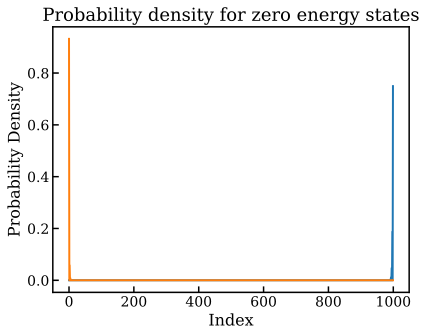

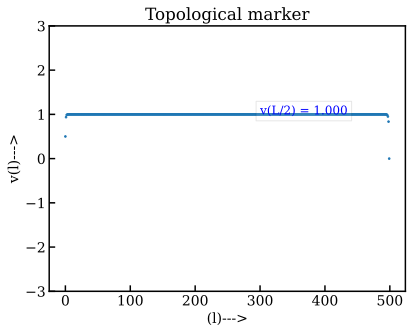

-250.0
0.7494984099608885
0.9318083916224484
topological marker in bulk(sigma=1)) 1.0000000000000013


In [40]:
import numpy as np
import math
import matplotlib.pyplot as plt
L= 1000
# t=1.5 #hopping amplitude
# dt=-0.5
sigma=1 #wrapping of space-time
w=1
v=0.5
SHH = np.zeros((L,L),dtype=complex )

for i in range (L-1):
            v_i = v * ((i + 1) /(L-1))**sigma
            w_i = w * ((i +1) /(L-1))**sigma
            if i % 2 == 0:
              SHH[i+1,i]=v_i
              SHH[i,i+1]=v_i
            if i % 2 != 0:
             SHH[i+1,i]=w_i
             SHH[i,i+1]=-w_i
# SHH[L-1,0]=w
# SHH[0,L-1]=w
#print(SHH)

eigenvalues, eigenvectors = np.linalg.eigh(SHH)
#plt.scatter(np.arange(len(eigenvalues)), eigenvalues,s=2)  
#print(eigenvalues[397],eigenvalues[398],eigenvalues[399],eigenvalues[400],eigenvalues[401],eigenvalues[402], eigenvalues[403])
#print(eigenvalues[501]-eigenvalues[498])

#-----------------------------------------------------------------------------------

# # Filter the eigenvalues and corresponding x-range (indices) to plot only for x = 450 to 550
# x_range = np.arange(490, 510)  # x indices from 450 to 550
# filtered_eigenvalues = eigenvalues[490:510]

# # # Plot the filtered data
# plt.scatter(x_range, filtered_eigenvalues, s=6)
# # plt.xlabel('Index', fontsize= 16)
# plt.ylabel('Eigenvalue',fontsize= 16)
# #plt.title(f'Topologically nontrivial SSH: v={v}, w={w}, ',fontsize= 18)
# plt.show()

#--------------------------------------------------------------------------------------------------

#probability_density = np.abs(eigenvectors[:, 150])**2 
probability_density = np.abs(eigenvectors[:, L//2])**2 #------------------------------------------------------
probability_density2 = np.abs(eigenvectors[:, L//2-1])**2
plt.figure() 
plt.title(f"Probability density for zero energy states", fontsize=18)
plt.plot(np.arange(len(eigenvalues)), probability_density)
plt.plot(np.arange(len(eigenvalues)), probability_density2)
plt.xlabel('Index', fontsize=16)
plt.ylabel('Probability Density', fontsize=16)
#plt.yscale('log')





#------------------------------------------------------------------------------------------------------------




# Number of eigenvectors
num_eigenvectors = len(eigenvalues)

# Number of eigenvectors to include in each matrix (half in each case)
num_eigenvectors_half = num_eigenvectors // 2

# matrix from the first half of the eigenvectors
Um= np.column_stack(eigenvectors[:, :num_eigenvectors_half])

# matrix from the remaining half of the eigenvectors
Up= np.column_stack(eigenvectors[:, num_eigenvectors_half:])

trans_Um = np.transpose(Um)
trans_Up= np.transpose(Up)

Pp= trans_Up@Up
Pm=trans_Um@Um
Q=Pp-Pm
GA=np.zeros((L,L))
GB=np.zeros((L,L))
for i in range(len(eigenvalues)):
    if i % 2 == 0:
      GA[i,i]=1
for i in range(len(eigenvalues)):
    if i % 2 != 0:
      GB[i,i]=1

Qab= GA@Q@GB
Qba= GB@Q@GA
l=np.arange(-abs(L/4), abs(L/4) , 1 )
X= np.zeros((L,L))
X[0,0]=-L/4
for i in range(len(eigenvalues)):
        if i % 2 == 0:
         X[i,i]=-L/4+i/2
         X[i+1,i+1]=X[i,i]
#print(np.shape(GA))
#print(X)

v1=1/2*(Qba@(X@Qab-Qab@X))
v2=1/2*(Qab@(Qba@X-X@Qba))
#print(v1)
#--------------------------------------------
v=np.zeros(int(L/2))
#--------------------------------------- 
for i in range(int(L/2)-1):
    v[i]  = v1[2*i,2*i]+v1[2*i+1,2*i+1]+v2[2*i,2*i]+v2[2*i+1,2*i+1]
#print(v)
plt.figure()
plt.title("Topological marker")
plt.xlabel("(l)--->")
plt.ylabel("v(l)--->")
plt.scatter(np.arange(len(v)),v,s=3)

# Limit the y-axis from -3 to 3
plt.ylim(-3, 3)

# Determine the middle value (v at L/2)
v_middle = v[len(v)//2]  # This is equivalent to v[250] when L = 1000

# Annotate the graph with the v(L/2) value.
# Adjust the x and y coordinates in plt.text as needed.
plt.text(0.6 * len(v), v_middle, f"v(L/2) = {v_middle:.3f}", 
         fontsize=12, color='blue', 
         bbox=dict(facecolor='white', alpha=0.1))

plt.show()
print(X[0,0])
print(max(probability_density))
print(max(probability_density2))
print(f"topological marker in bulk(sigma={sigma}))",v[250])

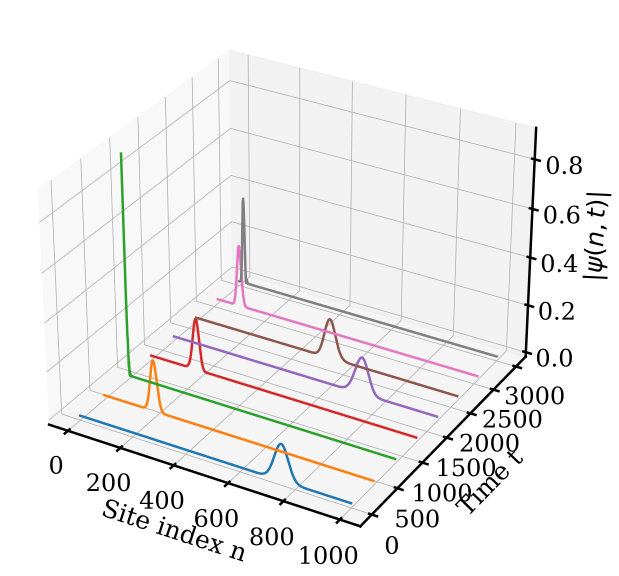

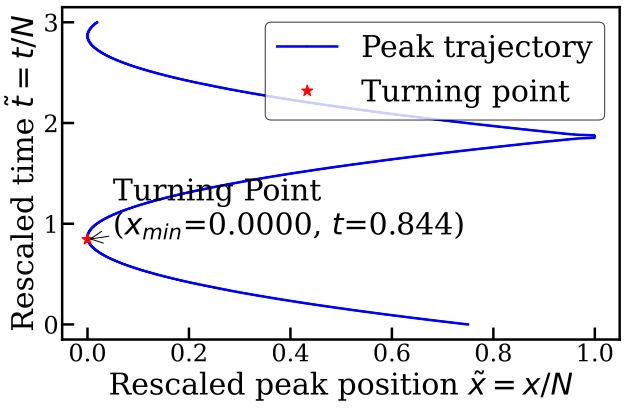

In [55]:
#SSH Time evolution


import numpy as np 
import matplotlib.pyplot as plt
from scipy.linalg import expm
from mpl_toolkits.mplot3d import Axes3D  # 3D plotting toolkit

def build_ssh_hamiltonian(N, v, w, sigma):
    """
    Build the SSH Hamiltonian on a 1D lattice of N sites.
    """
    H = np.zeros((N, N), dtype=complex)
    for i in range(N-1):
        # Scale the hopping amplitudes with position
        v_i = v * ((i + 1) / (N-1))**sigma
        w_i = w * ((i + 1) / (N-1))**sigma
        if i % 2 == 0:
            H[i, i+1] = -v_i
            H[i+1, i] = -v_i
        else:
            H[i, i+1] = -w_i
            H[i+1, i] = -w_i
    return H

###########################################
# New SSH Hamiltonian with additional hoppings and updated parameters
def SSH(L,c,sigma):
    """
    Construct the SSH Hamiltonian with additional hoppings for a given 
    winding number parameter c and exponent sigma, using updated parameters.
    """
    if c == 2:
        t = 0.1
        dt = -0.1
        w_val = t - dt    # Note: w = t - dt
        v_val = t + dt    # v = t + dt
        nu = 0.5
        mu = 0.2
        gamma = 0.4
    elif c == 4:
        t = 0.20
        dt = 0.05
        w_val = t - dt
        v_val = t + dt
        nu = 0.50
        mu = 0.20
        gamma = 0.40
    elif c == 3:
        t = 0.3
        dt = -0.2
        w_val = t - dt
        v_val = t + dt
        nu = 0.35
        mu = 0.6
        gamma = 0
    elif c == 1:
        t = 0.75
        dt = -0.25
        w_val = t - dt
        v_val = t + dt
        nu = 0
        mu = 0
        gamma = 0
    elif c == 0:
        t = 0.75
        dt = 0.25
        w_val = t - dt
        v_val = t + dt
        nu = 0
        mu = 0
        gamma = 0

    # Build the Hamiltonian matrix SHH (LxL complex matrix)
    SHH = np.zeros((L, L), dtype=complex)
    
    # Nearest-neighbor hopping
    for i in range(L - 1):
        v_i = v_val * ((i + 1) / (L - 1))**sigma
        w_i = w_val * ((i + 1) / (L - 1))**sigma
        if i % 2 == 0:
            SHH[i + 1, i] = -v_i
            SHH[i, i + 1] = -v_i
        else:
            SHH[i + 1, i] = -w_i
            SHH[i, i + 1] = -w_i

    # Next-nearest and further neighbor hoppings:
    for i in range(L - 3):
        nu_i = nu * ((i + 1) / (L - 1))**sigma
        if i % 2 != 0:
            SHH[i + 3, i] = nu_i
            SHH[i, i + 3] = nu_i

    for i in range(L - 5):
        mu_i = mu * ((i + 1) / (L - 1))**sigma
        if i % 2 != 0:
            SHH[i + 5, i] = mu_i
            SHH[i, i + 5] = mu_i

    for i in range(L - 7):
        gamma_i = gamma * ((i + 1) / (L - 1))**sigma
        if i % 2 != 0:
            SHH[i + 7, i] = gamma_i
            SHH[i, i + 7] = gamma_i

    return SHH

#############################################


def tb_model(N, sigma):
    """
    Build a tight-binding model Hamiltonian for comparison.
    """
    J = 1
    H_tb = np.zeros((N, N), dtype=complex)
    for i in range(N - 1):
        J_i = J * ((i + 1) / (N - 1))**sigma
        H_tb[i, i + 1] = -J_i
        H_tb[i + 1, i] = -J_i
    return H_tb

def kitaev_chain(N, mu, t, delta, sigma):
    # Construct the N x N matrices A (kinetic part) and B (pairing part)
    A = np.zeros((N, N), dtype=complex)
    B = np.zeros((N, N), dtype=complex)

    for i in range(N):
        A[i, i] = -mu  # on-site energy
        if i < N - 1:
            t_i = -t * ((i + 1) / (N - 1))**sigma
            A[i, i+1] = -t_i
            A[i+1, i] = -t_i
            B[i, i+1] = delta
            B[i+1, i] = -delta

    H_kc = np.block([
        [A,         B],
        [B.conj().T, -A.conj().T]
    ])
    return H_kc

def boosted_dirac_delta(N, n0, p0):
    psi = np.zeros(N, dtype=complex)
    n0_int = int(n0)
    psi[n0_int] = np.exp(1j * p0 * n0_int)
    return psi

def gaussian_wave_packet(N, n0, p0, omega):
    """
    Create a Gaussian wave packet.
    """
    n = np.arange(N)
    psi = (np.pi*omega**2)**(-0.25)*np.exp(-0.5*((n-n0)/omega)**2) * np.exp(1j*p0*n)
    #psi = np.exp(-0.5 * ((n - n0) / omega)**2) * np.exp(1j * p0 * n)
    psi /= np.linalg.norm(psi)
    return psi

def run_time_evolution(N,L,c, v, w, sigma, mu, t, delta, n0, p0, omega, dt, T, plot_times):
    """
    Evolve an initial wave packet under the SSH Hamiltonian.
    """
    # 1) Build the Hamiltonians
    H_SSH = build_ssh_hamiltonian(N, v, w, sigma)
    H_extended= SSH(L,c, sigma)
    H_tb = tb_model(N, sigma)
    H_kitaev = kitaev_chain(N, mu, t, delta, sigma)
    
    # 2) Build the time evolution operator U = exp(-i H dt)
    U = expm(-1j * H_tb* dt)
    
    # 3) Create the initial wavefunction (using a Gaussian)
    psi = gaussian_wave_packet(N, n0, p0, omega)
    #psi= boosted_dirac_delta(N,n0,p0)
    
    # 4) Determine the number of time steps and record the initial state
    t_steps = int(np.round(T / dt))
    psi_t = [np.abs(psi.copy())]
    
    # 5) Evolve the wavefunction in time
    for step in range(t_steps):
        psi = U @ psi
        psi_t.append(np.abs(psi))
    
    # 6) (Optional) Original 3D plot of the full evolution snapshots
    times_to_plot = np.linspace(0, t_steps, plot_times, dtype=int)
    positions = np.arange(N)
    
    fig = plt.figure(figsize=(18, 10))
    ax = fig.add_subplot(111, projection='3d')
    
    for t_idx in times_to_plot:
        time_val = t_idx * dt
        y_vals = np.full(positions.shape, time_val)
        z_vals = psi_t[t_idx]
        ax.plot(positions, y_vals, z_vals, label=f"t = {time_val:.1f}")
    
    ax.set_xlabel("Site index n", fontsize=25, labelpad=20)
    ax.set_ylabel("Time t", fontsize=25, labelpad=20)
    ax.set_zlabel(r"$|\psi(n,t)|$", fontsize=25, labelpad=20)

    # Adjust tick parameters to increase spacing (pad) between ticks and tick labels
    ax.tick_params(axis='x', which='major', pad=10)
    ax.tick_params(axis='y', which='major', pad=10)
    ax.tick_params(axis='z', which='major', pad=10)
   # ax.set_title(f"3D Time Evolution of Gaussian Packet\n(SSH Hamiltonian: v={v}, w={w}, σ={sigma}, $p_0$={p0}) \n(formula turning point={n0/1000*((np.cos(p0))**(2)+((w/v-1)/(w/v+1))**(2)-(np.cos(p0))**(2)*((w/v-1)/(w/v+1))**(2))**(1/(2*sigma))})")
    plt.show()
    
   
#####################################################################################################

    # 7) Compute the peak positions and rescaled values for the 2D plot.
    peak_positions = []
    rescaled_times = []
    rescaled_positions = []
    for step, psi_abs in enumerate(psi_t):
        peak_index = np.argmax(psi_abs)  # peak position at this time step
        peak_positions.append(peak_index)
        t_val = step * dt
        rescaled_times.append(t_val / N)         # t̃ = t/N
        rescaled_positions.append(peak_index / N)  # x̃ = x/N

    # Determine the turning point (the minimum of the rescaled positions)
    turning_index = np.argmin(rescaled_positions)
    turning_time = rescaled_times[turning_index]
    turning_pos = rescaled_positions[turning_index]

    # 8) Create a 2D plot of rescaled peak position vs. rescaled time.
    plt.figure(figsize=(10, 6))
    plt.plot(rescaled_positions, rescaled_times, 'o-', color='blue', markersize=1, label="Peak trajectory")
    # Mark the turning point with a red star
    plt.plot(turning_pos, turning_time, 'r*', markersize=12, label="Turning point")
    plt.xlabel(r"Rescaled peak position $\tilde{x} = x/N$")
    plt.ylabel(r"Rescaled time $\tilde{t} = t/N$")
    #plt.title(f"2D Plot of Rescaled Time vs. Peak Position of Gaussian Wavepacket($p_0$={p0}),\n(formula turning point={n0/N*((np.cos(p0))**(2)+((w/v-1)/(w/v+1))**(2)-(np.cos(p0))**(2)*((w/v-1)/(w/v+1))**(2))**(1/(2*sigma))})")
    plt.legend()
    #plt.grid(True)
    
    # Optionally add an annotation for clarity
    plt.annotate(f"Turning Point\n($x_{{min}}$={turning_pos:.4f}, $t$={turning_time:.3f})", 
                 xy=(turning_pos, turning_time), 
                 xytext=(turning_pos+0.05, turning_time+0.05),
                 arrowprops=dict(facecolor='black', arrowstyle='->'))
    
    plt.show()
###########################################################################################################################################
if __name__ == "__main__":
    run_time_evolution(
        N=1000,
        L=1000,           # Number of lattice sites
        c=1,               #winding number
        v=1,            # Hopping parameter v
        w=1,            # Hopping parameter w
        sigma=0.5,
        mu=0,
        t=1.6,
        delta=12,
        omega=25,       # Gaussian width parameter
        n0=750,         # Localization site for the Gaussian
        p0=-1*np.pi/2,    # Momentum boost
        dt=1,         # Time step
        T=3000,         # Total evolution time
        plot_times=8   # Number of snapshots for 3D plot
    )

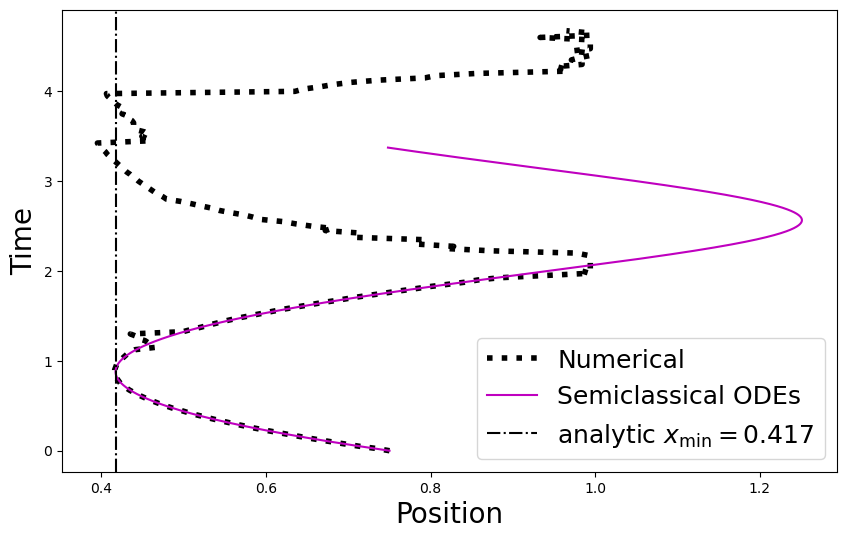

In [13]:
#CORRECT  !!!!!
#and you can tweak

import numpy as np 
import matplotlib.pyplot as plt
from scipy.linalg import expm
from scipy.integrate import solve_ivp

###############################################################################
# SSH Time Evolution (2D data only)
###############################################################################
def build_ssh_hamiltonian(N, v, w, sigma):
    H = np.zeros((N, N), dtype=complex)
    for i in range(N-1):
        v_i = v * ((i+1)/(N-1))**sigma
        w_i = w * ((i+1)/(N-1))**sigma
        if i % 2 == 0:
            H[i, i+1] = -v_i
            H[i+1, i] = -v_i
        else:
            H[i, i+1] = -w_i
            H[i+1, i] = -w_i
    return H

def gaussian_wave_packet(N, n0, p0, omega):
    n = np.arange(N)
    psi = np.exp(-0.5*((n-n0)/omega)**2) * np.exp(1j*p0*n)
    psi /= np.linalg.norm(psi)
    return psi

def run_ssh_2d(N, v, w, sigma, n0, p0, omega, dt, T):
    """
    Evolves an initial Gaussian wavepacket under the SSH Hamiltonian.
    Instead of plotting internally, this function returns the 2D data:
    the rescaled peak positions (x/N) and rescaled times (t/N).
    """
    H_SSH = build_ssh_hamiltonian(N, v, w, sigma)
    U = expm(-1j * H_SSH * dt)
    psi = gaussian_wave_packet(N, n0, p0, omega)
    t_steps = int(np.round(T/dt))
    psi_t = [np.abs(psi.copy())]
    
    for step in range(t_steps):
        psi = U @ psi
        psi_t.append(np.abs(psi))
        
    rescaled_positions = []
    rescaled_times = []
    for step, psi_abs in enumerate(psi_t):
        peak_index = np.argmax(psi_abs)
        t_val = step * dt
        rescaled_positions.append(peak_index / N)
        rescaled_times.append(t_val / N)
        
    return np.array(rescaled_positions), np.array(rescaled_times)

###############################################################################
# Modified SSH Model using ODE integration
###############################################################################
# Parameters
v_mod     = 0.5       
w_mod     = 1     
sigma_mod = 1       
x0        = .75 
epsilon = 1e-8      
p0_mod    = - 0.687*np.pi/2  
t_span    = (0, p0_mod*(-4/np.pi)+2)   
max_step  = 0.001  

def t1_mod(x):
    return v_mod * (x**sigma_mod)
def t2_mod(x):
    return w_mod * (x**sigma_mod)
def dt1_dx_mod(x):
    return v_mod * sigma_mod * (x**(sigma_mod - 1.0))
def dt2_dx_mod(x):
    return w_mod * sigma_mod * (x**(sigma_mod - 1.0))

def modified_ssh_odes(t, y):
    x, p = y
    t1_val = t1_mod(x)
    t2_val = t2_mod(x)
    dt1_val = dt1_dx_mod(x)
    dt2_val = dt2_dx_mod(x)
   # denom = np.sqrt(v_mod**2 + w_mod**2 + 2*v_mod*w_mod*np.cos(2*p0_mod))
    #epsilon = 1e-20
    denom= np.sqrt(t1_val**2 + t2_val**2 + 2*t1_val*t2_val*np.cos(2*p))
    dxdt = 2*(t1_val*t2_val*np.sin(2*p)) / denom
    ddx = (t1_val*dt1_val + t2_val*dt2_val + np.cos(2*p)*(dt1_val*t2_val + t1_val*dt2_val)) / denom
    dpdt = ddx
    return [dxdt, dpdt]




# Run the ODE integration
y0 = [x0, p0_mod]
sol = solve_ivp(modified_ssh_odes, t_span, y0, dense_output=True, max_step=max_step)
t_vals = sol.t       # Original time values from ODE solver
x_vals = sol.y[0]
t_vals_mod = t_vals   # Modified time values (divided by 2)

###############################################################################
# Run the SSH simulation to get 2D data
###############################################################################
N = 1000
v = v_mod
w = w_mod
sigma = sigma_mod
n0 = x0*N
p0_ssh = p0_mod
omega = 25
dt = 25
T = N*p0_mod*(-2/np.pi)+4000

ssh_positions, ssh_times = run_ssh_2d(N, v, w, sigma, n0, p0_ssh, omega, dt, T)

#ANALYTICAL TURNING POINT

x_min_analytic = x0 * (np.sqrt(v_mod**2 + w_mod**2 + 2*v_mod*w_mod*np.cos(2*p0_mod)) / (v_mod + w_mod))**(1/sigma_mod)
x_min_analytic_label = fr"analytic $ x_{{\mathrm{{min}}}} = {x_min_analytic:.3f}$"
###############################################################################
# Combined Plot: 2D Comparison (Time vs. Position)
###############################################################################
plt.figure(figsize=(10,6))
plt.plot(ssh_positions, ssh_times, 'k:',linewidth=4,label="Numerical")
plt.plot(x_vals, t_vals_mod, 'm-', label="Semiclassical ODEs")
plt.xlabel("Position", fontsize= 20)
plt.ylabel("Time", fontsize= 20)
#plt.title(f" Time vs. Position: Numerical vs Semi classical ODE \n (v,w)={v,w}, $\sigma$={sigma}")
plt.axvline(x=x_min_analytic, color='black', linestyle='dashdot', label=x_min_analytic_label)
plt.legend(fontsize=18)
#plt.grid(True)
plt.show()


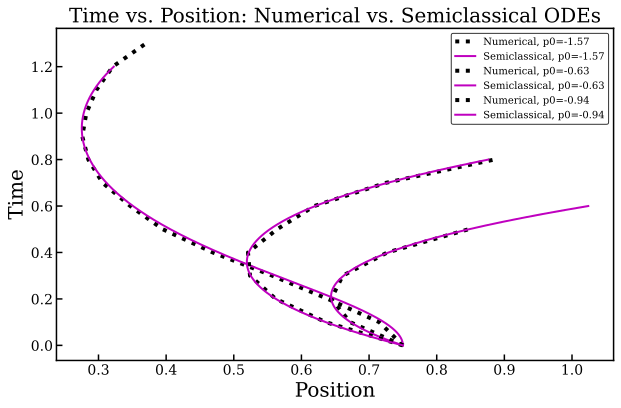

In [105]:
# same as above, but different p0 values

import numpy as np 
import matplotlib.pyplot as plt
from scipy.linalg import expm
from scipy.integrate import solve_ivp

###############################################################################
# SSH Time Evolution (2D data only)
###############################################################################
def build_ssh_hamiltonian(N, v, w, sigma):
    H = np.zeros((N, N), dtype=complex)
    for i in range(N-1):
        v_i = v * ((i+1)/(N-1))**sigma
        w_i = w * ((i+1)/(N-1))**sigma
        if i % 2 == 0:
            H[i, i+1] = -v_i
            H[i+1, i] = -v_i
        else:
            H[i, i+1] = -w_i
            H[i+1, i] = -w_i
    return H

def gaussian_wave_packet(N, n0, p0, omega):
    n = np.arange(N)
    psi = np.exp(-0.5*((n-n0)/omega)**2) * np.exp(1j*p0*n)
    psi /= np.linalg.norm(psi)
    return psi

def run_ssh_2d(N, v, w, sigma, n0, p0, omega, dt, T):
    """
    Evolves an initial Gaussian wavepacket under the SSH Hamiltonian.
    Instead of plotting internally, this function returns the 2D data:
    the rescaled peak positions (x/N) and rescaled times (t/N).
    """
    H_SSH = build_ssh_hamiltonian(N, v, w, sigma)
    U = expm(-1j * H_SSH * dt)
    psi = gaussian_wave_packet(N, n0, p0, omega)
    t_steps = int(np.round(T/dt))
    psi_t = [np.abs(psi.copy())]
    
    for step in range(t_steps):
        psi = U @ psi
        psi_t.append(np.abs(psi))
        
    rescaled_positions = []
    rescaled_times = []
    for step, psi_abs in enumerate(psi_t):
        peak_index = np.argmax(psi_abs)
        t_val = step * dt
        rescaled_positions.append(peak_index / N)
        rescaled_times.append(t_val / N)
        
    return np.array(rescaled_positions), np.array(rescaled_times)

###############################################################################
# Modified SSH Model using ODE integration
###############################################################################
# Parameters
v_mod     = 1.0       
w_mod     = 1.8       
sigma_mod = 1.25       
x0        = 0.75 
epsilon   = 1e-8      

# p0_mod will be varied:
p0_values = [-np.pi/2+epsilon, -0.4*np.pi/2, -0.6*np.pi/2]

def t1_mod(x):
    return v_mod * (x**sigma_mod)
def t2_mod(x):
    return w_mod * (x**sigma_mod)
def dt1_dx_mod(x):
    return v_mod * sigma_mod * (x**(sigma_mod - 1.0))
def dt2_dx_mod(x):
    return w_mod * sigma_mod * (x**(sigma_mod - 1.0))

def modified_ssh_odes(t, y):
    x, p = y
    t1_val = t1_mod(x)
    t2_val = t2_mod(x)
    dt1_val = dt1_dx_mod(x)
    dt2_val = dt2_dx_mod(x)
    denom = np.sqrt(t1_val**2 + t2_val**2 + 2*t1_val*t2_val*np.cos(2*p))
    dxdt = (t1_val*t2_val*np.sin(2*p)) / denom
    ddx = (t1_val*dt1_val + t2_val*dt2_val + np.cos(2*p)*(dt1_val*t2_val + t1_val*dt2_val)) / denom
    dpdt = 0.5 * ddx
    return [dxdt, dpdt]

###############################################################################
# Combined Plot: Numerical vs. Semiclassical for various p0_mod values
###############################################################################
plt.figure(figsize=(10,6))

for p0_mod in p0_values:
    p0_mod = p0_mod  # slight shift if needed
    t_span = (0, p0_mod*(-4/np.pi) + 0.4)
    
    # Run ODE integration (Semiclassical)
    y0 = [x0, p0_mod]
    sol = solve_ivp(modified_ssh_odes, t_span, y0, dense_output=True, max_step=0.001)
    t_vals = sol.t
    x_vals = sol.y[0]
    t_vals_mod = t_vals / 2   # Modified time values (divided by 2)
    
    # Run SSH simulation (Numerical)
    N = 1000
    v = v_mod
    w = w_mod
    sigma = sigma_mod
    n0 = x0 * N
    p0_ssh = p0_mod
    omega = 22
    dt = 100
    T = N * p0_mod * (-2/np.pi)*1.3
    ssh_positions, ssh_times = run_ssh_2d(N, v, w, sigma, n0, p0_ssh, omega, dt, T)
    
    # Plot numerical and semiclassical curves for this p0_mod value
    label_num = f"Numerical, p0={p0_mod:.2f}"
    label_semiclass = f"Semiclassical, p0={p0_mod:.2f}"
    plt.plot(ssh_positions, ssh_times, 'k:', linewidth=4, label=label_num)
    plt.plot(x_vals, t_vals_mod, 'm-', label=label_semiclass)

plt.xlabel("Position", fontsize=20)
plt.ylabel("Time", fontsize=20)
plt.title("Time vs. Position: Numerical vs. Semiclassical ODEs", fontsize=20)
plt.legend(fontsize=10)
plt.show()


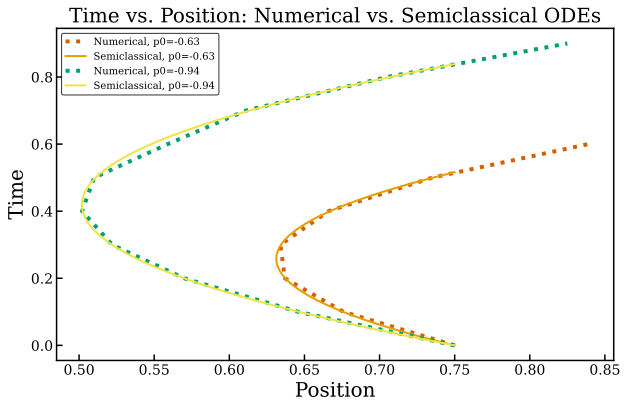

In [120]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.linalg import expm
from scipy.integrate import solve_ivp

###############################################################################
# SSH Time Evolution (2D data only)
###############################################################################
def build_ssh_hamiltonian(N, v, w, sigma):
    H = np.zeros((N, N), dtype=complex)
    for i in range(N-1):
        v_i = v * ((i+1)/(N-1))**sigma
        w_i = w * ((i+1)/(N-1))**sigma
        if i % 2 == 0:
            H[i, i+1] = -v_i
            H[i+1, i] = -v_i
        else:
            H[i, i+1] = -w_i
            H[i+1, i] = -w_i
    return H

def gaussian_wave_packet(N, n0, p0, omega):
    n = np.arange(N)
    psi = np.exp(-0.5*((n-n0)/omega)**2) * np.exp(1j*p0*n)
    psi /= np.linalg.norm(psi)
    return psi

def run_ssh_2d(N, v, w, sigma, n0, p0, omega, dt, T):
    """
    Evolves an initial Gaussian wavepacket under the SSH Hamiltonian.
    Returns the 2D data: the rescaled peak positions (x/N) and rescaled times (t/N).
    Stops immediately once the computed peak position reaches 0.75.
    """
    H_SSH = build_ssh_hamiltonian(N, v, w, sigma)
    U = expm(-1j * H_SSH * dt)
    psi = gaussian_wave_packet(N, n0, p0, omega)
    t_steps = int(np.round(T/dt))
    
    rescaled_positions = []
    rescaled_times = []
    # Record initial condition:
    peak_index = np.argmax(np.abs(psi))
    rescaled_positions.append(peak_index / N)
    rescaled_times.append(0)
    
    for step in range(1, t_steps+1):
        psi = U @ psi
        psi_abs = np.abs(psi)
        peak_index = np.argmax(psi_abs)
        current_position = peak_index / N
        rescaled_positions.append(current_position)
        rescaled_times.append(step * dt / N)
        if current_position >= 0.75:
            break
        
    return np.array(rescaled_positions), np.array(rescaled_times)

###############################################################################
# Modified SSH Model using ODE integration
###############################################################################
# Parameters
v_mod     = 0.78       
w_mod     = 1.8       
sigma_mod = 1.0       
x0        = 0.75 
epsilon   = 1e-8      

# p0_mod will be varied:
p0_values = [-0.4*np.pi/2, -0.6*np.pi/2]

def t1_mod(x):
    return v_mod * (x**sigma_mod)
def t2_mod(x):
    return w_mod * (x**sigma_mod)
def dt1_dx_mod(x):
    return v_mod * sigma_mod * (x**(sigma_mod - 1.0))
def dt2_dx_mod(x):
    return w_mod * sigma_mod * (x**(sigma_mod - 1.0))

def modified_ssh_odes(t, y):
    x, p = y
    t1_val = t1_mod(x)
    t2_val = t2_mod(x)
    dt1_val = dt1_dx_mod(x)
    dt2_val = dt2_dx_mod(x)
    denom = np.sqrt(t1_val**2 + t2_val**2 + 2*t1_val*t2_val*np.cos(2*p))
    dxdt = (t1_val*t2_val*np.sin(2*p)) / denom
    ddx = (t1_val*dt1_val + t2_val*dt2_val + np.cos(2*p)*(dt1_val*t2_val + t1_val*dt2_val)) / denom
    dpdt = 0.5 * ddx
    return [dxdt, dpdt]

# Event function for ODE integration: stop when x reaches 0.75 (ignore t=0)
def event_x75(t, y):
    if t < 1e-6:
        return 1
    return y[0] - 0.75
event_x75.terminal = True
event_x75.direction = 1

###############################################################################
# Combined Plot: Numerical vs. Semiclassical for various p0_mod values
###############################################################################
plt.figure(figsize=(10,6))

for p0_mod in p0_values:
    t_span = (0, 3.6)   # set a sufficiently long time span
    
    # Run ODE integration (Semiclassical) with event function to stop at x = 0.75
    y0 = [x0, p0_mod]
    sol = solve_ivp(modified_ssh_odes, t_span, y0, events=event_x75, dense_output=True, max_step=0.001)
    t_vals = sol.t
    x_vals = sol.y[0]
    t_vals_mod = t_vals / 2   # Modified time values (divided by 2)
    
    # Run SSH simulation (Numerical) – now it stops as soon as peak reaches x = 0.75
    N = 1000
    v = v_mod
    w = w_mod
    sigma = sigma_mod
    n0 = x0 * N
    p0_ssh = p0_mod
    omega = 22
    dt = 100
    T = 1500   # Large enough T to ensure reaching x = 0.75
    ssh_positions, ssh_times = run_ssh_2d(N, v, w, sigma, n0, p0_ssh, omega, dt, T)
    
    # Set different colors for different p0_mod values
    if np.isclose(p0_mod, -np.pi/2, atol=1e-2):
        color_num = "#0072B2"      # deep blue
        color_semiclass = "#56B4E9" # light blue
    elif np.isclose(p0_mod, -0.4*np.pi/2, atol=1e-2):
        color_num = "#D55E00"       # vermillion
        color_semiclass = "#E69F00" # orange
    elif np.isclose(p0_mod, -0.6*np.pi/2, atol=1e-2):
        color_num = "#009E73"       # bluish green
        color_semiclass = "#F0E442" # yellow
    else:
        color_num = "black"
        color_semiclass = "magenta"
    
    # Plot numerical and semiclassical curves for this p0_mod value
    label_num = f"Numerical, p0={p0_mod:.2f}"
    label_semiclass = f"Semiclassical, p0={p0_mod:.2f}"
    plt.plot(ssh_positions, ssh_times, linestyle=':', color=color_num, linewidth=4, label=label_num)
    plt.plot(x_vals, t_vals_mod, linestyle='-', color=color_semiclass, label=label_semiclass)

plt.xlabel("Position", fontsize=20)
plt.ylabel("Time", fontsize=20)
plt.title("Time vs. Position: Numerical vs. Semiclassical ODEs", fontsize=20)
plt.legend(fontsize=10)
plt.show()


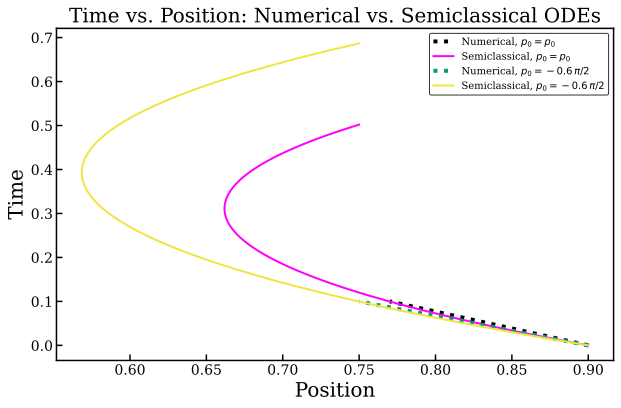

In [141]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.linalg import expm
from scipy.integrate import solve_ivp

###############################################################################
# SSH Time Evolution (2D data only)
###############################################################################
def build_ssh_hamiltonian(N, v, w, sigma):
    H = np.zeros((N, N), dtype=complex)
    for i in range(N-1):
        v_i = v * ((i+1)/(N-1))**sigma
        w_i = w * ((i+1)/(N-1))**sigma
        if i % 2 == 0:
            H[i, i+1] = -v_i
            H[i+1, i] = -v_i
        else:
            H[i, i+1] = -w_i
            H[i+1, i] = -w_i
    return H

def gaussian_wave_packet(N, n0, p0, omega):
    n = np.arange(N)
    psi = np.exp(-0.5*((n-n0)/omega)**2) * np.exp(1j*p0*n)
    psi /= np.linalg.norm(psi)
    return psi

def run_ssh_2d(N, v, w, sigma, n0, p0, omega, dt, T):
    """
    Evolves an initial Gaussian wavepacket under the SSH Hamiltonian.
    Returns the 2D data: the rescaled peak positions (x/N) and rescaled times (t/N).
    Stops immediately once the computed peak position reaches 0.75.
    """
    H_SSH = build_ssh_hamiltonian(N, v, w, sigma)
    U = expm(-1j * H_SSH * dt)
    psi = gaussian_wave_packet(N, n0, p0, omega)
    t_steps = int(np.round(T/dt))
    
    rescaled_positions = []
    rescaled_times = []
    # Record initial condition:
    peak_index = np.argmax(np.abs(psi))
    rescaled_positions.append(peak_index / N)
    rescaled_times.append(0)
    
    for step in range(1, t_steps+1):
        psi = U @ psi
        psi_abs = np.abs(psi)
        peak_index = np.argmax(psi_abs)
        current_position = peak_index / N
        rescaled_positions.append(current_position)
        rescaled_times.append(step * dt / N)
        if current_position >= 0.75:
            break
        
    return np.array(rescaled_positions), np.array(rescaled_times)

###############################################################################
# Modified SSH Model using ODE integration
###############################################################################
# Parameters
v_mod     = 1       
w_mod     = 1.8       
sigma_mod = 1.0       
x0        = 0.9 
epsilon   = 1e-8      

# p0_mod will be varied:
p0_values = [-0.5*np.pi/2, -0.6*np.pi/2]

def t1_mod(x):
    return v_mod * (x**sigma_mod)
def t2_mod(x):
    return w_mod * (x**sigma_mod)
def dt1_dx_mod(x):
    return v_mod * sigma_mod * (x**(sigma_mod - 1.0))
def dt2_dx_mod(x):
    return w_mod * sigma_mod * (x**(sigma_mod - 1.0))

def modified_ssh_odes(t, y):
    x, p = y
    t1_val = t1_mod(x)
    t2_val = t2_mod(x)
    dt1_val = dt1_dx_mod(x)
    dt2_val = dt2_dx_mod(x)
    denom = np.sqrt(t1_val**2 + t2_val**2 + 2*t1_val*t2_val*np.cos(2*p))
    dxdt = (t1_val*t2_val*np.sin(2*p)) / denom
    ddx = (t1_val*dt1_val + t2_val*dt2_val + np.cos(2*p)*(dt1_val*t2_val + t1_val*dt2_val)) / denom
    dpdt = 0.5 * ddx
    return [dxdt, dpdt]

# Event function for ODE integration: stop when x reaches 0.75 (ignore t=0)
def event_x75(t, y):
    if t < 1e-6:
        return 1
    return y[0] - 0.75
event_x75.terminal = True
event_x75.direction = 1

###############################################################################
# Combined Plot: Numerical vs. Semiclassical for various p0_mod values
###############################################################################
plt.figure(figsize=(10,6))

for p0_mod in p0_values:
    t_span = (0, 3.6)   # set a sufficiently long time span
    
    # Run ODE integration (Semiclassical) with event function to stop at x = 0.75
    y0 = [x0, p0_mod]
    sol = solve_ivp(modified_ssh_odes, t_span, y0, events=event_x75, dense_output=True, max_step=0.001)
    t_vals = sol.t
    x_vals = sol.y[0]
    t_vals_mod = t_vals / 2   # Modified time values (divided by 2)
    
    # Run SSH simulation (Numerical) – now it stops as soon as peak reaches x = 0.75
    N = 1000
    v = v_mod
    w = w_mod
    sigma = sigma_mod
    n0 = x0 * N
    p0_ssh = p0_mod
    omega = 22
    dt = 100
    T = 800   # Large enough T to ensure reaching x = 0.75
    ssh_positions, ssh_times = run_ssh_2d(N, v, w, sigma, n0, p0_ssh, omega, dt, T)
    
    # Set different colors for different p0_mod values and use fixed LaTeX legend strings
    if np.isclose(p0_mod, -0.4*np.pi/2, atol=1e-2):
        color_num = "#D55E00"       # vermillion
        color_semiclass = "#E69F00" # orange
        label_num = r"Numerical, $p_0 = -0.4\,\pi/2$"
        label_semiclass = r"Semiclassical, $p_0 = -0.4\,\frac{\pi}{2}$"
    elif np.isclose(p0_mod, -0.6*np.pi/2, atol=1e-2):
        color_num = "#009E73"       # bluish green
        color_semiclass = "#F0E442" # yellow
        label_num = r"Numerical, $p_0 = -0.6\,\pi/2$"
        label_semiclass = r"Semiclassical, $p_0 = -0.6\,\pi/2$"
    else:
        color_num = "black"
        color_semiclass = "magenta"
        label_num = r"Numerical, $p_0 = p_0$"
        label_semiclass = r"Semiclassical, $p_0 = p_0$"
    
    plt.plot(ssh_positions, ssh_times, linestyle=':', color=color_num, linewidth=4, label=label_num)
    plt.plot(x_vals, t_vals_mod, linestyle='-', color=color_semiclass, label=label_semiclass)

plt.xlabel("Position", fontsize=20)
plt.ylabel("Time", fontsize=20)
plt.title("Time vs. Position: Numerical vs. Semiclassical ODEs", fontsize=20)
plt.legend(fontsize=10)
plt.show()


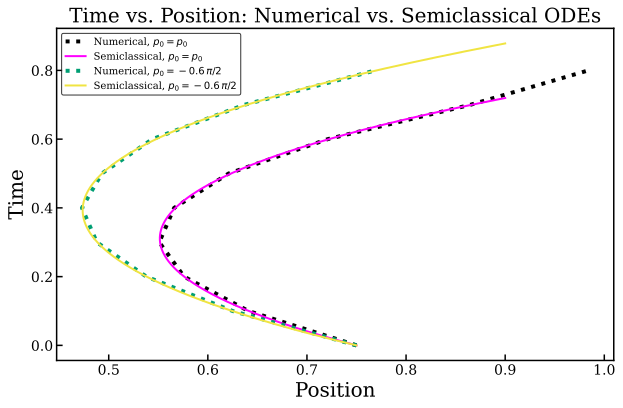

In [144]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.linalg import expm
from scipy.integrate import solve_ivp

###############################################################################
# SSH Time Evolution (2D data only)
###############################################################################
def build_ssh_hamiltonian(N, v, w, sigma):
    H = np.zeros((N, N), dtype=complex)
    for i in range(N-1):
        v_i = v * ((i+1)/(N-1))**sigma
        w_i = w * ((i+1)/(N-1))**sigma
        if i % 2 == 0:
            H[i, i+1] = -v_i
            H[i+1, i] = -v_i
        else:
            H[i, i+1] = -w_i
            H[i+1, i] = -w_i
    return H

def gaussian_wave_packet(N, n0, p0, omega):
    n = np.arange(N)
    psi = np.exp(-0.5*((n-n0)/omega)**2) * np.exp(1j*p0*n)
    psi /= np.linalg.norm(psi)
    return psi

def run_ssh_2d(N, v, w, sigma, n0, p0, omega, dt, T):
    """
    Evolves an initial Gaussian wavepacket under the SSH Hamiltonian.
    Returns the 2D data: the rescaled peak positions (x/N) and rescaled times (t/N).
    Stops immediately once the computed peak position reaches 0.9.
    """
    H_SSH = build_ssh_hamiltonian(N, v, w, sigma)
    U = expm(-1j * H_SSH * dt)
    psi = gaussian_wave_packet(N, n0, p0, omega)
    t_steps = int(np.round(T/dt))
    
    rescaled_positions = []
    rescaled_times = []
    # Record initial condition:
    peak_index = np.argmax(np.abs(psi))
    rescaled_positions.append(peak_index / N)
    rescaled_times.append(0)
    
    for step in range(1, t_steps+1):
        psi = U @ psi
        psi_abs = np.abs(psi)
        peak_index = np.argmax(psi_abs)
        current_position = peak_index / N
        rescaled_positions.append(current_position)
        rescaled_times.append(step * dt / N)
        if current_position >= 0.9:
            break
        
    return np.array(rescaled_positions), np.array(rescaled_times)

###############################################################################
# Modified SSH Model using ODE integration
###############################################################################
# Parameters
v_mod     = 1.0      
w_mod     = 1.8       
sigma_mod = 1.0       
x0        = 0.75   # Changed to 0.1 so that evolution can progress towards 0.9.
epsilon   = 1e-8       

# p0_mod will be varied:
p0_values = [-0.5*np.pi/2, -0.6*np.pi/2]

def t1_mod(x):
    return v_mod * (x**sigma_mod)
def t2_mod(x):
    return w_mod * (x**sigma_mod)
def dt1_dx_mod(x):
    return v_mod * sigma_mod * (x**(sigma_mod - 1.0))
def dt2_dx_mod(x):
    return w_mod * sigma_mod * (x**(sigma_mod - 1.0))

def modified_ssh_odes(t, y):
    x, p = y
    t1_val = t1_mod(x)
    t2_val = t2_mod(x)
    dt1_val = dt1_dx_mod(x)
    dt2_val = dt2_dx_mod(x)
    denom = np.sqrt(t1_val**2 + t2_val**2 + 2*t1_val*t2_val*np.cos(2*p))
    dxdt = (t1_val*t2_val*np.sin(2*p)) / denom
    ddx = (t1_val*dt1_val + t2_val*dt2_val + np.cos(2*p)*(dt1_val*t2_val + t1_val*dt2_val)) / denom
    dpdt = 0.5 * ddx
    return [dxdt, dpdt]

# Event function for ODE integration: stop when x reaches 0.9 (ignoring t=0)
def event_x90(t, y):
    if t < 1e-6:
        return 1
    return y[0] - 0.9
event_x90.terminal = True
event_x90.direction = 1

###############################################################################
# Combined Plot: Numerical vs. Semiclassical for various p0_mod values
###############################################################################
plt.figure(figsize=(10,6))

for p0_mod in p0_values:
    t_span = (0, 3.6)   # set a sufficiently long time span
    
    # Run ODE integration (Semiclassical) with event function to stop at x = 0.9
    y0 = [x0, p0_mod]
    sol = solve_ivp(modified_ssh_odes, t_span, y0, events=event_x90, dense_output=True, max_step=0.001)
    t_vals = sol.t
    x_vals = sol.y[0]
    t_vals_mod = t_vals / 2   # Modified time values (divided by 2)
    
    # Run SSH simulation (Numerical) – stops as soon as peak reaches x = 0.9
    N = 1000
    v = v_mod
    w = w_mod
    sigma = sigma_mod
    n0 = x0 * N
    p0_ssh = p0_mod
    omega = 25
    dt = 100
    T = 800   # Large enough T to ensure reaching x = 0.9
    ssh_positions, ssh_times = run_ssh_2d(N, v, w, sigma, n0, p0_ssh, omega, dt, T)
    
    # Set different colors for different p0_mod values and fixed LaTeX legend strings
    if np.isclose(p0_mod, -0.4*np.pi/2, atol=1e-2):
        color_num = "#D55E00"       # vermillion
        color_semiclass = "#E69F00" # orange
        label_num = r"Numerical, $p_0 = -0.4\,\pi/2$"
        label_semiclass = r"Semiclassical, $p_0 = -0.4\,\frac{\pi}{2}$"
    elif np.isclose(p0_mod, -0.6*np.pi/2, atol=1e-2):
        color_num = "#009E73"       # bluish green
        color_semiclass = "#F0E442" # yellow
        label_num = r"Numerical, $p_0 = -0.6\,\pi/2$"
        label_semiclass = r"Semiclassical, $p_0 = -0.6\,\pi/2$"
    else:
        color_num = "black"
        color_semiclass = "magenta"
        label_num = r"Numerical, $p_0 = p_0$"
        label_semiclass = r"Semiclassical, $p_0 = p_0$"
    
    plt.plot(ssh_positions, ssh_times, linestyle=':', color=color_num, linewidth=4, label=label_num)
    plt.plot(x_vals, t_vals_mod, linestyle='-', color=color_semiclass, label=label_semiclass)

plt.xlabel("Position", fontsize=20)
plt.ylabel("Time", fontsize=20)
plt.title("Time vs. Position: Numerical vs. Semiclassical ODEs", fontsize=20)
plt.legend(fontsize=10)
plt.show()


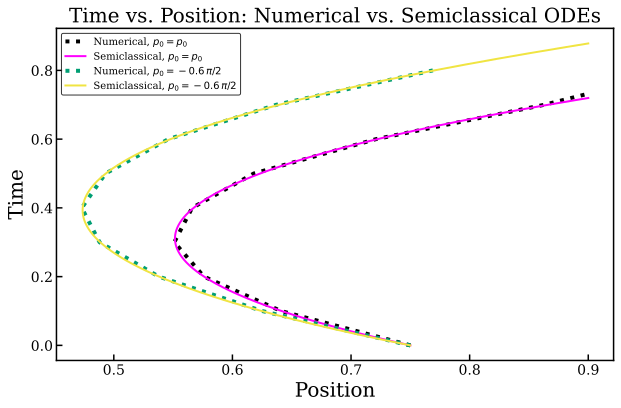

In [145]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.linalg import expm
from scipy.integrate import solve_ivp

###############################################################################
# SSH Time Evolution (2D data only) - Modified for exact termination at x=0.9
###############################################################################
def build_ssh_hamiltonian(N, v, w, sigma):
    H = np.zeros((N, N), dtype=complex)
    for i in range(N-1):
        v_i = v * ((i+1)/(N-1))**sigma
        w_i = w * ((i+1)/(N-1))**sigma
        if i % 2 == 0:
            H[i, i+1] = -v_i
            H[i+1, i] = -v_i
        else:
            H[i, i+1] = -w_i
            H[i+1, i] = -w_i
    return H

def gaussian_wave_packet(N, n0, p0, omega):
    n = np.arange(N)
    psi = np.exp(-0.5*((n-n0)/omega)**2) * np.exp(1j*p0*n)
    psi /= np.linalg.norm(psi)
    return psi

def run_ssh_2d(N, v, w, sigma, n0, p0, omega, dt, T):
    """
    Evolves an initial Gaussian wavepacket under the SSH Hamiltonian.
    Returns the 2D data: the rescaled peak positions (x/N) and rescaled times (t/N).
    The evolution is recorded until the computed peak position reaches 0.9.
    In the step where the peak overshoots 0.9, linear interpolation is used to 
    include a point exactly at x = 0.9.
    """
    H_SSH = build_ssh_hamiltonian(N, v, w, sigma)
    U = expm(-1j * H_SSH * dt)
    psi = gaussian_wave_packet(N, n0, p0, omega)
    t_steps = int(np.round(T/dt))
    
    rescaled_positions = []
    rescaled_times = []
    
    # Record initial condition:
    peak_index = np.argmax(np.abs(psi))
    current_position = peak_index / N
    current_time = 0
    rescaled_positions.append(current_position)
    rescaled_times.append(current_time)
    
    # Store previous values for interpolation:
    prev_position = current_position
    prev_time = current_time

    for step in range(1, t_steps+1):
        psi = U @ psi
        psi_abs = np.abs(psi)
        peak_index = np.argmax(psi_abs)
        current_position = peak_index / N
        current_time = step * dt / N
        # If the current position overshoots 0.9, interpolate to get an exact 0.9 point.
        if current_position >= 0.9:
            if current_position == prev_position:
                rescaled_positions.append(0.9)
                rescaled_times.append(current_time)
            else:
                fraction = (0.9 - prev_position) / (current_position - prev_position)
                interp_time = prev_time + fraction * (current_time - prev_time)
                rescaled_positions.append(0.9)
                rescaled_times.append(interp_time)
            break
        else:
            rescaled_positions.append(current_position)
            rescaled_times.append(current_time)
        prev_position = current_position
        prev_time = current_time
        
    return np.array(rescaled_positions), np.array(rescaled_times)

###############################################################################
# Modified SSH Model using ODE integration (Semiclassical)
###############################################################################
# Parameters
v_mod     = 1       
w_mod     = 1.8       
sigma_mod = 1.0       
x0        = 0.75   # Starting at 0.1 so that evolution reaches 0.9.
epsilon   = 1e-8       

# p0_mod will be varied:
p0_values = [-0.5*np.pi/2, -0.6*np.pi/2]

def t1_mod(x):
    return v_mod * (x**sigma_mod)
def t2_mod(x):
    return w_mod * (x**sigma_mod)
def dt1_dx_mod(x):
    return v_mod * sigma_mod * (x**(sigma_mod - 1.0))
def dt2_dx_mod(x):
    return w_mod * sigma_mod * (x**(sigma_mod - 1.0))

def modified_ssh_odes(t, y):
    x, p = y
    t1_val = t1_mod(x)
    t2_val = t2_mod(x)
    dt1_val = dt1_dx_mod(x)
    dt2_val = dt2_dx_mod(x)
    denom = np.sqrt(t1_val**2 + t2_val**2 + 2*t1_val*t2_val*np.cos(2*p))
    dxdt = (t1_val*t2_val*np.sin(2*p)) / denom
    ddx = (t1_val*dt1_val + t2_val*dt2_val + np.cos(2*p)*(dt1_val*t2_val + t1_val*dt2_val)) / denom
    dpdt = 0.5 * ddx
    return [dxdt, dpdt]

# Event function for ODE integration: stop when x reaches 0.9 (ignoring t=0)
def event_x90(t, y):
    if t < 1e-6:
        return 1
    return y[0] - 0.9
event_x90.terminal = True
event_x90.direction = 1

###############################################################################
# Combined Plot: Numerical vs. Semiclassical for various p0_mod values
###############################################################################
plt.figure(figsize=(10,6))

for p0_mod in p0_values:
    t_span = (0, 3.6)   # set a sufficiently long time span
    
    # Run ODE integration (Semiclassical) with event function to stop at x = 0.9
    y0 = [x0, p0_mod]
    sol = solve_ivp(modified_ssh_odes, t_span, y0, events=event_x90, dense_output=True, max_step=0.001)
    t_vals = sol.t
    x_vals = sol.y[0]
    t_vals_mod = t_vals / 2   # Modified time values (divided by 2)
    
    # Run SSH simulation (Numerical) – now it stops exactly at x = 0.9 thanks to interpolation
    N = 1000
    v = v_mod
    w = w_mod
    sigma = sigma_mod
    n0 = x0 * N
    p0_ssh = p0_mod
    omega = 22
    dt = 100
    T = 800   # Large enough T to ensure reaching x = 0.9
    ssh_positions, ssh_times = run_ssh_2d(N, v, w, sigma, n0, p0_ssh, omega, dt, T)
    
    # Set different colors for different p0_mod values and fixed LaTeX legend strings
    if np.isclose(p0_mod, -0.4*np.pi/2, atol=1e-2):
        color_num = "#D55E00"       # vermillion
        color_semiclass = "#E69F00" # orange
        label_num = r"Numerical, $p_0 = -0.4\,\pi/2$"
        label_semiclass = r"Semiclassical, $p_0 = -0.4\,\pi/2$"
    elif np.isclose(p0_mod, -0.6*np.pi/2, atol=1e-2):
        color_num = "#009E73"       # bluish green
        color_semiclass = "#F0E442" # yellow
        label_num = r"Numerical, $p_0 = -0.6\,\pi/2$"
        label_semiclass = r"Semiclassical, $p_0 = -0.6\,\pi/2$"
    else:
        color_num = "black"
        color_semiclass = "magenta"
        label_num = r"Numerical, $p_0 = p_0$"
        label_semiclass = r"Semiclassical, $p_0 = p_0$"
    
    plt.plot(ssh_positions, ssh_times, linestyle=':', color=color_num, linewidth=4, label=label_num)
    plt.plot(x_vals, t_vals_mod, linestyle='-', color=color_semiclass, label=label_semiclass)

plt.xlabel("Position", fontsize=20)
plt.ylabel("Time", fontsize=20)
plt.title("Time vs. Position: Numerical vs. Semiclassical ODEs", fontsize=20)
plt.legend(fontsize=10)
plt.show()


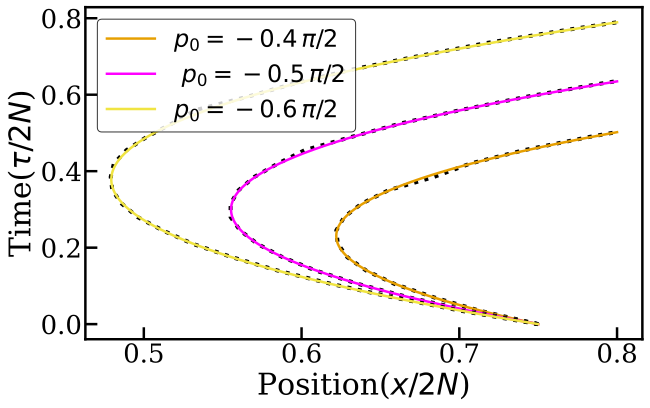

In [23]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.linalg import expm
from scipy.integrate import solve_ivp

###############################################################################
# SSH Time Evolution (2D data only) - Now post-processes to stop at x=0.9
###############################################################################
def build_ssh_hamiltonian(N, v, w, sigma):
    H = np.zeros((N, N), dtype=complex)
    for i in range(N-1):
        v_i = v * ((i+1)/(N-1))**sigma
        w_i = w * ((i+1)/(N-1))**sigma
        if i % 2 == 0:
            H[i, i+1] = -v_i
            H[i+1, i] = -v_i
        else:
            H[i, i+1] = -w_i
            H[i+1, i] = -w_i
    return H

def gaussian_wave_packet(N, n0, p0, omega):
    n = np.arange(N)
    psi = (np.pi*omega**2)**(-0.25)*np.exp(-0.5*((n-n0)/omega)**2) * np.exp(1j*p0*n)
    psi /= np.linalg.norm(psi)
    return psi

def run_ssh_2d(N, v, w, sigma, n0, p0, omega, dt, T):
    """
    Evolves an initial Gaussian wavepacket under the SSH Hamiltonian.
    Returns the rescaled peak positions (x/N) and rescaled times (t/N),
    but only up to x = 0.9. If the simulation overshoots 0.9, linear
    interpolation is used to generate a final point exactly at x = 0.9.
    """
    H_SSH = build_ssh_hamiltonian(N, v, w, sigma)
    U = expm(-1j * H_SSH * dt)
    psi = gaussian_wave_packet(N, n0, p0, omega)
    t_steps = int(np.round(T/dt))
    
    rescaled_positions = []
    rescaled_times = []
    # Record initial condition:
    peak_index = np.argmax(np.abs(psi))
    rescaled_positions.append(peak_index / N)
    rescaled_times.append(0)
    
    for step in range(1, t_steps+1):
        psi = U @ psi
        psi_abs = np.abs(psi)
        peak_index = np.argmax(psi_abs)
        current_position = peak_index / N
        current_time = step * dt / N
        rescaled_positions.append(current_position)
        rescaled_times.append(current_time)
    
    # Convert to numpy arrays for post-processing
    rescaled_positions = np.array(rescaled_positions)
    rescaled_times = np.array(rescaled_times)
    
    # Find the first index where the position reaches or exceeds 0.9
    idx = np.where(rescaled_positions >= 0.8)[0]
    if len(idx) > 0:
        first_idx = idx[0]
        # If 0.9 is reached exactly at first_idx, no interpolation is needed.
        if np.isclose(rescaled_positions[first_idx], 0.8):
            new_positions = rescaled_positions[:first_idx+1]
            new_times = rescaled_times[:first_idx+1]
        else:
            # Interpolate between the last point below 0.9 and the first point above 0.9.
            pos1 = rescaled_positions[first_idx - 1]
            pos2 = rescaled_positions[first_idx]
            t1 = rescaled_times[first_idx - 1]
            t2 = rescaled_times[first_idx]
            fraction = (0.8 - pos1) / (pos2 - pos1)
            interp_time = t1 + fraction * (t2 - t1)
            new_positions = np.concatenate((rescaled_positions[:first_idx], [0.8]))
            new_times = np.concatenate((rescaled_times[:first_idx], [interp_time]))
        return new_positions, new_times
    else:
        return rescaled_positions, rescaled_times

###############################################################################
# Modified SSH Model using ODE integration (Semiclassical)
###############################################################################
# Parameters
v_mod     = 1      
w_mod     = 1.9      
sigma_mod = 1.0       
x0        = 0.75   # Starting at 0.1 so that evolution reaches 0.9.
epsilon   = 1e-16       

# p0_mod will be varied:
p0_values = [ -0.4*np.pi/2, -0.5*np.pi/2,-0.6*np.pi/2]

def t1_mod(x):
    return v_mod * (x**sigma_mod)
def t2_mod(x):
    return w_mod * (x**sigma_mod)
def dt1_dx_mod(x):
    return v_mod * sigma_mod * (x**(sigma_mod - 1.0))
def dt2_dx_mod(x):
    return w_mod * sigma_mod * (x**(sigma_mod - 1.0))

def modified_ssh_odes(t, y):
    x, p = y
    t1_val = t1_mod(x)
    t2_val = t2_mod(x)
    dt1_val = dt1_dx_mod(x)
    dt2_val = dt2_dx_mod(x)
    denom = np.sqrt(t1_val**2 + t2_val**2 + 2*t1_val*t2_val*np.cos(2*p))
    dxdt = 2*(t1_val*t2_val*np.sin(2*p)) / denom
    ddx = (t1_val*dt1_val + t2_val*dt2_val + np.cos(2*p)*(dt1_val*t2_val + t1_val*dt2_val)) / denom
    dpdt = ddx
    return [dxdt, dpdt]

# Event function for ODE integration: stop when x reaches 0.8 (ignoring t=0)
def event_x90(t, y):
    if t < 1e-6:
        return 1
    return y[0] - 0.8
event_x90.terminal = True
event_x90.direction = 1

###############################################################################
# Combined Plot: Numerical vs. Semiclassical for various p0_mod values
###############################################################################
plt.figure(figsize=(10,6))

for p0_mod in p0_values:
    t_span = (0, 3.6)   # set a sufficiently long time span
    
    # Run ODE integration (Semiclassical) with event function to stop at x = 0.9
    y0 = [x0, p0_mod]
    sol = solve_ivp(modified_ssh_odes, t_span, y0, events=event_x90, dense_output=True, max_step=0.001)
    t_vals = sol.t
    x_vals = sol.y[0]
    t_vals_mod = t_vals   # Modified time values (divided by 2)
    
    # Run SSH simulation (Numerical) – post-processed to end exactly at x = 0.9
    N = 1000
    v = v_mod
    w = w_mod
    sigma = sigma_mod
    n0 = x0 * N
    p0_ssh = p0_mod
    omega = 25
    dt = 35
    T = 1000   # Large enough T to ensure reaching x = 0.9
    ssh_positions, ssh_times = run_ssh_2d(N, v, w, sigma, n0, p0_ssh, omega, dt, T)
    
    # Set different colors for different p0_mod values and fixed LaTeX legend strings
    if np.isclose(p0_mod, -0.4*np.pi/2, atol=1e-2):
        color_num = "black"       # vermillion
        color_semiclass = "#E69F00" # orange
        #label_num = r"Numerical, $p_0 = -0.4\,\pi/2$"
        label_semiclass = r"$p_0 = -0.4\,\pi/2$"
    elif np.isclose(p0_mod, -0.6*np.pi/2, atol=1e-2):
        color_num = "black"       # bluish green
        color_semiclass = "#F0E442" # yellow
        #label_num = r"Numerical, $p_0 = -0.6\,\pi/2$"
        label_semiclass = r"$p_0 = -0.6\,\pi/2$"
    else:
        color_num = "black"
        color_semiclass = "magenta"
        #label_num = r"Numerical, $p_0 = p_0$"
        label_semiclass = r" $p_0 = -0.5\,\pi/2$"
    
    plt.plot(ssh_positions, ssh_times, linestyle=':', color=color_num, linewidth=4)
    plt.plot(x_vals, t_vals_mod, linestyle='-', color=color_semiclass, label=label_semiclass)

plt.xlabel("Position($x/2N$)", fontsize=30)
plt.ylabel("Time($ \\tau /2N$)", fontsize=30)
#plt.title("Time vs. Position: Numerical vs. Semiclassical ODEs", fontsize=20)
plt.legend(fontsize=24)
plt.show()


C:\Users\lenovo\AppData\Local\Temp\ipykernel_21844\3659483118.py:100: RuntimeWarning: invalid value encountered in scalar power
  return v_mod * (x**sigma_mod)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_21844\3659483118.py:102: RuntimeWarning: invalid value encountered in scalar power
  return w_mod * (x**sigma_mod)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_21844\3659483118.py:104: RuntimeWarning: invalid value encountered in scalar power
  return v_mod * sigma_mod * (x**(sigma_mod - 1.0))
C:\Users\lenovo\AppData\Local\Temp\ipykernel_21844\3659483118.py:106: RuntimeWarning: invalid value encountered in scalar power
  return w_mod * sigma_mod * (x**(sigma_mod - 1.0))


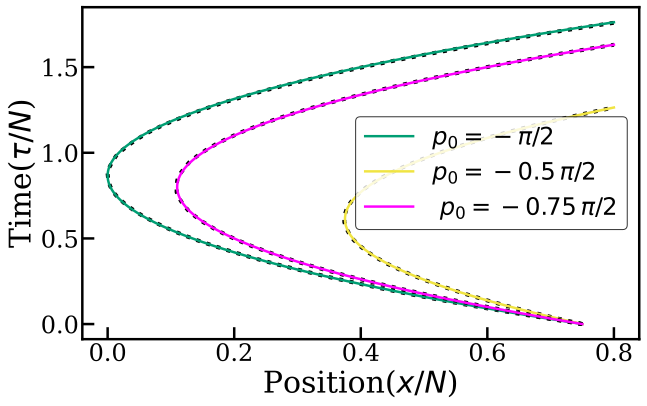

In [19]:
#FOR 799 PRESENTATION

import numpy as np 
import matplotlib.pyplot as plt
from scipy.linalg import expm
from scipy.integrate import solve_ivp

###############################################################################
# SSH Time Evolution (2D data only) - Now post-processes to stop at x=0.9
###############################################################################
def build_ssh_hamiltonian(N, v, w, sigma):
    H = np.zeros((N, N), dtype=complex)
    for i in range(N-1):
        v_i = v * ((i+1)/(N-1))**sigma
        w_i = w * ((i+1)/(N-1))**sigma
        if i % 2 == 0:
            H[i, i+1] = -v_i
            H[i+1, i] = -v_i
        else:
            H[i, i+1] = -w_i
            H[i+1, i] = -w_i
    return H

def gaussian_wave_packet(N, n0, p0, omega):
    n = np.arange(N)
    psi = (np.pi*omega**2)**(-0.25)*np.exp(-0.5*((n-n0)/omega)**2) * np.exp(1j*p0*n)
    psi /= np.linalg.norm(psi)
    return psi

def run_ssh_2d(N, v, w, sigma, n0, p0, omega, dt, T):
    """
    Evolves an initial Gaussian wavepacket under the SSH Hamiltonian.
    Returns the rescaled peak positions (x/N) and rescaled times (t/N),
    but only up to x = 0.9. If the simulation overshoots 0.9, linear
    interpolation is used to generate a final point exactly at x = 0.9.
    """
    H_SSH = build_ssh_hamiltonian(N, v, w, sigma)
    U = expm(-1j * H_SSH * dt)
    psi = gaussian_wave_packet(N, n0, p0, omega)
    t_steps = int(np.round(T/dt))
    
    rescaled_positions = []
    rescaled_times = []
    # Record initial condition:
    peak_index = np.argmax(np.abs(psi))
    rescaled_positions.append(peak_index / N)
    rescaled_times.append(0)
    
    for step in range(1, t_steps+1):
        psi = U @ psi
        psi_abs = np.abs(psi)
        peak_index = np.argmax(psi_abs)
        current_position = peak_index / N
        current_time = step * dt / N
        rescaled_positions.append(current_position)
        rescaled_times.append(current_time)
    
    # Convert to numpy arrays for post-processing
    rescaled_positions = np.array(rescaled_positions)
    rescaled_times = np.array(rescaled_times)
    
    # Find the first index where the position reaches or exceeds 0.9
    idx = np.where(rescaled_positions >= 0.8)[0]
    if len(idx) > 0:
        first_idx = idx[0]
        # If 0.9 is reached exactly at first_idx, no interpolation is needed.
        if np.isclose(rescaled_positions[first_idx], 0.8):
            new_positions = rescaled_positions[:first_idx+1]
            new_times = rescaled_times[:first_idx+1]
        else:
            # Interpolate between the last point below 0.9 and the first point above 0.9.
            pos1 = rescaled_positions[first_idx - 1]
            pos2 = rescaled_positions[first_idx]
            t1 = rescaled_times[first_idx - 1]
            t2 = rescaled_times[first_idx]
            fraction = (0.8 - pos1) / (pos2 - pos1)
            interp_time = t1 + fraction * (t2 - t1)
            new_positions = np.concatenate((rescaled_positions[:first_idx], [0.8]))
            new_times = np.concatenate((rescaled_times[:first_idx], [interp_time]))
        return new_positions, new_times
    else:
        return rescaled_positions, rescaled_times

###############################################################################
# Modified SSH Model using ODE integration (Semiclassical)
###############################################################################
# Parameters
v_mod     = 1      
w_mod     = 1     
sigma_mod = 0.5       
x0        = 0.75   # Starting at 0.1 so that evolution reaches 0.9.
epsilon   = 1e-6       
p1=-1*np.pi/2+epsilon
p2= -0.5*np.pi/2
p3=-0.75*np.pi/2
# p0_mod will be varied:
p0_values = [ p1,p2,p3 ]

def t1_mod(x):
    return v_mod * (x**sigma_mod)
def t2_mod(x):
    return w_mod * (x**sigma_mod)
def dt1_dx_mod(x):
    return v_mod * sigma_mod * (x**(sigma_mod - 1.0))
def dt2_dx_mod(x):
    return w_mod * sigma_mod * (x**(sigma_mod - 1.0))

def modified_ssh_odes(t, y):
    x, p = y
    t1_val = t1_mod(x)
    t2_val = t2_mod(x)
    dt1_val = dt1_dx_mod(x)
    dt2_val = dt2_dx_mod(x)
    denom = np.sqrt(t1_val**2 + t2_val**2 + 2*t1_val*t2_val*np.cos(2*p))
    dxdt = 2*(t1_val*t2_val*np.sin(2*p)) / denom
    ddx = (t1_val*dt1_val + t2_val*dt2_val + np.cos(2*p)*(dt1_val*t2_val + t1_val*dt2_val)) / denom
    dpdt = ddx
    return [dxdt, dpdt]

# Event function for ODE integration: stop when x reaches 0.8 (ignoring t=0)
def event_x90(t, y):
    if t < 1e-6:
        return 1
    return y[0] - 0.8
event_x90.terminal = True
event_x90.direction = 1

###############################################################################
# Combined Plot: Numerical vs. Semiclassical for various p0_mod values
###############################################################################
plt.figure(figsize=(10,6))

for p0_mod in p0_values:
    t_span = (0, 2)   # set a sufficiently long time span
    
    # Run ODE integration (Semiclassical) with event function to stop at x = 0.9
    y0 = [x0, p0_mod]
    sol = solve_ivp(modified_ssh_odes, t_span, y0, events=event_x90, dense_output=True, max_step=0.001)
    t_vals = sol.t
    x_vals = sol.y[0]
    t_vals_mod = t_vals   # Modified time values (divided by 2)
    
    # Run SSH simulation (Numerical) – post-processed to end exactly at x = 0.9
    N = 1000
    v = v_mod
    w = w_mod
    sigma = sigma_mod
    n0 = x0 * N
    p0_ssh = p0_mod
    omega = 25
    dt = 35
    T = 2000   # Large enough T to ensure reaching x = 0.9
    ssh_positions, ssh_times = run_ssh_2d(N, v, w, sigma, n0, p0_ssh, omega, dt, T)
    
    # Set different colors for different p0_mod values and fixed LaTeX legend strings
    if np.isclose(p0_mod, p1, atol=1e-2):
        color_num = "black"       # vermillion
        color_semiclass =  "#009E73"      # teal‑green   "#E69F00" # orange
        #label_num = r"Numerical, $p_0 = -0.4\,\pi/2$"
        label_semiclass = r"$p_0 = -\pi/2$"
    elif np.isclose(p0_mod, p2, atol=1e-2):
        color_num = "black"       # bluish green
        color_semiclass = "#F0E442" # yellow
        #label_num = r"Numerical, $p_0 = -0.6\,\pi/2$"
        label_semiclass = r"$p_0 = -0.5\,\pi/2$"
    else:
        color_num = "black"
        color_semiclass = "magenta"
        #label_num = r"Numerical, $p_0 = p_0$"
        label_semiclass = r" $p_0 = -0.75\,\pi/2$"
    
    plt.plot(ssh_positions, ssh_times, linestyle=':', color=color_num, linewidth=4)
    plt.plot(x_vals, t_vals_mod, linestyle='-', color=color_semiclass, label=label_semiclass)

plt.xlabel("Position($x/N$)", fontsize=30)
plt.ylabel("Time($ \\tau /N$)", fontsize=30)
#plt.title("Time vs. Position: Numerical vs. Semiclassical ODEs", fontsize=20)
plt.legend(fontsize=24)
plt.show()


C:\Users\lenovo\AppData\Local\Temp\ipykernel_21844\3659483118.py:100: RuntimeWarning: invalid value encountered in scalar power
  return v_mod * (x**sigma_mod)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_21844\3659483118.py:102: RuntimeWarning: invalid value encountered in scalar power
  return w_mod * (x**sigma_mod)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_21844\3659483118.py:104: RuntimeWarning: invalid value encountered in scalar power
  return v_mod * sigma_mod * (x**(sigma_mod - 1.0))
C:\Users\lenovo\AppData\Local\Temp\ipykernel_21844\3659483118.py:106: RuntimeWarning: invalid value encountered in scalar power
  return w_mod * sigma_mod * (x**(sigma_mod - 1.0))


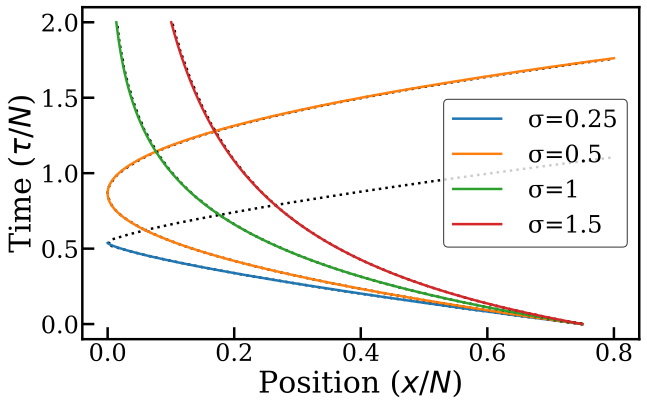

In [37]:
# FOR 799 PRESENTATION 
# … (all imports and function definitions unchanged) …

# Parameters (unchanged)
v_mod     = 1      
w_mod     = 1     
sigma_mod = 0.5       
x0        = 0.75   # Starting at 0.75 so that evolution reaches 0.8.
epsilon   = 1e-6       
p1 = -1*np.pi/2 + epsilon
p2 = -0.5*np.pi/2
p3 = -0.75*np.pi/2

# Keep a single momentum
p0_mod = p1

# Define the sigma values to iterate over
sigma_list = [0.25, 0.5, 1, 1.5]

# Combined Plot: Numerical vs. Semiclassical for various sigma values
plt.figure(figsize=(10,6))

for sigma_mod in sigma_list:                              # iterate over σ values :contentReference[oaicite:0]{index=0}
    # Semiclassical ODE integration with event to stop at x = 0.8
    sol = solve_ivp(
        modified_ssh_odes,
        (0, 2),
        [x0, p0_mod],
        events=event_x90,
        dense_output=True,
        max_step=0.001
    )                                                   # SciPy solve_ivp usage :contentReference[oaicite:1]{index=1}
    t_vals = sol.t
    x_vals = sol.y[0]

    # Numerical SSH simulation – post-processed to exactly x = 0.8
    N = 1000
    n0 = x0 * N
    omega = 25
    dt = 35
    T = 2000
    ssh_positions, ssh_times = run_ssh_2d(
        N, v_mod, w_mod, sigma_mod, n0, p0_mod, omega, dt, T
    )

    # Plot both curves inside the same figure :contentReference[oaicite:2]{index=2}
    plt.plot(ssh_positions, ssh_times, linestyle=':', color="black",
    markersize=3) #label=f'Numerical, σ={sigma_mod}')
    plt.plot(x_vals, t_vals,        linestyle='-', label=f' σ={sigma_mod}')

plt.xlabel("Position ($x/N$)", fontsize=30)
plt.ylabel("Time ($\\tau/N$)",   fontsize=30)
plt.legend(fontsize=24)
plt.show()


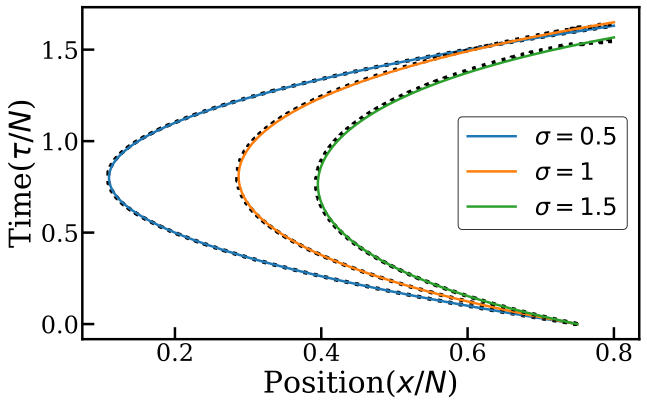

In [49]:
# FOR 799 PRESENTATION

import numpy as np 
import matplotlib.pyplot as plt
from scipy.linalg import expm
from scipy.integrate import solve_ivp

###############################################################################
# SSH Time Evolution (2D data only) - Now post-processes to stop at x=0.9
###############################################################################
def build_ssh_hamiltonian(N, v, w, sigma):
    H = np.zeros((N, N), dtype=complex)
    for i in range(N-1):
        v_i = v * ((i+1)/(N-1))**sigma
        w_i = w * ((i+1)/(N-1))**sigma
        if i % 2 == 0:
            H[i, i+1] = -v_i
            H[i+1, i] = -v_i
        else:
            H[i, i+1] = -w_i
            H[i+1, i] = -w_i
    return H

def gaussian_wave_packet(N, n0, p0, omega):
    n = np.arange(N)
    psi = (np.pi*omega**2)**(-0.25)*np.exp(-0.5*((n-n0)/omega)**2) * np.exp(1j*p0*n)
    psi /= np.linalg.norm(psi)
    return psi

def run_ssh_2d(N, v, w, sigma, n0, p0, omega, dt, T):
    """
    Evolves an initial Gaussian wavepacket under the SSH Hamiltonian.
    Returns the rescaled peak positions (x/N) and rescaled times (t/N),
    but only up to x = 0.9. If the simulation overshoots 0.9, linear
    interpolation is used to generate a final point exactly at x = 0.9.
    """
    H_SSH = build_ssh_hamiltonian(N, v, w, sigma)
    U = expm(-1j * H_SSH * dt)
    psi = gaussian_wave_packet(N, n0, p0, omega)
    t_steps = int(np.round(T/dt))
    
    rescaled_positions = []
    rescaled_times = []
    # Record initial condition:
    peak_index = np.argmax(np.abs(psi))
    rescaled_positions.append(peak_index / N)
    rescaled_times.append(0)
    
    for step in range(1, t_steps+1):
        psi = U @ psi
        psi_abs = np.abs(psi)
        peak_index = np.argmax(psi_abs)
        current_position = peak_index / N
        current_time = step * dt / N
        rescaled_positions.append(current_position)
        rescaled_times.append(current_time)
    
    # Convert to numpy arrays for post-processing
    rescaled_positions = np.array(rescaled_positions)
    rescaled_times = np.array(rescaled_times)
    
    # Find the first index where the position reaches or exceeds 0.8
    idx = np.where(rescaled_positions >= 0.8)[0]
    if len(idx) > 0:
        first_idx = idx[0]
        # If 0.8 is reached exactly at first_idx, no interpolation is needed.
        if np.isclose(rescaled_positions[first_idx], 0.8):
            new_positions = rescaled_positions[:first_idx+1]
            new_times = rescaled_times[:first_idx+1]
        else:
            # Interpolate between the last point below 0.8 and the first point above 0.8.
            pos1 = rescaled_positions[first_idx - 1]
            pos2 = rescaled_positions[first_idx]
            t1 = rescaled_times[first_idx - 1]
            t2 = rescaled_times[first_idx]
            fraction = (0.8 - pos1) / (pos2 - pos1)
            interp_time = t1 + fraction * (t2 - t1)
            new_positions = np.concatenate((rescaled_positions[:first_idx], [0.8]))
            new_times = np.concatenate((rescaled_times[:first_idx], [interp_time]))
        return new_positions, new_times
    else:
        return rescaled_positions, rescaled_times

###############################################################################
# Modified SSH Model using ODE integration (Semiclassical)
###############################################################################
# Parameters
v_mod     = 1      
w_mod     = 1     
# remove the old sigma_mod definition
x0        = 0.75   # Starting at 0.75 so that evolution reaches 0.8.
epsilon   = 1e-6       
# fix a single p0 value
p0_mod    = -0.75*np.pi/2

# define the sigma values to sweep
sigma_values = [0.5, 1, 1.5]

def t1_mod(x):
    return v_mod * (x**sigma_mod)
def t2_mod(x):
    return w_mod * (x**sigma_mod)
def dt1_dx_mod(x):
    return v_mod * sigma_mod * (x**(sigma_mod - 1.0))
def dt2_dx_mod(x):
    return w_mod * sigma_mod * (x**(sigma_mod - 1.0))

def modified_ssh_odes(t, y):
    x, p = y
    t1_val = t1_mod(x)
    t2_val = t2_mod(x)
    dt1_val = dt1_dx_mod(x)
    dt2_val = dt2_dx_mod(x)
    denom = np.sqrt(t1_val**2 + t2_val**2 + 2*t1_val*t2_val*np.cos(2*p))
    dxdt = 2*(t1_val*t2_val*np.sin(2*p)) / denom
    ddx = (t1_val*dt1_val + t2_val*dt2_val + np.cos(2*p)*(dt1_val*t2_val + t1_val*dt2_val)) / denom
    dpdt = ddx
    return [dxdt, dpdt]

# Event function for ODE integration: stop when x reaches 0.8 (ignoring t=0)
def event_x90(t, y):
    if t < 1e-6:
        return 1
    return y[0] - 0.8
event_x90.terminal = True
event_x90.direction = 1

###############################################################################
# Combined Plot: Numerical vs. Semiclassical for various sigma values
###############################################################################
plt.figure(figsize=(10,6))

for sigma_mod in sigma_values:
    # Semiclassical ODE
    t_span = (0, 2.5)   # set a sufficiently long time span
    y0 = [x0, p0_mod]
    sol = solve_ivp(modified_ssh_odes, t_span, y0, events=event_x90, dense_output=True, max_step=0.001)
    t_vals = sol.t
    x_vals = sol.y[0]
    t_vals_mod = t_vals   
    
    # Numerical SSH
    N = 1000
    v = v_mod
    w = w_mod
    n0 = x0 * N
    omega = 25
    dt = 1
    T = 2500
    ssh_positions, ssh_times = run_ssh_2d(N, v, w, sigma_mod, n0, p0_mod, omega, dt, T)
    
    # simple labeling by sigma
    label = rf"$\sigma={sigma_mod}$"
    
    plt.plot(ssh_positions, ssh_times, linestyle=':', color='black', linewidth=4)
    plt.plot(x_vals, t_vals_mod, linestyle='-', label=label)

plt.xlabel("Position($x/N$)", fontsize=30)
plt.ylabel("Time($\\tau /N$)", fontsize=30)
plt.legend(fontsize=24)
plt.show()


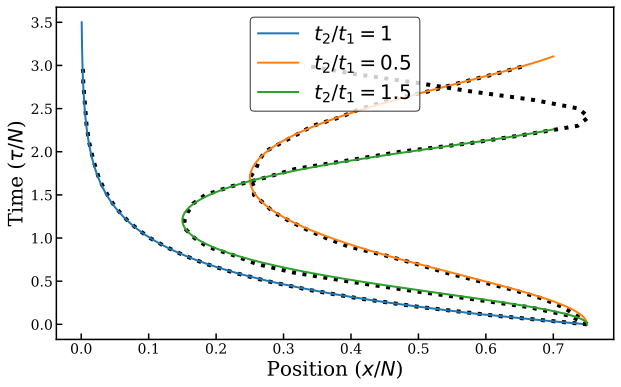

In [297]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.linalg import expm
from scipy.integrate import solve_ivp

###############################################################################
# SSH Time Evolution (2D data only) - Now post-processes to stop at x=0.8
###############################################################################
def build_ssh_hamiltonian(N, v, w, sigma):
    H = np.zeros((N, N), dtype=complex)
    for i in range(N-1):
        v_i = v * ((i+1)/(N-1))**sigma
        w_i = w * ((i+1)/(N-1))**sigma
        if i % 2 == 0:
            H[i, i+1] = -v_i
            H[i+1, i] = -v_i
        else:
            H[i, i+1] = -w_i
            H[i+1, i] = -w_i
    return H

def gaussian_wave_packet(N, n0, p0, omega):
    n = np.arange(N)
    psi = np.exp(-0.5*((n-n0)/omega)**2) * np.exp(1j*p0*n)
    psi /= np.linalg.norm(psi)
    return psi

def run_ssh_2d(N, v, w, sigma, n0, p0, omega, dt, T):
    """
    Evolves an initial Gaussian wavepacket under the SSH Hamiltonian.
    Returns the rescaled peak positions (x/N) and rescaled times (t/N),
    but only up to x = 0.8. If the simulation overshoots 0.8, linear
    interpolation is used to generate a final point exactly at x = 0.8.
    """
    H_SSH = build_ssh_hamiltonian(N, v, w, sigma)
    U = expm(-1j * H_SSH * dt)
    psi = gaussian_wave_packet(N, n0, p0, omega)
    t_steps = int(np.round(T/dt))
    
    rescaled_positions = []
    rescaled_times = []
    # Record initial condition:
    peak_index = np.argmax(np.abs(psi))
    rescaled_positions.append(peak_index / N)
    rescaled_times.append(0)
    
    for step in range(1, t_steps+1):
        psi = U @ psi
        psi_abs = np.abs(psi)
        peak_index = np.argmax(psi_abs)
        current_position = peak_index / N
        current_time = step * dt / N
        rescaled_positions.append(current_position)
        rescaled_times.append(current_time)
    
    # Convert to numpy arrays for post-processing
    rescaled_positions = np.array(rescaled_positions)
    rescaled_times = np.array(rescaled_times)
    
    # Find the first index where the position reaches or exceeds 0.8
    idx = np.where(rescaled_positions >= 0.76)[0]
    if len(idx) > 0:
        first_idx = idx[0]
        if np.isclose(rescaled_positions[first_idx], 0.76):
            new_positions = rescaled_positions[:first_idx+1]
            new_times = rescaled_times[:first_idx+1]
        else:
            pos1 = rescaled_positions[first_idx - 1]
            pos2 = rescaled_positions[first_idx]
            t1 = rescaled_times[first_idx - 1]
            t2 = rescaled_times[first_idx]
            fraction = (0.76 - pos1) / (pos2 - pos1)
            interp_time = t1 + fraction * (t2 - t1)
            new_positions = np.concatenate((rescaled_positions[:first_idx], [0.76]))
            new_times = np.concatenate((rescaled_times[:first_idx], [interp_time]))
        return new_positions, new_times
    else:
        return rescaled_positions, rescaled_times

###############################################################################
# Modified SSH Model using ODE integration (Semiclassical)
###############################################################################
# Fixed parameters:
v_mod     = 1      
sigma_mod = 1.0       
x0        = 0.75   # Starting value for x
epsilon   = 1e-8       
p0_fixed  = -np.pi/2 +epsilon # Fixed p₀ = –π/2

# Note: We now loop over different w_mod values.
w_mod_values = [1, 0.5, 1.5]

def t1_mod(x):
    return v_mod * (x**sigma_mod)
def t2_mod(x):
    return w_mod * (x**sigma_mod)
def dt1_dx_mod(x):
    return v_mod * sigma_mod * (x**(sigma_mod - 1.0))
def dt2_dx_mod(x):
    return w_mod * sigma_mod * (x**(sigma_mod - 1.0))

def modified_ssh_odes(t, y):
    x, p = y
    t1_val = t1_mod(x)
    t2_val = t2_mod(x)
    dt1_val = dt1_dx_mod(x)
    dt2_val = dt2_dx_mod(x)
    denom = np.sqrt(t1_val**2 + t2_val**2 + 2*t1_val*t2_val*np.cos(2*p))
    dxdt = (t1_val*t2_val*np.sin(2*p)) / denom
    ddx = (t1_val*dt1_val + t2_val*dt2_val + np.cos(2*p)*(dt1_val*t2_val + t1_val*dt2_val)) / denom
    dpdt = 0.5 * ddx
    return [dxdt, dpdt]

# Event function for ODE integration: stop when x reaches 0.8 (ignoring t=0)
def event_x80(t, y):
    if t < 1e-6:
        return 1
    return y[0] - 0.7
event_x80.terminal = True
event_x80.direction = 1

###############################################################################
# Combined Plot: Numerical vs. Semiclassical for different w_mod values
###############################################################################
plt.figure(figsize=(10,6))

for w_val in w_mod_values:
    w_mod = w_val  # update global w_mod for functions that use it
    
    t_span = (0, 7)   # set a sufficiently long time span
    
    # Run ODE integration (Semiclassical) with event function to stop at x = 0.8
    y0 = [x0, p0_fixed]
    sol = solve_ivp(modified_ssh_odes, t_span, y0, events=event_x80, dense_output=True, max_step=0.001)
    t_vals = sol.t
    x_vals = sol.y[0]
    t_vals_mod = t_vals / 2   # Modified time values (divided by 2)
    
    # Run SSH simulation (Numerical) – post-processed to end exactly at x = 0.8
    N = 1000
    v = v_mod
    sigma = sigma_mod
    n0 = x0 * N
    p0_ssh = p0_fixed
    omega = 25
    dt = 100
    T = 3000   # Large enough T to ensure reaching x = 0.8
    ssh_positions, ssh_times = run_ssh_2d(N, v, w_mod, sigma, n0, p0_ssh, omega, dt, T)
    
    # Plot each curve with a label indicating the current w_mod value.
    plt.plot(ssh_positions, ssh_times, linestyle=':', color='black', linewidth=4)
    plt.plot(x_vals, t_vals_mod, linestyle='-', linewidth=2, 
           label=r"$t_2/t_1=%s$" % w_val)


plt.xlabel("Position ($x/N$)", fontsize=20)
plt.ylabel("Time ($\\tau /N$)", fontsize=20)
plt.legend(fontsize=20)
plt.show()


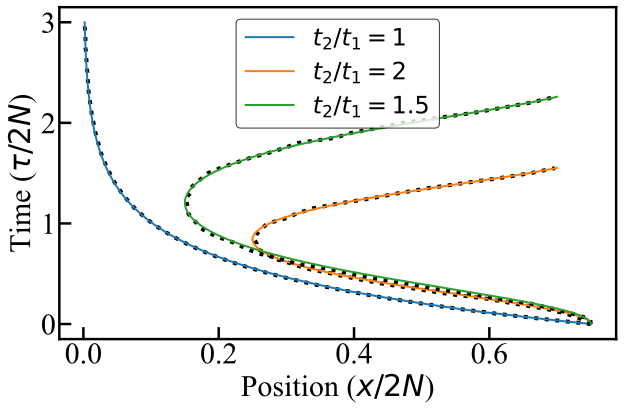

In [112]:
#Semi vs num for diff Ratio 
import numpy as np 
import matplotlib.pyplot as plt
from scipy.linalg import expm
from scipy.integrate import solve_ivp

###############################################################################
# SSH Time Evolution (2D data only) - Now post-processes to stop at x=0.8
###############################################################################
def build_ssh_hamiltonian(N, v, w, sigma):
    H = np.zeros((N, N), dtype=complex)
    for i in range(N-1):
        v_i = v * ((i+1)/(N-1))**sigma
        w_i = w * ((i+1)/(N-1))**sigma
        if i % 2 == 0:
            H[i, i+1] = -v_i
            H[i+1, i] = -v_i
        else:
            H[i, i+1] = -w_i
            H[i+1, i] = -w_i
    return H

def gaussian_wave_packet(N, n0, p0, omega):
    n = np.arange(N)
    #psi = np.exp(-0.5*((n-n0)/omega)**2) * np.exp(1j*p0*n)
    psi = (np.pi*omega**2)**(-0.25)*np.exp(-0.5*((n-n0)/omega)**2) * np.exp(1j*p0*n)
    psi /= np.linalg.norm(psi)
    return psi

def run_ssh_2d(N, v, w, sigma, n0, p0, omega, dt, T):
    """
    Evolves an initial Gaussian wavepacket under the SSH Hamiltonian.
    Returns the rescaled peak positions (x/N) and rescaled times (t/N),
    but only up to x = 0.8. If the simulation overshoots 0.8, linear
    interpolation is used to generate a final point exactly at x = 0.8.
    """
    H_SSH = build_ssh_hamiltonian(N, v, w, sigma)
    U = expm(-1j * H_SSH * dt)
    psi = gaussian_wave_packet(N, n0, p0, omega)
    t_steps = int(np.round(T/dt))
    
    rescaled_positions = []
    rescaled_times = []
    # Record initial condition:
    peak_index = np.argmax(np.abs(psi))
    rescaled_positions.append(peak_index / N)
    rescaled_times.append(0)
    
    for step in range(1, t_steps+1):
        psi = U @ psi
        psi_abs = np.abs(psi)
        peak_index = np.argmax(psi_abs)
        current_position = peak_index / N
        current_time = step * dt / N
        rescaled_positions.append(current_position)
        rescaled_times.append(current_time)
    
    # Convert to numpy arrays for post-processing
    rescaled_positions = np.array(rescaled_positions)
    rescaled_times = np.array(rescaled_times)
    
    # Find the first index where the position reaches or exceeds 0.8
    idx = np.where(rescaled_positions >= 0.76)[0]
    if len(idx) > 0:
        first_idx = idx[0]
        if np.isclose(rescaled_positions[first_idx], 0.76):
            new_positions = rescaled_positions[:first_idx+1]
            new_times = rescaled_times[:first_idx+1]
        else:
            pos1 = rescaled_positions[first_idx - 1]
            pos2 = rescaled_positions[first_idx]
            t1 = rescaled_times[first_idx - 1]
            t2 = rescaled_times[first_idx]
            fraction = (0.76 - pos1) / (pos2 - pos1)
            interp_time = t1 + fraction * (t2 - t1)
            new_positions = np.concatenate((rescaled_positions[:first_idx], [0.76]))
            new_times = np.concatenate((rescaled_times[:first_idx], [interp_time]))
        return new_positions, new_times
    else:
        return rescaled_positions, rescaled_times

###############################################################################
# Modified SSH Model using ODE integration (Semiclassical)
###############################################################################
# Fixed parameters:
v_mod     = 1      
sigma_mod = 1.0       
x0        = 0.75   # Starting value for x
epsilon   = 1e-8       
p0_fixed  = -np.pi/2 + epsilon  # Fixed p₀ = –π/2

# Note: We now loop over different w_mod values.
w_mod_values = [1, 2, 1.5]

def t1_mod(x):
    return v_mod * (x**sigma_mod)
def t2_mod(x):
    return w_mod * (x**sigma_mod)
def dt1_dx_mod(x):
    return v_mod * sigma_mod * (x**(sigma_mod - 1.0))
def dt2_dx_mod(x):
    return w_mod * sigma_mod * (x**(sigma_mod - 1.0))

def modified_ssh_odes(t, y):
    x, p = y
    t1_val = t1_mod(x)
    t2_val = t2_mod(x)
    dt1_val = dt1_dx_mod(x)
    dt2_val = dt2_dx_mod(x)
    denom = np.sqrt(t1_val**2 + t2_val**2 + 2*t1_val*t2_val*np.cos(2*p))
    dxdt = 2*(t1_val*t2_val*np.sin(2*p)) / denom
    ddx = (t1_val*dt1_val + t2_val*dt2_val + np.cos(2*p)*(dt1_val*t2_val + t1_val*dt2_val)) / denom
    dpdt = ddx
    return [dxdt, dpdt]

# Event function for ODE integration: stop when x reaches 0.8 (ignoring t=0)
def event_x80(t, y):
    if t < 1e-6:
        return 1
    return y[0] - 0.7
event_x80.terminal = True
event_x80.direction = 1

###############################################################################
# Combined Plot: Numerical vs. Semiclassical for different w_mod values
###############################################################################
plt.figure(figsize=(10,6))

for w_val in w_mod_values:
    w_mod = w_val  # update global w_mod for functions that use it
    
    t_span = (0, 3)   # set a sufficiently long time span
    
    # Run ODE integration (Semiclassical) with event function to stop at x = 0.8
    y0 = [x0, p0_fixed]
    sol = solve_ivp(modified_ssh_odes, t_span, y0, events=event_x80, dense_output=True, max_step=0.001)
    t_vals = sol.t
    x_vals = sol.y[0]
    t_vals_mod = t_vals  # Modified time values (divided by 2)
    
    # Set T based on w_mod value: use T=2100 only for w_mod=1.5, else T=3000.
    if w_val == 1.5:
        T_value = 2250
    elif w_val == 2:
        T_value = 1550
    else:
        T_value = 3000
  
    
    # Run SSH simulation (Numerical) – post-processed to end exactly at x = 0.8
    N = 1000
    v = v_mod
    sigma = sigma_mod
    n0 = x0 * N
    p0_ssh = p0_fixed
    omega = 25
    dt = 50
    T = T_value   # Use the conditional T value here
    ssh_positions, ssh_times = run_ssh_2d(N, v, w_mod, sigma, n0, p0_ssh, omega, dt, T)
    
    # Plot each curve with a label indicating the current w_mod value.
    plt.plot(ssh_positions, ssh_times, linestyle='dotted', color='black', linewidth=4)
    plt.plot(x_vals, t_vals_mod, linestyle='-', linewidth=2, 
           label=r"$t_2/t_1=%s$" % w_val)

plt.xlabel("Position ($x/2N$)", fontsize=30)
plt.ylabel("Time ($\\tau /2N$)", fontsize=30)
plt.legend(fontsize=24)
plt.show()


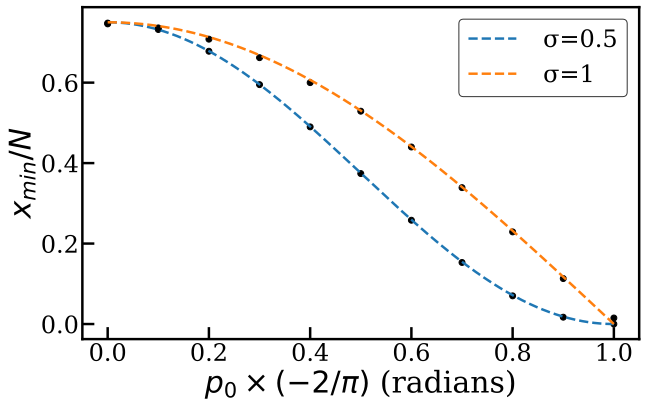

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import expm

###############################################################################
#                           SSH TIME EVOLUTION CODE                           #
###############################################################################
def build_ssh_hamiltonian(N, v, w, sigma):
    H = np.zeros((N, N), dtype=complex)
    for i in range(N-1):
        v_i = v * ((i + 1) / (N-1))**sigma
        w_i = w * ((i + 1) / (N-1))**sigma
        if i % 2 == 0:
            H[i, i+1] = -v_i
            H[i+1, i] = -v_i
        else:
            H[i, i+1] = -w_i
            H[i+1, i] = -w_i
    return H

def gaussian_wave_packet(N, n0, p0, omega):
    n = np.arange(N)
    psi = np.exp(-0.5*((n - n0)/omega)**2) * np.exp(1j*p0*n)
    psi /= np.linalg.norm(psi)
    return psi

def simulate_turning_point(w, N, v, sigma, n0, p0, omega, dt, T):
    """
    Run the time evolution for the SSH Hamiltonian with the given parameters.
    Return the turning point (i.e. the minimum rescaled peak position) and its time.
    """
    H_SSH = build_ssh_hamiltonian(N, v, w, sigma)
    U = expm(-1j * H_SSH * dt)
    psi = gaussian_wave_packet(N, n0, p0, omega)
    t_steps = int(np.round(T / dt))
    
    psi_t = [np.abs(psi.copy())]
    for step in range(t_steps):
        psi = U @ psi
        psi_t.append(np.abs(psi))
    
    rescaled_positions = []
    rescaled_times = []
    for step, psi_abs in enumerate(psi_t):
        peak_index = np.argmax(psi_abs)
        t_val = step * dt
        rescaled_times.append(t_val / N)
        rescaled_positions.append(peak_index / N)
    
    turning_index = np.argmin(rescaled_positions)
    turning_time = rescaled_times[turning_index]
    turning_pos = rescaled_positions[turning_index]
    return turning_time, turning_pos

###############################################################################
#                  ANALYTICAL TURNING POINT FORMULA                          #
###############################################################################
def analytic_turning_point(N, n0, sigma, v, w, p0):
    """
    Compute the analytical turning point.
    For example, using the formula:
    
      x_min = (n0/N) * sqrt( cos(p0)^(2/sigma) + ((w/v - 1)/(w/v + 1))^(2/sigma) )
      
    (This formula is heuristic; adjust as needed.)
    """
    term1 = np.cos(p0)**(1)
    term2 = ((w/v - 1) / (w/v + 1))**(1)
    term3 = np.cos(p0)**(1) * ((w/v - 1) / (w/v + 1))**(1)
    #return (n0 / N) * (term1**2 + term2**2 - term3**2)**(1/(2*sigma))
    return (n0 / N) *((v**2+w**2+2*v*w*np.cos(2*p0))/(v+w)**2)**(1/(2*sigma))

###############################################################################
#                          MAIN COMPARISON CODE                             #
###############################################################################
if __name__ == "__main__":
    # Fixed parameters for SSH simulation
    N = 1000         # number of lattice sites
    v = 1            # hopping parameter v (fixed)
    w = 1          # hopping parameter w (fixed)
    n0 = 750         # center of Gaussian (in lattice units)
    omega = 25       # width of Gaussian
    dt = 1           # time step

    # Define p0 values for simulation and analytical curves:
    p0_list_SSH = np.linspace(0, -np.pi/2, 11)
    x_list_SSH = p0_list_SSH * (-2/np.pi)
    p0_list = np.linspace(0, -np.pi/2, 1001)
    x_list = p0_list * (-2/np.pi)
    
    # Sigmas to loop over
    sigmas = [0.5, 1]

    plt.figure(figsize=(10, 6))
    
    for sigma in sigmas:
        sim_turning_points = []
        analytic_turning_points = []
        
        # Loop over p0 values for the simulation turning points.
        # Here T is computed as in the original code: T = 1000*p0*(-2/np.pi) + 400.
        for p0 in p0_list_SSH:
            T_val = 1000 * p0 * (-2/np.pi) + 1000
            _, turning_pos_sim = simulate_turning_point(w, N, v, sigma, n0, p0, omega, dt, T_val)
            sim_turning_points.append(turning_pos_sim)
        
        # Compute analytical turning points for a denser set of p0 values.
        for p0 in p0_list:
            turning_pos_analytic = analytic_turning_point(N, n0, sigma, v, w, p0)
            analytic_turning_points.append(turning_pos_analytic)
        
        # Plot numerical turning points as black circles (without legend)
        plt.plot(x_list_SSH, sim_turning_points, 'o', markersize=6, color="black")
        # Plot analytical turning points as dashed lines with a legend
        plt.plot(x_list, analytic_turning_points, '--', markersize=8, label=f" σ={sigma}")
    
    plt.xlabel("$p_0 \\times (-2/\\pi)$ (radians)", fontsize=30)
    plt.ylabel("$x_{min}/N$", fontsize=30)
    plt.legend(fontsize=24)
    plt.show()


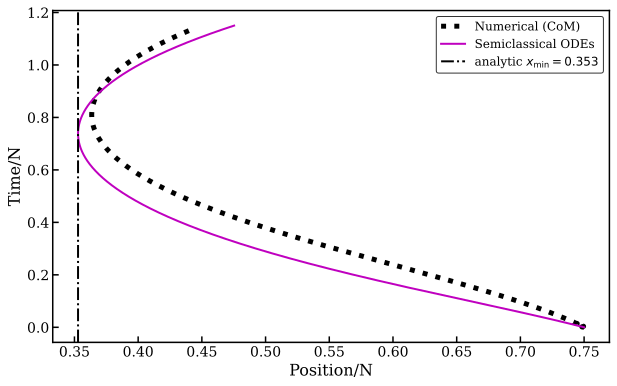

In [351]:
#CENTRE OF MASS OF WAVE PACKET
import numpy as np 
import matplotlib.pyplot as plt
from scipy.linalg import expm
from scipy.integrate import solve_ivp

###############################################################################
# SSH Time Evolution (2D data only)
###############################################################################
def build_ssh_hamiltonian(N, v, w, sigma):
    H = np.zeros((N, N), dtype=complex)
    for i in range(N-1):
        v_i = v * ((i+1)/(N-1))**sigma
        w_i = w * ((i+1)/(N-1))**sigma
        if i % 2 == 0:
            H[i, i+1] = -v_i
            H[i+1, i] = -v_i
        else:
            H[i, i+1] = -w_i
            H[i+1, i] = -w_i
    return H

def gaussian_wave_packet(N, n0, p0, omega):
    n = np.arange(N)
    psi = np.exp(-0.5*((n-n0)/omega)**2) * np.exp(1j*p0*n)
    psi /= np.linalg.norm(psi)
    return psi

def run_ssh_2d(N, v, w, sigma, n0, p0, omega, dt, T):
    """
    Evolves an initial Gaussian wavepacket under the SSH Hamiltonian.
    Instead of plotting internally, this function returns the 2D data:
    the rescaled *center of mass* positions (x/N) and rescaled times (t/N).
    """
    H_SSH = build_ssh_hamiltonian(N, v, w, sigma)
    U = expm(-1j * H_SSH * dt)
    psi = gaussian_wave_packet(N, n0, p0, omega)
    t_steps = int(np.round(T/dt))
    
    psi_t = [psi.copy()]  # store wavefunction (complex)
    
    for step in range(t_steps):
        psi = U @ psi
        psi_t.append(psi.copy())
        
    rescaled_positions = []
    rescaled_times = []
    
    for step, psi_cplx in enumerate(psi_t):
        psi_abs = np.abs(psi_cplx)
        
        # (CHANGED HERE!) Instead of np.argmax(psi_abs), compute the center of mass:
        n_array = np.arange(len(psi_abs))
        prob = psi_abs**2
        total_prob = np.sum(prob)
        if total_prob < 1e-15:
            # if the wavefunction is nearly empty, fallback to 0
            com_index = 0.0
        else:
            com_index = np.sum(n_array * prob) / total_prob
        
        t_val = step * dt
        # Store center of mass (com_index / N) as the "position"
        rescaled_positions.append(com_index / N)
        rescaled_times.append(t_val / N)
        
    return np.array(rescaled_positions), np.array(rescaled_times)

###############################################################################
# Modified SSH Model using ODE integration
###############################################################################
# Parameters
v_mod     = 1.0       
w_mod     = 1.8       
sigma_mod = 1.5      
x0        = .75 
epsilon = 1e-8      
p0_mod    = -0.9* np.pi/2
t_span    = (0, p0_mod*(-4/np.pi)+0.5)   
max_step  = 0.001  

def t1_mod(x):
    return v_mod * (x**sigma_mod)
def t2_mod(x):
    return w_mod * (x**sigma_mod)
def dt1_dx_mod(x):
    return v_mod * sigma_mod * (x**(sigma_mod - 1.0))
def dt2_dx_mod(x):
    return w_mod * sigma_mod * (x**(sigma_mod - 1.0))

def modified_ssh_odes(t, y):
    x, p = y
    t1_val = t1_mod(x)
    t2_val = t2_mod(x)
    dt1_val = dt1_dx_mod(x)
    dt2_val = dt2_dx_mod(x)
    denom= np.sqrt(t1_val**2 + t2_val**2 + 2*t1_val*t2_val*np.cos(2*p))
    dxdt = (t1_val*t2_val*np.sin(2*p)) / denom
    ddx = (t1_val*dt1_val + t2_val*dt2_val + np.cos(2*p)*(dt1_val*t2_val + t1_val*dt2_val)) / denom
    dpdt = 0.5 * ddx
    return [dxdt, dpdt]

from scipy.integrate import solve_ivp
y0 = [x0, p0_mod]
sol = solve_ivp(modified_ssh_odes, t_span, y0, dense_output=True, max_step=max_step)
t_vals = sol.t       
x_vals = sol.y[0]
t_vals_mod = t_vals / 2   

###############################################################################
# Run the SSH simulation to get 2D data (Now using CoM)
###############################################################################
N = 1000
v = v_mod
w = w_mod
sigma = sigma_mod
n0 = x0*N
p0_ssh = p0_mod
omega = 50
dt = 0.1
T = N*p0_mod*(-2/np.pi)+240

ssh_positions, ssh_times = run_ssh_2d(N, v, w, sigma, n0, p0_ssh, omega, dt, T)

#ANALYTICAL TURNING POINT (example)
x_min_analytic = x0 * (np.sqrt(v_mod**2 + w_mod**2 + 2*v_mod*w_mod*np.cos(2*p0_mod)) / (v_mod + w_mod))**(1/sigma_mod)
x_min_analytic_label = fr"analytic $ x_{{\mathrm{{min}}}} = {x_min_analytic:.3f}$"

###############################################################################
# Combined Plot: 2D Comparison (Time vs. Position)
###############################################################################
plt.figure(figsize=(10,6))
plt.plot(ssh_positions, ssh_times, 'k:', linewidth=5, label="Numerical (CoM)")

plt.plot(x_vals, t_vals_mod, 'm-', label="Semiclassical ODEs")

plt.axvline(x=x_min_analytic, color='black', linestyle='dashdot', label=x_min_analytic_label)

plt.xlabel("Position/N", fontsize= 16)
plt.ylabel("Time/N", fontsize= 16)
plt.legend(fontsize=12)
plt.show()


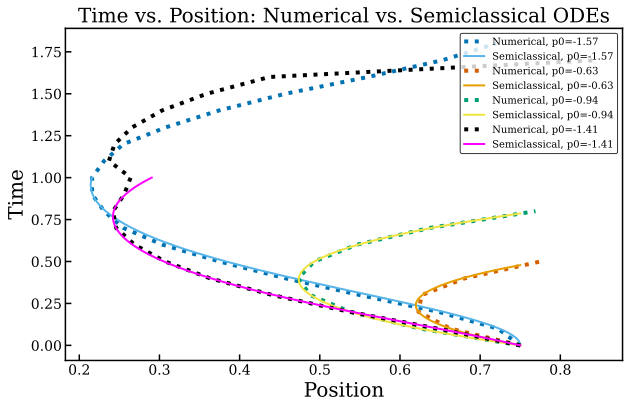

In [93]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.linalg import expm
from scipy.integrate import solve_ivp

###############################################################################
# SSH Time Evolution (2D data only)
###############################################################################
def build_ssh_hamiltonian(N, v, w, sigma):
    H = np.zeros((N, N), dtype=complex)
    for i in range(N-1):
        v_i = v * ((i+1)/(N-1))**sigma
        w_i = w * ((i+1)/(N-1))**sigma
        if i % 2 == 0:
            H[i, i+1] = -v_i
            H[i+1, i] = -v_i
        else:
            H[i, i+1] = -w_i
            H[i+1, i] = -w_i
    return H

def gaussian_wave_packet(N, n0, p0, omega):
    n = np.arange(N)
    psi = np.exp(-0.5*((n-n0)/omega)**2) * np.exp(1j*p0*n)
    psi /= np.linalg.norm(psi)
    return psi

def run_ssh_2d(N, v, w, sigma, n0, p0, omega, dt, T):
    """
    Evolves an initial Gaussian wavepacket under the SSH Hamiltonian.
    Returns the 2D data: the rescaled peak positions (x/N) and rescaled times (t/N).
    Stops immediately once the computed peak position reaches 0.75.
    """
    H_SSH = build_ssh_hamiltonian(N, v, w, sigma)
    U = expm(-1j * H_SSH * dt)
    psi = gaussian_wave_packet(N, n0, p0, omega)
    t_steps = int(np.round(T/dt))
    
    rescaled_positions = []
    rescaled_times = []
    # Record initial condition:
    peak_index = np.argmax(np.abs(psi))
    rescaled_positions.append(peak_index / N)
    rescaled_times.append(0)
    
    for step in range(1, t_steps+1):
        psi = U @ psi
        psi_abs = np.abs(psi)
        peak_index = np.argmax(psi_abs)
        current_position = peak_index / N
        rescaled_positions.append(current_position)
        rescaled_times.append(step * dt / N)
        if current_position >= 0.75:
            break
        
    return np.array(rescaled_positions), np.array(rescaled_times)

###############################################################################
# Modified SSH Model using ODE integration
###############################################################################
# Parameters
v_mod     = 1.0       
w_mod     = 1.8       
sigma_mod = 1.0       
x0        = 0.75 
epsilon   = 1e-8      

# p0_mod will be varied:
p0_values = [-np.pi/2+epsilon, -0.4*np.pi/2, -0.6*np.pi/2,  -0.9*np.pi/2]

def t1_mod(x):
    return v_mod * (x**sigma_mod)
def t2_mod(x):
    return w_mod * (x**sigma_mod)
def dt1_dx_mod(x):
    return v_mod * sigma_mod * (x**(sigma_mod - 1.0))
def dt2_dx_mod(x):
    return w_mod * sigma_mod * (x**(sigma_mod - 1.0))

def modified_ssh_odes(t, y):
    x, p = y
    t1_val = t1_mod(x)
    t2_val = t2_mod(x)
    dt1_val = dt1_dx_mod(x)
    dt2_val = dt2_dx_mod(x)
    denom = np.sqrt(t1_val**2 + t2_val**2 + 2*t1_val*t2_val*np.cos(2*p))
    dxdt = (t1_val*t2_val*np.sin(2*p)) / denom
    ddx = (t1_val*dt1_val + t2_val*dt2_val + np.cos(2*p)*(dt1_val*t2_val + t1_val*dt2_val)) / denom
    dpdt = 0.5 * ddx
    return [dxdt, dpdt]

# Event function for ODE integration: stop when x reaches 0.75 (ignore t=0)
def event_x75(t, y):
    if t < 1e-6:
        return 1
    return y[0] - 0.75
event_x75.terminal = True
event_x75.direction = 1

###############################################################################
# Combined Plot: Numerical vs. Semiclassical for various p0_mod values
###############################################################################
plt.figure(figsize=(10,6))

for p0_mod in p0_values:
    t_span = (0, 2.0)   # set a sufficiently long time span
    
    # Run ODE integration (Semiclassical) with event function to stop at x = 0.75
    y0 = [x0, p0_mod]
    sol = solve_ivp(modified_ssh_odes, t_span, y0, events=event_x75, dense_output=True, max_step=0.001)
    t_vals = sol.t
    x_vals = sol.y[0]
    t_vals_mod = t_vals / 2   # Modified time values (divided by 2)
    
    # Run SSH simulation (Numerical) – now it stops as soon as peak reaches x = 0.75
    N = 1000
    v = v_mod
    w = w_mod
    sigma = sigma_mod
    n0 = x0 * N
    p0_ssh = p0_mod
    omega = 22
    dt = 100
    T = 1800   # Large enough T to ensure reaching x = 0.75
    ssh_positions, ssh_times = run_ssh_2d(N, v, w, sigma, n0, p0_ssh, omega, dt, T)
    
    # Set different colors for different p0_mod values
    if np.isclose(p0_mod, -np.pi/2, atol=1e-2):
        color_num = "#0072B2"      # deep blue
        color_semiclass = "#56B4E9" # light blue
    elif np.isclose(p0_mod, -0.4*np.pi/2, atol=1e-2):
        color_num = "#D55E00"       # vermillion
        color_semiclass = "#E69F00" # orange
    elif np.isclose(p0_mod, -0.6*np.pi/2, atol=1e-2):
        color_num = "#009E73"       # bluish green
        color_semiclass = "#F0E442" # yellow
    else:
        color_num = "black"
        color_semiclass = "magenta"
    
    # Plot numerical and semiclassical curves for this p0_mod value
    label_num = f"Numerical, p0={p0_mod:.2f}"
    label_semiclass = f"Semiclassical, p0={p0_mod:.2f}"
    plt.plot(ssh_positions, ssh_times, linestyle=':', color=color_num, linewidth=4, label=label_num)
    plt.plot(x_vals, t_vals_mod, linestyle='-', color=color_semiclass, label=label_semiclass)

plt.xlabel("Position", fontsize=20)
plt.ylabel("Time", fontsize=20)
plt.title("Time vs. Position: Numerical vs. Semiclassical ODEs", fontsize=20)
plt.legend(fontsize=10)
plt.show()


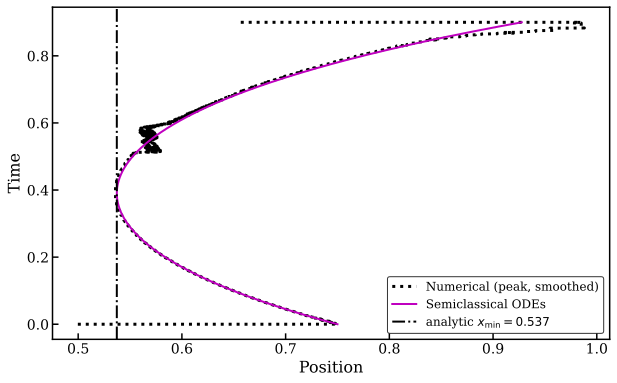

In [148]:
#MOVING AVERAGE
import numpy as np 
import matplotlib.pyplot as plt
from scipy.linalg import expm
from scipy.integrate import solve_ivp

###############################################################################
# SSH Time Evolution (2D data only)
###############################################################################
def build_ssh_hamiltonian(N, v, w, sigma):
    H = np.zeros((N, N), dtype=complex)
    for i in range(N-1):
        v_i = v * ((i+1)/(N-1))**sigma
        w_i = w * ((i+1)/(N-1))**sigma
        if i % 2 == 0:
            H[i, i+1] = -v_i
            H[i+1, i] = -v_i
        else:
            H[i, i+1] = -w_i
            H[i+1, i] = -w_i
    return H

def gaussian_wave_packet(N, n0, p0, omega):
    n = np.arange(N)
    psi = np.exp(-0.5*((n-n0)/omega)**2) * np.exp(1j*p0*n)
    psi /= np.linalg.norm(psi)
    return psi

def run_ssh_2d(N, v, w, sigma, n0, p0, omega, dt, T):
    """
    Evolves an initial Gaussian wavepacket under the SSH Hamiltonian.
    Returns the 2D arrays: rescaled_positions (peak_index/N) and rescaled_times (t/N).

    (We do a small rolling-average on the peak positions to smooth out single-step jumps.)
    """
    H_SSH = build_ssh_hamiltonian(N, v, w, sigma)
    U = expm(-1j * H_SSH * dt)
    psi = gaussian_wave_packet(N, n0, p0, omega)
    t_steps = int(np.round(T/dt))
    psi_t = [np.abs(psi.copy())]
    
    for step in range(t_steps):
        psi = U @ psi
        psi_t.append(np.abs(psi))
        
    rescaled_positions = []
    rescaled_times = []
    
    for step, psi_abs in enumerate(psi_t):
        # (unchanged) we find the single largest peak
        peak_index = np.argmax(psi_abs)
        t_val = step * dt
        rescaled_positions.append(peak_index / N)
        rescaled_times.append(t_val / N)
    
    # (ADDED) Rolling average to smooth out single-step jumps
    # We'll do a simple 3-point moving average, ignoring the edges in a simple way
    def rolling_average(data, window=50):
        # simple approach using np.convolve
        kernel = np.ones(window) / window
        smoothed = np.convolve(data, kernel, mode='same')
        return smoothed

    # Apply the smoothing
    smoothed_positions = rolling_average(rescaled_positions, window=3)
    
    # Return the smoothed curve but keep times the same
    return np.array(smoothed_positions), np.array(rescaled_times)


###############################################################################
# Modified SSH Model using ODE integration
###############################################################################
# (Below here we keep your code exactly as you had it, except we use the new run_ssh_2d.)
v_mod     = 1.0       
w_mod     = 1.45       
sigma_mod = 1.5       
x0        = .75 
epsilon = 1e-8      
p0_mod    = -0.6* np.pi/2 + epsilon 
t_span    = (0, p0_mod*(-4/np.pi)+0.6)   
max_step  = 0.001  

def t1_mod(x):
    return v_mod * (x**sigma_mod)
def t2_mod(x):
    return w_mod * (x**sigma_mod)
def dt1_dx_mod(x):
    return v_mod * sigma_mod * (x**(sigma_mod - 1.0))
def dt2_dx_mod(x):
    return w_mod * sigma_mod * (x**(sigma_mod - 1.0))

def modified_ssh_odes(t, y):
    x, p = y
    t1_val = t1_mod(x)
    t2_val = t2_mod(x)
    dt1_val = dt1_dx_mod(x)
    dt2_val = dt2_dx_mod(x)
    denom= np.sqrt(t1_val**2 + t2_val**2 + 2*t1_val*t2_val*np.cos(2*p))
    dxdt = (t1_val*t2_val*np.sin(2*p)) / denom
    ddx = (t1_val*dt1_val + t2_val*dt2_val + np.cos(2*p)*(dt1_val*t2_val + t1_val*dt2_val)) / denom
    dpdt = 0.5 * ddx
    return [dxdt, dpdt]

from scipy.integrate import solve_ivp
y0 = [x0, p0_mod]
sol = solve_ivp(modified_ssh_odes, t_span, y0, dense_output=True, max_step=max_step)
t_vals = sol.t       
x_vals = sol.y[0]
t_vals_mod = t_vals / 2   

###############################################################################
# Run the SSH simulation to get 2D data (with smoothing on the peak positions)
###############################################################################
N = 1000
v = v_mod
w = w_mod
sigma = sigma_mod
n0 = x0*N
p0_ssh = p0_mod
omega = 22
dt = 0.1
T = N*p0_mod*(-2/np.pi)+300

ssh_positions, ssh_times = run_ssh_2d(N, v, w, sigma, n0, p0_ssh, omega, dt, T)

#ANALYTICAL TURNING POINT (example)
x_min_analytic = x0 * (np.sqrt(v_mod**2 + w_mod**2 + 2*v_mod*w_mod*np.cos(2*p0_mod)) / (v_mod + w_mod))**(1/sigma_mod)
x_min_analytic_label = fr"analytic $ x_{{\mathrm{{min}}}} = {x_min_analytic:.3f}$"

###############################################################################
# Combined Plot: 2D Comparison (Time vs. Position)
###############################################################################
plt.figure(figsize=(10,6))
plt.plot(ssh_positions, ssh_times, 'k:', linewidth=3, label="Numerical (peak, smoothed)")

plt.plot(x_vals, t_vals_mod, 'm-', label="Semiclassical ODEs")

plt.axvline(x=x_min_analytic, color='black', linestyle='dashdot', label=x_min_analytic_label)

plt.xlabel("Position", fontsize=16)
plt.ylabel("Time", fontsize=16)
plt.legend(fontsize=12)
plt.show()


C:\Users\lenovo\AppData\Local\Temp\ipykernel_51036\1186475459.py:71: ComplexWarning: Casting complex values to real discards the imaginary part
  v_marker[i] = (v1[2 * i, 2 * i] + v1[2 * i + 1, 2 * i + 1] +


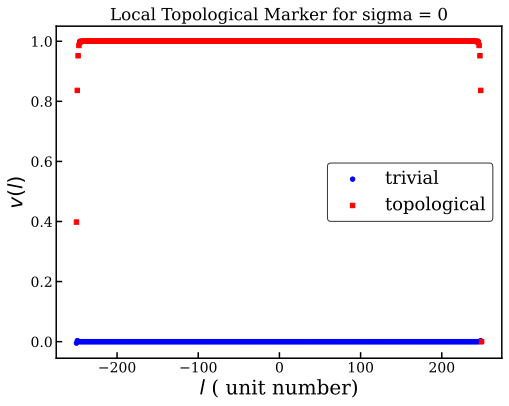

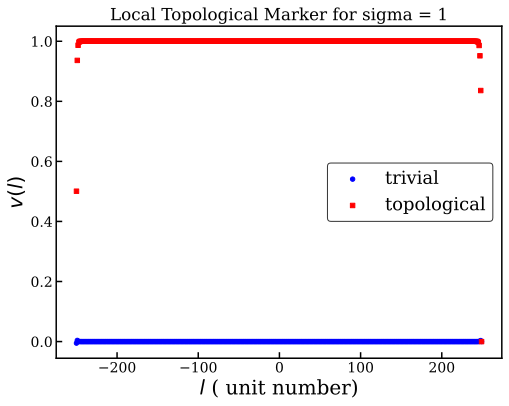

In [ ]:
#LOCAL TOPOLOGICAL MARKER

import numpy as np
import matplotlib.pyplot as plt

L = 1000

# Define the two sigma values and the two (v, w) combinations for each sigma.
sigma_values = [0, 1]
# For each sigma, we consider two sets: (v, w) = (1,0.5) and (v, w) = (0.5,1)
param_combos = [(1, 0.5), (0.5, 1)]
# Define marker styles and colors for the two curves
marker_styles = ['o', 's']
colors = ['blue', 'red']

for sigma_val in sigma_values:
    plt.figure(figsize=(8, 6))
    for idx, (v_hop, w_hop) in enumerate(param_combos):
        #--------------------------
        # --- Hamiltonian construction (unchanged) ---
        SHH = np.zeros((L, L), dtype=complex)
        for i in range(L - 1):
            v_i = v_hop * ((i + 1) / (L - 1))**sigma_val
            w_i = w_hop * ((i + 1) / (L - 1))**sigma_val
            if i % 2 == 0:
                SHH[i + 1, i] = v_i
                SHH[i, i + 1] = v_i
            else:
                SHH[i + 1, i] = w_i
                SHH[i, i + 1] = -w_i

        eigenvalues, eigenvectors = np.linalg.eigh(SHH)
    
        #--------------------------
        # --- Local topological marker calculation (unchanged) ---
        num_eigenvectors = len(eigenvalues)
        num_eigenvectors_half = num_eigenvectors // 2
        Um = np.column_stack(eigenvectors[:, :num_eigenvectors_half])
        Up = np.column_stack(eigenvectors[:, num_eigenvectors_half:])
        trans_Um = np.transpose(Um)
        trans_Up = np.transpose(Up)
        Pp = trans_Up @ Up
        Pm = trans_Um @ Um
        Q = Pp - Pm
        GA = np.zeros((L, L))
        GB = np.zeros((L, L))
        for i in range(len(eigenvalues)):
            if i % 2 == 0:
                GA[i, i] = 1
        for i in range(len(eigenvalues)):
            if i % 2 != 0:
                GB[i, i] = 1
        Qab = GA @ Q @ GB
        Qba = GB @ Q @ GA
        
        # Position operator X construction (unchanged)
        X = np.zeros((L, L))
        X[0, 0] = -L / 4
        for i in range(len(eigenvalues)):
            if i % 2 == 0:
                X[i, i] = -L / 4 + i / 2
                if i + 1 < L:
                    X[i + 1, i + 1] = X[i, i]
    
        # Calculate v1 and v2 as in the original code
        v1 = 0.5 * (Qba @ (X @ Qab - Qab @ X))
        v2 = 0.5 * (Qab @ (Qba @ X - X @ Qba))
        # Compute the local topological marker for half the lattice sites
        v_marker = np.zeros(int(L / 2))
        for i in range(int(L / 2) - 1):
            v_marker[i] = (v1[2 * i, 2 * i] + v1[2 * i + 1, 2 * i + 1] +
                           v2[2 * i, 2 * i] + v2[2 * i + 1, 2 * i + 1])
    
        #--------------------------
        # --- Plotting the marker as points ---
        # Determine label based on v_hop and w_hop
        label_type = "trivial" if v_hop > w_hop else "topological"
        #label_str = f"{label_type} (v={v_hop}, w={w_hop})"
    
        plt.scatter(l, v_marker, marker=marker_styles[idx],
                    s=20, color=colors[idx], label=label_type)
    
    #plt.title(f"Local Topological Marker for sigma = {sigma_val}")
    plt.xlabel("$l$ ( unit number)", fontsize=20)
    plt.ylabel("$v(l)$", fontsize=20)
    #plt.ylim(-3, 3)
    plt.legend(fontsize=18)
    plt.show()


C:\Users\lenovo\AppData\Local\Temp\ipykernel_17936\4140884184.py:71: ComplexWarning: Casting complex values to real discards the imaginary part
  v_marker[i] = (v1[2 * i, 2 * i] + v1[2 * i + 1, 2 * i + 1] +


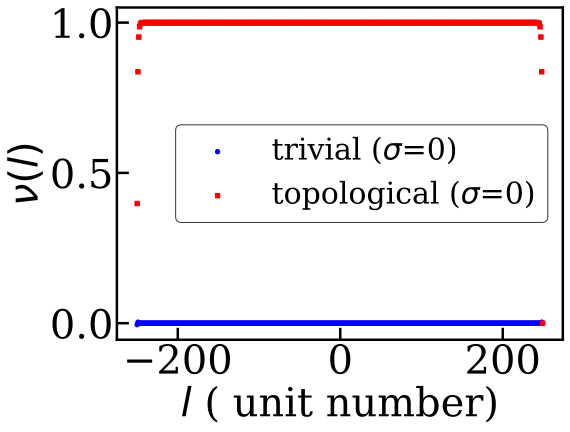

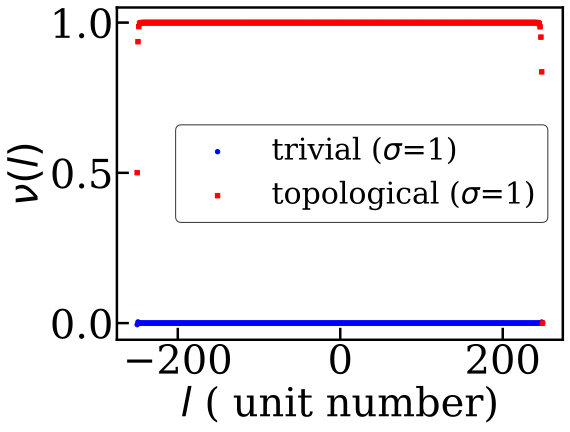

In [33]:
#LOCAL TOPOLOGICAL MARKER

import numpy as np
import matplotlib.pyplot as plt

L = 1000

# Define the two sigma values and the two (v, w) combinations for each sigma.
sigma_values = [0, 1]
# For each sigma, we consider two sets: (v, w) = (1,0.5) and (v, w) = (0.5,1)
param_combos = [(1, 0.5), (0.5, 1)]
# Define marker styles and colors for the two curves
marker_styles = ['o', 's']
colors = ['blue', 'red']

for sigma_val in sigma_values:
    plt.figure(figsize=(8, 6))
    for idx, (v_hop, w_hop) in enumerate(param_combos):
        #--------------------------
        # --- Hamiltonian construction (unchanged) ---
        SHH = np.zeros((L, L), dtype=complex)
        for i in range(L - 1):
            v_i = v_hop * ((i + 1) / (L - 1))**sigma_val
            w_i = w_hop * ((i + 1) / (L - 1))**sigma_val
            if i % 2 == 0:
                SHH[i + 1, i] = v_i
                SHH[i, i + 1] = v_i
            else:
                SHH[i + 1, i] = w_i
                SHH[i, i + 1] = -w_i

        eigenvalues, eigenvectors = np.linalg.eigh(SHH)
    
        #--------------------------
        # --- Local topological marker calculation (unchanged) ---
        num_eigenvectors = len(eigenvalues)
        num_eigenvectors_half = num_eigenvectors // 2
        Um = np.column_stack(eigenvectors[:, :num_eigenvectors_half])
        Up = np.column_stack(eigenvectors[:, num_eigenvectors_half:])
        trans_Um = np.transpose(Um)
        trans_Up = np.transpose(Up)
        Pp = trans_Up @ Up
        Pm = trans_Um @ Um
        Q = Pp - Pm
        GA = np.zeros((L, L))
        GB = np.zeros((L, L))
        for i in range(len(eigenvalues)):
            if i % 2 == 0:
                GA[i, i] = 1
        for i in range(len(eigenvalues)):
            if i % 2 != 0:
                GB[i, i] = 1
        Qab = GA @ Q @ GB
        Qba = GB @ Q @ GA
        
        # Position operator X construction (unchanged)
        X = np.zeros((L, L))
        X[0, 0] = -L / 4
        for i in range(len(eigenvalues)):
            if i % 2 == 0:
                X[i, i] = -L / 4 + i / 2
                if i + 1 < L:
                    X[i + 1, i + 1] = X[i, i]
    
        # Calculate v1 and v2 as in the original code
        v1 = 0.5 * (Qba @ (X @ Qab - Qab @ X))
        v2 = 0.5 * (Qab @ (Qba @ X - X @ Qba))
        # Compute the local topological marker for half the lattice sites
        v_marker = np.zeros(int(L / 2))
        for i in range(int(L / 2) - 1):
            v_marker[i] = (v1[2 * i, 2 * i] + v1[2 * i + 1, 2 * i + 1] +
                           v2[2 * i, 2 * i] + v2[2 * i + 1, 2 * i + 1])
    
        #--------------------------
        # --- Plotting the marker as points ---
        # Determine label based on v_hop and w_hop
        label_type = "trivial" if v_hop > w_hop else "topological"
    
        plt.scatter(l, v_marker, marker=marker_styles[idx],
                    s=20, color=colors[idx], label=f"{label_type} ($\sigma$={sigma_val})")
    
    plt.xlabel(fr"$l$ ( unit number)", fontsize=40)
    plt.ylabel(fr"$\nu (l)$", fontsize=40)
    plt.legend(fontsize=30)
    plt.show()

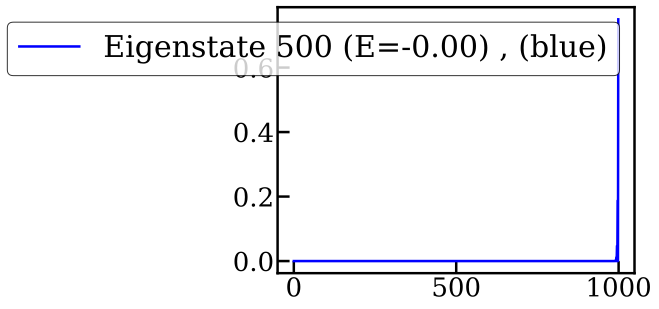

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


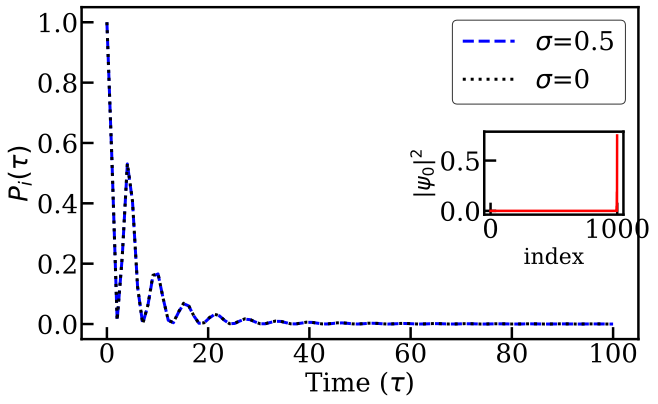

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


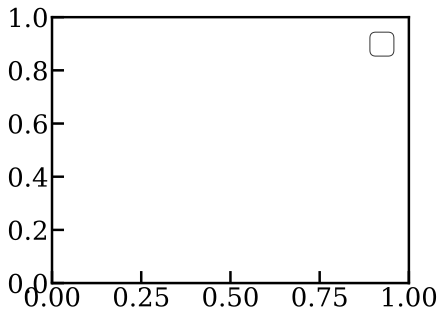

In [20]:
#QUENCHING MEASUREMENT-----------------------------------(WINDING NO: 1 TO 0)

import numpy as np
import matplotlib.pyplot as plt
import qutip as qt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

L=1000
# SSH Model 1st version
def SSH(c, sigma):
  
    if c == 2:
        t = 0.085
        dt = -0.085
        w = t - dt
        v = t + dt
        nu = 0.43
        mu = 0.17
        gamma = 0.37
    elif c == 4:
        # t = 0.135
        # dt = -0.035
        # w = t - dt
        # v = t + dt
        # nu = 0.25
        # mu = 0.42
        # gamma = 0.38

        #-----------------

        t = 0.185
        dt = 0.015
        w = t - dt
        v = t + dt
        nu = 0.43
        mu = 0.17
        gamma = 0.37
        #-----------------
    elif c == 3:
        t = 0.25
        dt = -0.15
        w = t - dt
        v = t + dt
        nu = 0.28
        mu = 0.6
        gamma = 0
    elif c == 1:
        t = 0.75
        dt = -0.25
        w = t - dt
        v = t + dt
        nu = 0
        mu = 0
        gamma = 0
    elif c == 0:
        t = 0.75
        dt = 0.25
        w = t - dt
        v = t + dt
        nu = 0
        mu = 0
        gamma = 0


 #--------------------------------------------
    SHH = np.zeros((L, L), dtype=complex)

    for i in range(L - 1):
        v_i = v * ((i + 1) / (L - 1))**sigma
        w_i = w * ((i + 1) / (L - 1))**sigma
        if i % 2 == 0:
            SHH[i + 1, i] = v_i
            SHH[i, i + 1] = v_i
        else:
            SHH[i + 1, i] = w_i
            SHH[i, i + 1] = w_i

    for i in range(L - 3):
        nu_i = nu * ((i + 1) / (L - 1))**sigma
        if i % 2 != 0:
            SHH[i + 3, i] = nu_i
            SHH[i, i + 3] = nu_i

    for i in range(L - 5):
        mu_i = mu * ((i + 1) / (L - 1))**sigma
        if i % 2 != 0:
            SHH[i + 5, i] = mu_i
            SHH[i, i + 5] = mu_i

    for i in range(L - 7):
        gamma_i = gamma * ((i + 1) / (L - 1))**sigma
        if i % 2 != 0:
            SHH[i + 7, i] = gamma_i
            SHH[i, i + 7] = gamma_i
 
 #probability_density = np.abs(eigenvectors[:, 150])**2 

    return SHH
#-----------------------------------------------------------------------------------------------------------------------------------



s=0.5 #Sigma value for SSH
#s2=0
mid_point= L//2-1
eigenvalues, eigenvectors = np.linalg.eigh(SSH(1,s))

probability_density = np.abs(eigenvectors[:, mid_point])**2 #------------------------------------------------------
plt.figure() 
#plt.title(f'probability density corresponding to 0 energy with L= {L}, sigma={s}')

#plt.plot(np.arange(len(eigenvalues)), probability_density)
#mid=L//2
plt.plot(np.abs(eigenvectors[:, mid_point])**2, label=f'Eigenstate {mid_point+1} (E={eigenvalues[mid_point]:.2f}) , (blue)', color='blue')
#t.plot(np.abs(eigenvectors[:, mid-1])**2, label=f'Eigenstate {i} (E={eigenvalues[i-1]:.2f}), (yellow)', color='yellow')
#plt.yscale('log')
plt.legend()
plt.show()

# SSH Model 2nd version------------------------------------------------------------------
#---------------------------------------------------------------------------------------
def SSH2(c, sigma):
    if c == 2:
        # t = 0.24
        # dt = 0.04
        # w = t - dt
        # v = t + dt
        # nu = 0.36
        # mu = 0.36
        # gamma = 0

        #-----------------
        t = 0.085
        dt = -0.085
        w = t - dt
        v = t + dt
        nu = 0.43
        mu = 0.17
        gamma = 0.37
        #------------------
    elif c == 4:
        # t = 0.185
        # dt = 0.015
        # w = t - dt
        # v = t + dt
        # nu = 0.43
        # mu = 0.17
        # gamma = 0.37
        #---------------------
        t = 0.085
        dt = -0.085
        w = t - dt
        v = t + dt
        nu = 0.43
        mu = 0.6
        gamma = 0.37
        #---------------------
    elif c == 3:
        t = 0.25
        dt = -0.15
        w = t - dt
        v = t + dt
        nu = 0.28
        mu = 0.6
        gamma = 0
    elif c == 1:
        t = 0.75
        dt = -0.25
        w = t - dt
        v = t + dt
        nu = 0
        mu = 0
        gamma = 0
    elif c==0:
        t = 0.75
        dt = 0.25
        w = t - dt
        v = t + dt
        nu = 0
        mu = 0
        gamma = 0
    SHH2 = np.zeros((L, L), dtype=complex)

    for i in range(L - 1):
        v_i = v * ((i + 1) / (L - 1))**sigma
        w_i = w * ((i + 1) / (L - 1))**sigma
        if i % 2 == 0:
            SHH2[i + 1, i] = v_i
            SHH2[i, i + 1] = v_i
        else:
            SHH2[i + 1, i] = w_i
            SHH2[i, i + 1] = w_i

    for i in range(L - 3):
        nu_i = nu * ((i + 1) / (L - 1))**sigma
        if i % 2 != 0:
            SHH2[i + 3, i] = nu_i
            SHH2[i, i + 3] = nu_i

    for i in range(L - 5):
        mu_i = mu * ((i + 1) / (L - 1))**sigma
        if i % 2 != 0:
            SHH2[i + 5, i] = mu_i
            SHH2[i, i + 5] = mu_i

    for i in range(L - 7):
        gamma_i = gamma * ((i + 1) / (L - 1))**sigma
        if i % 2 != 0:
            SHH2[i + 7, i] = gamma_i
            SHH2[i, i + 7] = gamma_i

    return SHH2

eigval,eigvec= np.linalg.eigh(SSH2(0,s))
#------------------------------------------------------------------------------------------------
#Quenching
# C_i= 1 
# C_f= 4
# sig= 1 #Sigma
# pre = qt.Qobj(SSH(C_i, sig))
# post = qt.Qobj(SSH2(C_f, sig))  # Change from SSH2(0,0) to SSH2(1,0) to match valid c value
# zeroEnIndex = 500
# En, KetEn = pre.eigenstates()
# InitialState = KetEn[zeroEnIndex].data.to_array()[:, 0]
# time = np.linspace(0, 500, 1000)
# prob = np.zeros(1000)
# result = qt.sesolve(H=post, psi0=KetEn[zeroEnIndex], tlist=time)

# for iter in range(1000):
#     state = result.states[iter].data.to_array()[:, 0]
#     prob[iter] = (np.abs(np.conj(state) @ InitialState))**2
# plt.plot(time, prob)
# plt.show()
# print(prob[403])


#-------------------------------------------------------------------------------------

#plotting

import numpy as np
import matplotlib.pyplot as plt
import qutip as qt

# Function to solve and return the probability over time
def run_simulation(C_i, C_f, sig):
    pre = qt.Qobj(SSH(C_i, sig))
    post = qt.Qobj(SSH2(C_f, sig))
    zeroEnIndex = mid_point
    #En, KetEn = pre.eigenstates()
    InitialState = eigenvectors[:,zeroEnIndex]
    #InitialState =  KetEn[zeroEnIndex].data.to_array()[:, 0]
    time_scale=100
    time = np.linspace(0, time_scale,time_scale)
    prob = np.zeros(time_scale)
    psi_zero = qt.Qobj(InitialState)
    #result = qt.sesolve(H=post, psi0=KetEn[zeroEnIndex], tlist=time)
    result = qt.sesolve(H=post, psi0=psi_zero, tlist=time)
    for iter in range(time_scale):
        state = result.states[iter].data.to_array()[:, 0]
        prob[iter] = (np.abs(np.conj(state) @ InitialState))**2

    return time, prob

# Iterate over all combinations of C_i and C_f
C_i_values = [ 1]
C_f_values = [ 0]

for C_i in C_i_values:
    for C_f in C_f_values:
        # Skip combinations where C_i == C_f
        # if C_i == C_f:
        #     continue
        
        plt.figure(figsize=(10, 6))
        
        # Simulation for sigma = non zero
        
        time, prob_sig1 = run_simulation(C_i, C_f, sig=s)
        plt.plot(time, prob_sig1, label=f'$\sigma$='+str(s) ,linestyle='--' , color='blue', linewidth=3)
        
        # Simulation for sigma = 0
        time, prob_sig0 = run_simulation(C_i, C_f, sig=0)
        plt.plot(time, prob_sig0, label=f'$\sigma$=0', linestyle=':', color='black', linewidth=3)
        #plt.legend(bbox_to_anchor=(1, 1), loc='upper right')
        #plt.legend(loc='upper right')

        # Plot formatting
        #plt.title(f'Probability Evolution for $C_i$={C_i}, $C_f$={C_f}, L= {L}', fontsize=18)
        plt.xlabel(r'Time ($\tau$)', fontsize=26)
        #plt.xscale('log')
        #plt.ylim(0, 1.1)
        plt.legend(loc='upper right',fontsize=26)
        plt.ylabel(r'$P_i(\tau)$', fontsize=26)

        #--------------------------------------------------
        #plot inside plot
        ax_inset = inset_axes(plt.gca(), width="25%", height="25%" , loc="center right")  # Top-right corner
        ax_inset.patch.set_alpha(0.75)  # Make the inset background fully transparent
        #ax_inset = inset_axes( plt.gca(), width="30%", height="30%", loc="upper right", bbox_to_anchor=(0.95, 0.85),  bbox_transform=plt.gca().transAxes )
        ax_inset.plot(np.abs(eigenvectors[:, mid_point])**2, color='red')
        #ax_inset.set_title("Prob. denisty for initial state", fontsize=12)
        ax_inset.set_xlabel("index", fontsize=22)
        ax_inset.set_ylabel(r'$|\psi_{0}|^2 $',fontsize= 22)

        plt.legend(fontsize=1)
        plt.show()

        #---------------------------------------------------

        plt.legend()
        #plt.grid(True)
        plt.show()


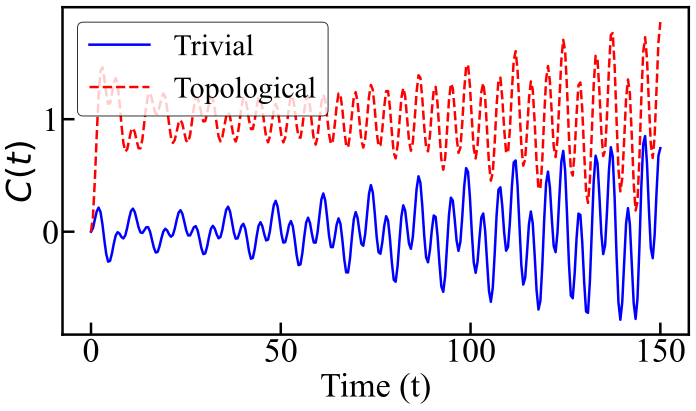

Case 1: (v, w) = (1, 0.5) [Trivial]  --> Average MCD: 0.0045, Fluctuation: 0.0815
Case 2: (v, w) = (0.5, 1) [Topological]  --> Average MCD: 1.0043, Fluctuation: 0.0854


In [ ]:
#MCD MARKER

import numpy as np
from scipy.linalg import expm
import matplotlib.pyplot as plt

# Set the font style and sizes to be suitable for Physical Review B
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 16

def compute_MCD(L, v, w, sigma):
    """
    Compute the Mean Chiral Displacement (MCD) curve for given v, w, sigma and system size L.
    """
    # Build the Hamiltonian SHH
    SHH = np.zeros((L, L), dtype=complex)
    for i in range(L-1):
        v_i = v * ((i + 1) / (L - 1))**sigma
        w_i = w * ((i + 1) / (L - 1))**sigma
        if i % 2 == 0:
            SHH[i+1, i] = v_i
            SHH[i, i+1] = v_i
        else:
            SHH[i+1, i] = w_i
            SHH[i, i+1] = w_i

    # Construct matrices GA and GB using eigenvalue indices
    eigenvalues, eigenvectors = np.linalg.eigh(SHH)
    GA = np.zeros((L, L))
    GB = np.zeros((L, L))
    for i in range(len(eigenvalues)):
        if i % 2 == 0:
            GA[i, i] = 1
        else:
            GB[i, i] = 1

    # Construct the position matrix X
    X = np.zeros((L, L))
    X[0, 0] = -L/4
    # Here we set X for even indices and copy to the subsequent odd index
    for i in range(0, L-1, 2):
        X[i, i] = -L/4 + i/2
        if i + 1 < L:
            X[i+1, i+1] = -L/4 + i/2

    # The chiral operator is G = GA - GB and mid_matrix = G @ X
    G = GA - GB
    mid_matrix = G @ X

    # Define the initial state as a 1D array with a 1 at the center
    def initial_matrix(N):
        arr = np.zeros(N)
        #arr[0] = 1
        arr[L//2]=1
        return arr

    psi = initial_matrix(L)

    # Define the time evolution function: |psi(t)> = exp(-iHt)|psi>
    def time_evolution(H, psi, t):
        U = expm(-1j * H * t)
        return U.dot(psi)

    # Define the time range for simulation
    time_range = np.linspace(0, 150, 300)
    f_values = []
    for t in time_range:
        psi_t = time_evolution(SHH, psi, t)
        # Compute f(t) = 2 * <psi(t)| mid_matrix |psi(t)>
        f_t = 2 * np.real(np.dot(np.conjugate(psi_t), mid_matrix.dot(psi_t)))
        f_values.append(f_t)

    average = np.mean(f_values)
    fluctuation = np.var(f_values)
    return time_range, np.array(f_values), average, fluctuation

# Simulation parameters
L = 1000
sigma = 1

# Case 1: (v, w) = (1, 0.5) --> trivial (v > w)
v1, w1 = 1, 0.5
time_range1, f_values1, avg1, var1 = compute_MCD(L, v1, w1, sigma)

# Case 2: (v, w) = (0.5, 1) --> topological (v < w)
v2, w2 = 0.5, 1
time_range2, f_values2, avg2, var2 = compute_MCD(L, v2, w2, sigma)

# Plot both MCD curves on the same plot
plt.figure(figsize=(10, 6))
plt.plot(time_range1, f_values1, label=f"Trivial", 
         linestyle='-', color='blue')
plt.plot(time_range2, f_values2, label=f"Topological", 
         linestyle='--', color='red')
plt.xlabel(r'Time (\tau)', fontsize=34)
plt.ylabel(r'$C(\tau)$', fontsize=34)
#plt.title(f'Mean Chiral Displacement vs Time for L={L}, $\sigma$={sigma}', fontsize=18)
plt.legend(fontsize=30)
plt.tight_layout()
plt.show()

# Print the average and fluctuation for both cases
print("Case 1: (v, w) = (1, 0.5) [Trivial]  --> Average MCD: {:.4f}, Fluctuation: {:.4f}".format(avg1, var1))
print("Case 2: (v, w) = (0.5, 1) [Topological]  --> Average MCD: {:.4f}, Fluctuation: {:.4f}".format(avg2, var2))


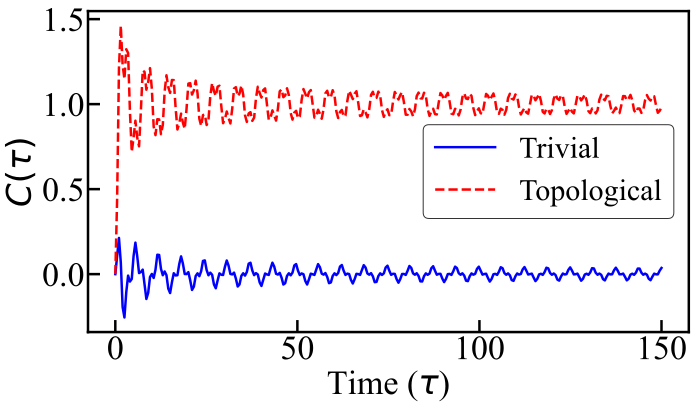

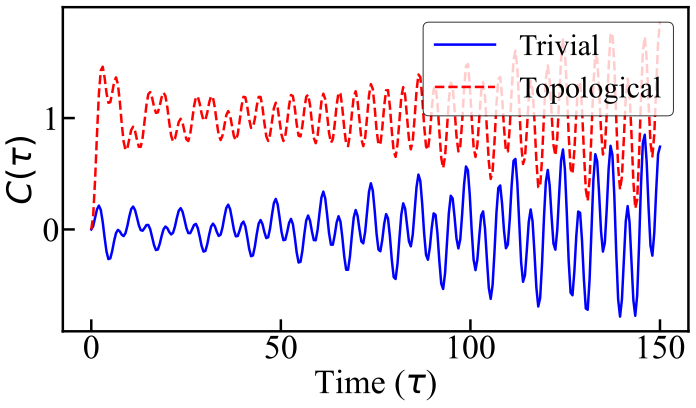


All results cached in `results`:

{0: {'Topological': {'C(t)': array([0.        , 0.4436887 , 1.21270154, 1.46140867, 1.23065082,
       1.14709519, 1.32282348, 1.30082237, 0.95785814, 0.71863145,
       0.80228382, 0.90243107, 0.80241847, 0.75191295, 0.96283872,
       1.19827268, 1.18944029, 1.08490121, 1.13091139, 1.21176596,
       1.08952964, 0.86730634, 0.8176703 , 0.91138657, 0.91017692,
       0.82324393, 0.87675088, 1.07367049, 1.16963165, 1.09985408,
       1.06602741, 1.14198896, 1.1411213 , 0.97995013, 0.85092609,
       0.8871583 , 0.9441477 , 0.89058763, 0.85476148, 0.97329914,
       1.12069665, 1.12318991, 1.05637766, 1.08154936, 1.13808883,
       1.06458707, 0.91391352, 0.87234677, 0.93552123, 0.93945191,
       0.87726208, 0.90798955, 1.04786594, 1.12419385, 1.07671955,
       1.04769797, 1.10265306, 1.10824221, 0.9907882 , 0.88793949,
       0.91042833, 0.95679741, 0.91863281, 0.88637532, 0.97337539,
       1.09177058, 1.09975823, 1.04615406, 1.0620925 , 1.10956176

In [8]:
#MCD with all the data printed
# MCD MARKER WITH CACHING AND MULTI-σ PLOTTING

import numpy as np
from scipy.linalg import expm
import matplotlib.pyplot as plt
import pprint

# Set the font style and sizes to be suitable for Physical Review B
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size']   = 16

def compute_MCD(L, v, w, sigma):
    """
    Compute the Mean Chiral Displacement (MCD) curve for given v, w, sigma and system size L.
    Returns: time_range, f_values array, average, variance
    """
    # Build the SSH Hamiltonian SHH
    SHH = np.zeros((L, L), dtype=complex)
    for i in range(L - 1):
        v_i = v * ((i + 1) / (L - 1))**sigma
        w_i = w * ((i + 1) / (L - 1))**sigma
        if i % 2 == 0:
            SHH[i + 1, i] = v_i
            SHH[i, i + 1] = v_i
        else:
            SHH[i + 1, i] = w_i
            SHH[i, i + 1] = w_i

    # Diagonalize to get eigenvectors for chiral sublattice ops
    eigenvalues, eigenvectors = np.linalg.eigh(SHH)
    GA = np.zeros((L, L))
    GB = np.zeros((L, L))
    for idx in range(L):
        if idx % 2 == 0:
            GA[idx, idx] = 1
        else:
            GB[idx, idx] = 1

    # Position operator X
    X = np.zeros((L, L))
    X[0, 0] = -L / 4
    for i in range(0, L - 1, 2):
        X[i, i] = -L / 4 + i / 2
        X[i + 1, i + 1] = -L / 4 + i / 2

    # Chiral operator and mid_matrix
    G = GA - GB
    mid_matrix = G @ X

    # Initial state localized at center
    psi0 = np.zeros(L, dtype=complex)
    psi0[L // 2] = 1

    # Time evolution
    def evolve(psi, t):
        U = expm(-1j * SHH * t)
        return U.dot(psi)

    time_range = np.linspace(0, 150, 300)
    f_values = []
    for t in time_range:
        psi_t = evolve(psi0, t)
        f_t = 2 * np.real(np.vdot(psi_t, mid_matrix.dot(psi_t)))
        f_values.append(f_t)
    f_values = np.array(f_values)

    average = np.mean(f_values)
    variance = np.var(f_values)
    return time_range, f_values, average, variance

# Simulation parameters
L = 1000

# Cache results for σ = 0 and 1, for both trivial and topological cases
results = {}
for sigma in (0, 1):
    results[sigma] = {}
    for label, (v, w) in (("Trivial", (1, 0.5)), ("Topological", (0.5, 1))):
        t_range, f_vals, avg, var = compute_MCD(L, v, w, sigma)
        results[sigma][label] = {
            "time":    t_range,
            "C(t)":    f_vals,
            "avg":     avg,
            "var":     var
        }

# Plot one figure per sigma
for sigma in (0, 1):
    plt.figure(figsize=(10, 6))
    for label, data in results[sigma].items():
        style = {'Trivial': ('-', 'blue'), 'Topological': ('--', 'red')}[label]
        plt.plot(data["time"], data["C(t)"],
                 linestyle = style[0],
                 color     = style[1],
                 label     = label)
    plt.xlabel(r'Time ($\tau$)', fontsize=34)
    plt.ylabel(r'$C(\tau)$', fontsize=34)
    #plt.title(f'$\sigma = {sigma}$', fontsize=28)
    plt.legend(fontsize=30)
    plt.tight_layout()
    plt.show()

# Print the cached data for future reuse
print("\nAll results cached in `results`:\n")
pprint.pprint(results, width=120)


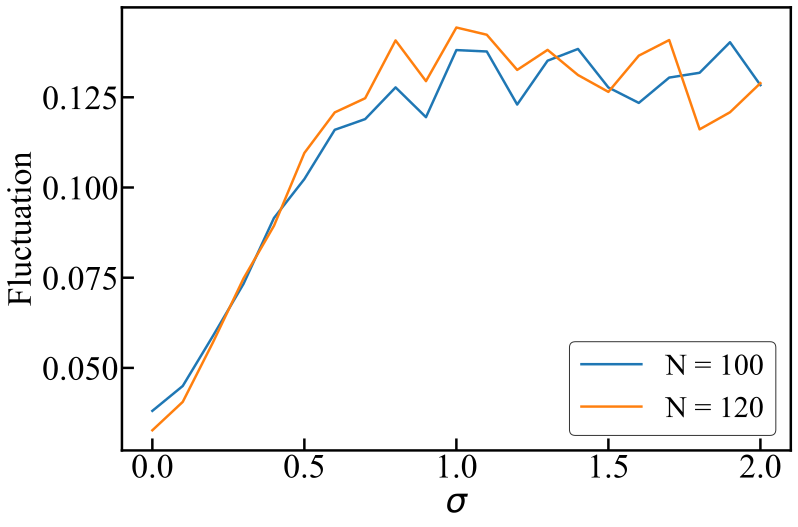

In [62]:
#fluctuation vs sigma
import numpy as np
from scipy.linalg import expm
import matplotlib.pyplot as plt

# Function to compute time evolution
def time_evolution(H, psi, t):
    U = expm(-1j * H * t)  # Unitary evolution operator
    psi_t = np.dot(U, psi)
    return psi_t

# Function to calculate initial state
def initial_matrix(N):
    array = np.zeros(N)  # Create an N-sized array filled with zeros
    middle_index = N // 2
    array[middle_index] = 1  # Set the middle element to 1
    return array

# Parameters
L_values = [100,120]  # Different values of L
sigma_values = np.arange(0, 2.1, 0.1)  # Sigma range from 0 to 2 with interval 0.25

# Prepare the plot
plt.figure(figsize=(12, 8))

# Loop over different L values
for L in L_values:
    t = 0.75  # hopping amplitude
    dt = -0.25
    fluctuations = []  # List to store fluctuation values for each sigma
    
    for sigma in sigma_values:
        # Initialize Hamiltonian (SHH) based on the current sigma value
        w = t - dt
        v = t + dt
        SHH = np.zeros((L, L), dtype=complex)
        
        for i in range(L - 1):
            v_i = v * ((i + 1) / (L - 1)) ** sigma
            w_i = w * ((i + 1) / (L - 1)) ** sigma
            if i % 2 == 0:
                SHH[i + 1, i] = v_i
                SHH[i, i + 1] = v_i
            if i % 2 != 0:
                SHH[i + 1, i] = w_i
                SHH[i, i + 1] = w_i
        
        # Compute eigenvalues and eigenvectors of SHH
        eigenvalues, eigenvectors = np.linalg.eigh(SHH)
        
        # Initialize matrices GA, GB for time evolution
        GA = np.zeros((L, L))
        GB = np.zeros((L, L))
        for i in range(len(eigenvalues)):
            if i % 2 == 0:
                GA[i, i] = 1
        for i in range(len(eigenvalues)):
            if i % 2 != 0:
                GB[i, i] = 1

        G = GA - GB
        X = np.zeros((L, L))
        X[0, 0] = -L / 4
        for i in range(len(eigenvalues)):
            if i % 2 == 0:
                X[i, i] = -L / 4 + i / 2
                X[i + 1, i + 1] = X[i, i]

        mid_matrix = G @ X

        # Compute initial state |psi>
        psi = initial_matrix(L)

        # Calculate f(t) = 2 * <psi(t)|Gamma X|psi(t)> for each time step
        time_range = np.linspace(0, L / 3, L)  # Time values
        f_values = []
        for t_val in time_range:
            psi_t = time_evolution(SHH, psi, t_val)  # Evolve |psi(t)>
            bra_psi_t = np.conjugate(psi_t.T)  # <psi(t)|
            f_t = 2 * (bra_psi_t @ mid_matrix @ psi_t)  # 2 * <psi(t)|Gamma X|psi(t)>
            f_values.append(f_t.real)  # Take the real part of f(t)
        
        # Calculate fluctuation (variance of f_values)
        fluctuation = np.var(f_values)
        fluctuations.append(fluctuation)
    
    # Plot fluctuation vs sigma for the current L
    plt.plot(sigma_values, fluctuations, label=f'N = {L}')

# Finalize the plot
plt.xlabel(r'$\sigma$', fontsize=34)
plt.ylabel('Fluctuation', fontsize=34)
#plt.title('Fluctuation vs Sigma for Different N Values', fontsize=20)
#plt.grid(True)
plt.legend(fontsize=30)
plt.show()


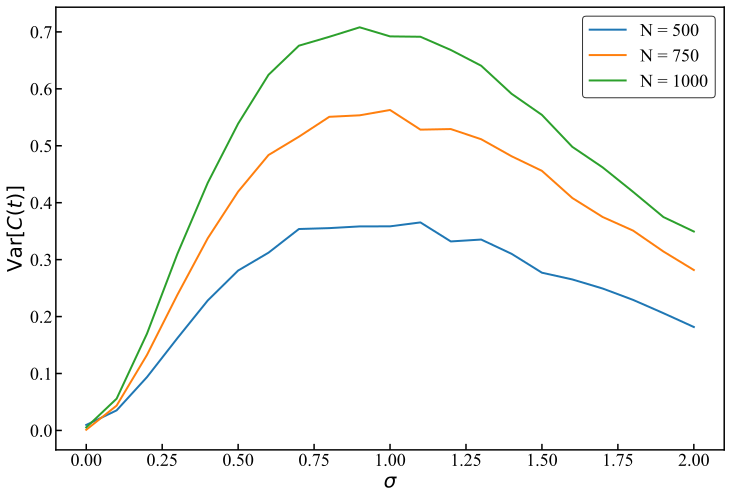

In [ ]:
%config InlineBackend.figure_format = 'svg'

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import Patch


import numpy as np
from scipy.linalg import expm
import matplotlib.pyplot as plt
import matplotlib as mpl

# Update matplotlib settings for publication-quality figures without LaTeX (to avoid errors)
mpl.rcParams.update({
    'text.usetex': False,         # Disable LaTeX to avoid needing a full installation
    'font.family': 'serif',
    'font.size': 14,
    'axes.linewidth': 1.5,
    'xtick.direction': 'in',
    'ytick.direction': 'in',
    'xtick.major.size': 6,
    'ytick.major.size': 6,
    'xtick.major.width': 1.5,
    'ytick.major.width': 1.5,
    'lines.linewidth': 2,
    'lines.markersize': 8,
    'legend.frameon': True,
    'legend.edgecolor': 'black',
    'legend.fontsize': 12,
})



# Set plot style to Physical Review B standard
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif'] = ['Times New Roman']
mpl.rcParams['font.size'] = 20
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['lines.markersize'] = 8
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['xtick.labelsize'] = 18
mpl.rcParams['ytick.labelsize'] = 18
mpl.rcParams['figure.figsize'] = (12, 8)

# Function to compute time evolution
def time_evolution(H, psi, t):
    U = expm(-1j * H * t)  # Unitary evolution operator
    psi_t = np.dot(U, psi)
    return psi_t

# Function to calculate initial state
def initial_matrix(N):
    array = np.zeros(N)  # Create an N-sized array filled with zeros
    middle_index = N // 2
    array[middle_index] = 1  # Set the middle element to 1
    return array

# Parameters
L_values = [ 500,750,1000]  # Different values of L
sigma_values = np.arange(0, 2.1, 0.1)  # Sigma range from 0 to 2 with interval 0.2

# Prepare the plot
plt.figure()

# Loop over different L values
for L in L_values:
    t = 0.75  # hopping amplitude
    dt = -0.25
    fluctuations = []  # List to store fluctuation values for each sigma
    
    for sigma in sigma_values:
        # Initialize Hamiltonian (SHH) based on the current sigma value
        w = t - dt
        v = t + dt
        SHH = np.zeros((L, L), dtype=complex)
        
        for i in range(L - 1):
            v_i = v * ((i + 1) / (L - 1)) ** sigma
            w_i = w * ((i + 1) / (L - 1)) ** sigma
            if i % 2 == 0:
                SHH[i + 1, i] = v_i
                SHH[i, i + 1] = v_i
            if i % 2 != 0:
                SHH[i + 1, i] = w_i
                SHH[i, i + 1] = w_i
        
        # Compute eigenvalues and eigenvectors of SHH
        eigenvalues, eigenvectors = np.linalg.eigh(SHH)
        
        # Initialize matrices GA, GB for time evolution
        GA = np.zeros((L, L))
        GB = np.zeros((L, L))
        for i in range(len(eigenvalues)):
            if i % 2 == 0:
                GA[i, i] = 1
        for i in range(len(eigenvalues)):
            if i % 2 != 0:
                GB[i, i] = 1

        G = GA - GB
        X = np.zeros((L, L))
        X[0, 0] = -L / 4
        for i in range(len(eigenvalues)):
            if i % 2 == 0:
                X[i, i] = -L / 4 + i / 2
                X[i + 1, i + 1] = X[i, i]

        mid_matrix = G @ X

        # Compute initial state |psi>
        psi = initial_matrix(L)

        # Calculate f(t) = 2 * <psi(t)|Gamma X|psi(t)> for each time step
        time_range = np.linspace(0, L / 4, L/2)  # Time values
        f_values = []
        for t_val in time_range:
            psi_t = time_evolution(SHH, psi, t_val)  # Evolve |psi(t)>
            bra_psi_t = np.conjugate(psi_t.T)  # <psi(t)|
            f_t = 2 * (bra_psi_t @ mid_matrix @ psi_t)  # 2 * <psi(t)|Gamma X|psi(t)>
            f_values.append(f_t.real)  # Take the real part of f(t)
        
        # Calculate fluctuation (variance of f_values)
        fluctuation = np.var(f_values)
        fluctuations.append(fluctuation)
    
    # Plot fluctuation vs sigma for the current L with marker style 'o'
    plt.plot(sigma_values, fluctuations, label=f'N = {L}')

# Finalize the plot
plt.xlabel(r'$\sigma$', fontsize=34)
plt.ylabel(r'$\mathrm{Var}\left[C(t)\right]$', fontsize=34)
#plt.ylabel('Fluctuation', fontsize=20)
plt.legend(fontsize=30)
plt.show()


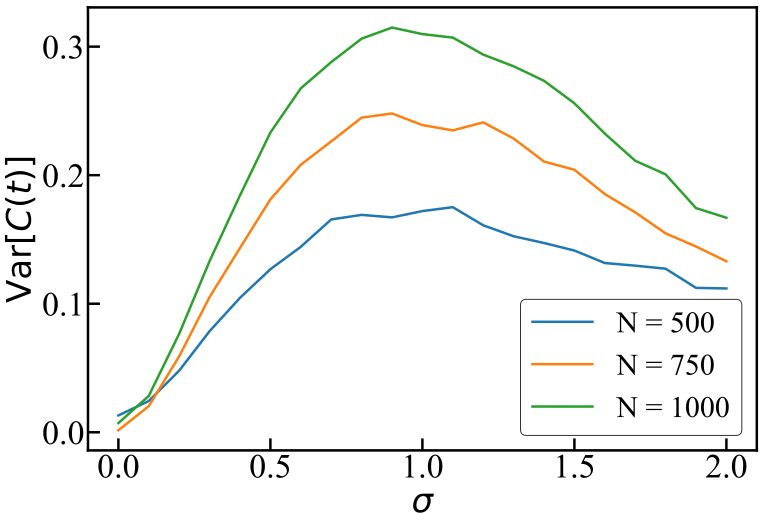

Variance data for each L:
N = 500:
[0.013098802277465314, 0.02432679520890212, 0.04792935784609722, 0.07864537616334025, 0.10458865697370921, 0.1268374332082447, 0.1442724164981608, 0.165557644363737, 0.1691131331966023, 0.16717235627931343, 0.17206031343626743, 0.17511783786696458, 0.1610102726415274, 0.15246226575311198, 0.1472385007369305, 0.14134932066912653, 0.13164930518547713, 0.12961595388099742, 0.1272419242113636, 0.11230843734474286, 0.11188210074730548]
N = 750:
[0.0015464391162312392, 0.02032311419301687, 0.059075912043846615, 0.1052032275404426, 0.1433856230991028, 0.18115891964945496, 0.20813276182063134, 0.2262786698363107, 0.2447348577961118, 0.24802489546070633, 0.23895992255951823, 0.23484622824294304, 0.24106472242855687, 0.22850205896234707, 0.21059087406873186, 0.20417896483516962, 0.1852939237458895, 0.17107717098979916, 0.1547220799394734, 0.14449886507659318, 0.13301407404874838]
N = 1000:
[0.007150430978281637, 0.028302456309043638, 0.07663772790389865, 0.1331

In [ ]:
#FLUCTUATION VS SIGMA TIME TILL N/4

%config InlineBackend.figure_format = 'svg'

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

import numpy as np
from scipy.linalg import expm
import matplotlib.pyplot as plt
import matplotlib as mpl

# # Update matplotlib settings for publication-quality figures without LaTeX (to avoid errors)
# mpl.rcParams.update({
#     'text.usetex': False,         # Disable LaTeX to avoid needing a full installation
#     'font.family': 'serif',
#     'font.size': 14,
#     'axes.linewidth': 1.5,
#     'xtick.direction': 'in',
#     'ytick.direction': 'in',
#     'xtick.major.size': 6,
#     'ytick.major.size': 6,
#     'xtick.major.width': 1.5,
#     'ytick.major.width': 1.5,
#     'lines.linewidth': 2,
#     'lines.markersize': 8,
#     'legend.frameon': True,
#     'legend.edgecolor': 'black',
#     'legend.fontsize': 12,
# })

# # Set plot style to Physical Review B standard
# mpl.rcParams['font.family'] = 'serif'
# mpl.rcParams['font.serif'] = ['Times New Roman']
# mpl.rcParams['font.size'] = 20
# mpl.rcParams['lines.linewidth'] = 2
# mpl.rcParams['lines.markersize'] = 8
# mpl.rcParams['axes.linewidth'] = 1.5
# mpl.rcParams['xtick.labelsize'] = 18
# mpl.rcParams['ytick.labelsize'] = 18
# mpl.rcParams['figure.figsize'] = (12, 8)

# Function to compute time evolution
def time_evolution(H, psi, t):
    U = expm(-1j * H * t)  # Unitary evolution operator
    psi_t = np.dot(U, psi)
    return psi_t

# Function to calculate initial state
def initial_matrix(N):
    array = np.zeros(N)  # Create an N-sized array filled with zeros
    middle_index = N // 2
    array[middle_index] = 1  # Set the middle element to 1
    return array

# Parameters
L_values = [500, 750, 1000]  # Different values of L
sigma_values = np.arange(0, 2.1, 0.1)  # Sigma range from 0 to 2 with interval 0.1

# Prepare the plot
plt.figure()

# Dictionary to store the variance (fluctuation) data for each L
variance_data = {}

# Loop over different L values
for L in L_values:
    t = 0.75  # hopping amplitude
    dt = -0.25
    fluctuations = []  # List to store fluctuation values for each sigma
    
    for sigma in sigma_values:
        # Initialize Hamiltonian (SHH) based on the current sigma value
        w = t - dt
        v = t + dt
        SHH = np.zeros((L, L), dtype=complex)
        
        for i in range(L - 1):
            v_i = v * ((i + 1) / (L - 1)) ** sigma
            w_i = w * ((i + 1) / (L - 1)) ** sigma
            if i % 2 == 0:
                SHH[i + 1, i] = v_i
                SHH[i, i + 1] = v_i
            if i % 2 != 0:
                SHH[i + 1, i] = w_i
                SHH[i, i + 1] = w_i
        
        # Compute eigenvalues and eigenvectors of SHH
        eigenvalues, eigenvectors = np.linalg.eigh(SHH)
        
        # Initialize matrices GA, GB for time evolution
        GA = np.zeros((L, L))
        GB = np.zeros((L, L))
        for i in range(len(eigenvalues)):
            if i % 2 == 0:
                GA[i, i] = 1
        for i in range(len(eigenvalues)):
            if i % 2 != 0:
                GB[i, i] = 1

        G = GA - GB
        X = np.zeros((L, L))
        X[0, 0] = -L / 4
        for i in range(len(eigenvalues)):
            if i % 2 == 0:
                X[i, i] = -L / 4 + i / 2
                X[i + 1, i + 1] = X[i, i]

        mid_matrix = G @ X

        # Compute initial state |psi>
        psi = initial_matrix(L)

        # Calculate f(t) = 2 * <psi(t)|Gamma X|psi(t)> for each time step
        time_range = np.linspace(0, L//4, L//2 )  # Time values
        f_values = []
        for t_val in time_range:
            psi_t = time_evolution(SHH, psi, t_val)  # Evolve |psi(t)>
            bra_psi_t = np.conjugate(psi_t.T)  # <psi(t)|
            f_t = 2 * (bra_psi_t @ mid_matrix @ psi_t)  # 2 * <psi(t)|Gamma X|psi(t)>
            f_values.append(f_t.real)  # Take the real part of f(t)
        
        # Calculate fluctuation (variance of f_values)
        fluctuation = np.var(f_values)
        fluctuations.append(fluctuation)
    
    # Save the variance data for the current L in the dictionary
    variance_data[L] = fluctuations
    
    # Plot fluctuation vs sigma for the current L with marker style 'o'
    plt.plot(sigma_values, fluctuations, label=f'N = {L}')

# Finalize the plot
plt.xlabel(r'$\sigma$', fontsize=34)
plt.ylabel(r'$\mathrm{Var}\left[C(t)\right]$', fontsize=34)
plt.legend(fontsize=30)
plt.show()

# Print the variance data for all sigma values for each L
print("Variance data for each L:")
for L, fluctuations in variance_data.items():
    print(f"N = {L}:")
    print(fluctuations)
